In [1]:
 #Load libraries
import numpy
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_theme(style="ticks",color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,normalize,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
# view dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# view dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# shape
print("shape of train dataset",train.shape)
print("shape of test dataset",test.shape)

shape of train dataset (1460, 81)
shape of test dataset (1459, 80)


In [6]:
# types
set_option('display.max_rows', 500)
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# descriptions, change precision to 3 places
set_option('precision', 3)
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [8]:
# descriptions, change precision to 3 places
set_option('precision', 3)
train.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
# summarize the number of unique values in each column
print(train.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [10]:
# locate rows of duplicate data
train.duplicated().any()

False

In [11]:
# save Id
train_Id = train['Id']
test_Id = test['Id']

In [12]:
ntrain=train.shape[0]
ntest=test.shape[0]
print("shape of ntrain :",ntrain)
print("shape of ntest  :",ntest)

y_train=train["SalePrice"].astype("Float64")
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(columns=("SalePrice"),axis=1,inplace=True) 
print("Total shape of data before removal of id : ",all_data.shape)

#removal of ID from column
all_data.drop(columns="Id",axis=1,inplace=True)

print("Total shape of data after removal of id : ",all_data.shape)

shape of ntrain : 1460
shape of ntest  : 1459
Total shape of data before removal of id :  (2919, 80)
Total shape of data after removal of id :  (2919, 79)


## Features Engineering

In [13]:
#missing values of test dataset
total = all_data.isnull().sum().sort_values(ascending=False)
percent=(all_data.isnull().sum()*100/len(all_data)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,2909,99.657
MiscFeature,2814,96.403
Alley,2721,93.217
Fence,2348,80.439
FireplaceQu,1420,48.647
LotFrontage,486,16.650
GarageCond,159,5.447
GarageQual,159,5.447
GarageYrBlt,159,5.447
GarageFinish,159,5.447


In [14]:
#select numeric variable
all_data.select_dtypes(exclude="object").isnull().sum()[all_data.select_dtypes(exclude="object").isnull().sum()!=0.0]


LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [15]:
#inputing numeric values with median
all_data["LotFrontage"]=all_data["LotFrontage"].fillna(all_data["LotFrontage"].median())
all_data["MasVnrArea"]=all_data["MasVnrArea"].fillna(all_data["MasVnrArea"].median())

all_data["BsmtFinSF1"]=all_data["BsmtFinSF1"].fillna(all_data["BsmtFinSF1"].median())
all_data["BsmtFinSF2"]=all_data["BsmtFinSF2"].fillna(all_data["BsmtFinSF2"].median())
all_data["BsmtUnfSF"]=all_data["BsmtUnfSF"].fillna(all_data["BsmtUnfSF"].median())
all_data["TotalBsmtSF"]=all_data["TotalBsmtSF"].fillna(all_data["TotalBsmtSF"].median())

all_data["BsmtFullBath"]=all_data["BsmtFullBath"].fillna(all_data["BsmtFullBath"].median())
all_data["BsmtHalfBath"]=all_data["BsmtHalfBath"].fillna(all_data["BsmtHalfBath"].median())

all_data["GarageYrBlt"]=all_data["GarageYrBlt"].fillna(all_data["GarageYrBlt"].median())

all_data["GarageCars"]=all_data["GarageCars"].fillna(all_data["GarageCars"].median())
all_data["GarageArea"]=all_data["GarageArea"].fillna(all_data["GarageArea"].median())

In [16]:
#select categories variable
all_data.select_dtypes(include="object").isnull().sum()[all_data.select_dtypes(include="object").isnull().sum()!=0.0]


MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [17]:
#impute the missing values 
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["BsmtQual"]=all_data["BsmtQual"].fillna("None")
all_data["BsmtCond"]=all_data["BsmtCond"].fillna("None")
all_data["BsmtExposure"]=all_data["BsmtExposure"].fillna("None")
all_data["BsmtFinType1"]=all_data["BsmtFinType1"].fillna("None")
all_data["BsmtFinType2"]=all_data["BsmtFinType2"].fillna("None")
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("FireplaceQu")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("FireplaceQu")

#impute the missing values with "No Garage"
all_data["GarageType"]=all_data["GarageType"].fillna("No Garage")
all_data["GarageFinish"]=all_data["GarageFinish"].fillna("No Garage")
all_data["GarageQual"]=all_data["GarageQual"].fillna("No Garage")
all_data["GarageCond"]=all_data["GarageCond"].fillna("No Garage")

#impute the missing values with "No Pool"
all_data["PoolQC"]=all_data["PoolQC"].fillna("No Pool")


#impute the missing values with "No Pool"
all_data["Fence"]=all_data["Fence"].fillna("No Fence")

#impute the missing values with mode-most frequent values("SBrkr")
all_data["Electrical"]=all_data["Electrical"].fillna("SBrkr")

#impute the missing values with mode-most frequent values("SBrkr")
all_data["MSZoning"]=all_data["MSZoning"].fillna("RL")

#impute the missing values with mode-most frequent values("SBrkr")
all_data["Exterior1st"]=all_data["Exterior1st"].fillna("VinylSd")

#impute the missing values with mode-most frequent values("SBrkr")
all_data["Exterior2nd"]=all_data["Exterior2nd"].fillna("VinylSd")


#impute the missing values with mode-most frequent values("SBrkr")
all_data["MasVnrType"]=all_data["MasVnrType"].fillna("None")


#impute the missing values with mode-most frequent values("SBrkr")
all_data["KitchenQual"]=all_data["KitchenQual"].fillna("TA")


#impute the missing values with mode-most frequent values("SBrkr")
all_data["Functional"]=all_data["Functional"].fillna("Typ")


#impute the missing values with mode-most frequent values("SBrkr")
all_data["SaleType"]=all_data["SaleType"].fillna("WD")

#impute the missing values with mode-most frequent values("SBrkr")
all_data["Utilities"]=all_data["Utilities"].fillna("AllPub")

In [18]:
# seperate back the train and test variable
train=all_data[:ntrain]
test=all_data[ntrain:]
print("shape of new train data :",train.shape)
print("shape of new test data :",test.shape)



shape of new train data : (1460, 79)
shape of new test data : (1459, 79)


In [19]:
# encoding for both numeric and categories(altogether,conversion of categories value to numeric value

dataset_obj=train.select_dtypes(include=['object']).copy()
dataset_int=train.select_dtypes(exclude="object").copy()
dataset_obj.head()
dataset_int.head()

#-------------------------------------------------

label=LabelEncoder()
dataset_obj=dataset_obj.apply(label.fit_transform)
dataset_obj.head()

#----------------------------------------------

#how to join seperated column

train=dataset_int.join(dataset_obj)

#----------------------------------------------

train=train.join(y_train)
print("shape of train data after adding the target : ",train.shape)


train.head()

shape of train data after adding the target :  (1460, 80)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,2,5,5,2,3,4,0,8,4,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,2,5,5,2,3,4,0,8,4,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,2,5,5,2,3,4,0,8,4,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,3,5,5,2,3,4,0,8,0,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,2,5,5,2,3,4,0,8,4,250000.0


In [20]:
# encoding for both numeric and categories(altogether,conversion of categories value to numeric value

dataset_obj=test.select_dtypes(include=['object']).copy()
dataset_int=test.select_dtypes(exclude="object").copy()


#-------------------------------------------------

label=LabelEncoder()
dataset_obj=dataset_obj.apply(label.fit_transform)


#----------------------------------------------

#join the seperated column

test=dataset_int.join(dataset_obj)

#----------------------------------------------


test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,3,4,5,2,2,2,0,8,4
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,3,4,5,2,2,4,1,8,4
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,4,5,2,2,2,0,8,4
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,4,5,2,2,4,0,8,4
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,2,4,5,2,2,4,0,8,4


In [21]:
train.to_csv("train_price.csv",index=False)
test.to_csv("test_price.csv",index=False)

### Visualization before preprocessing

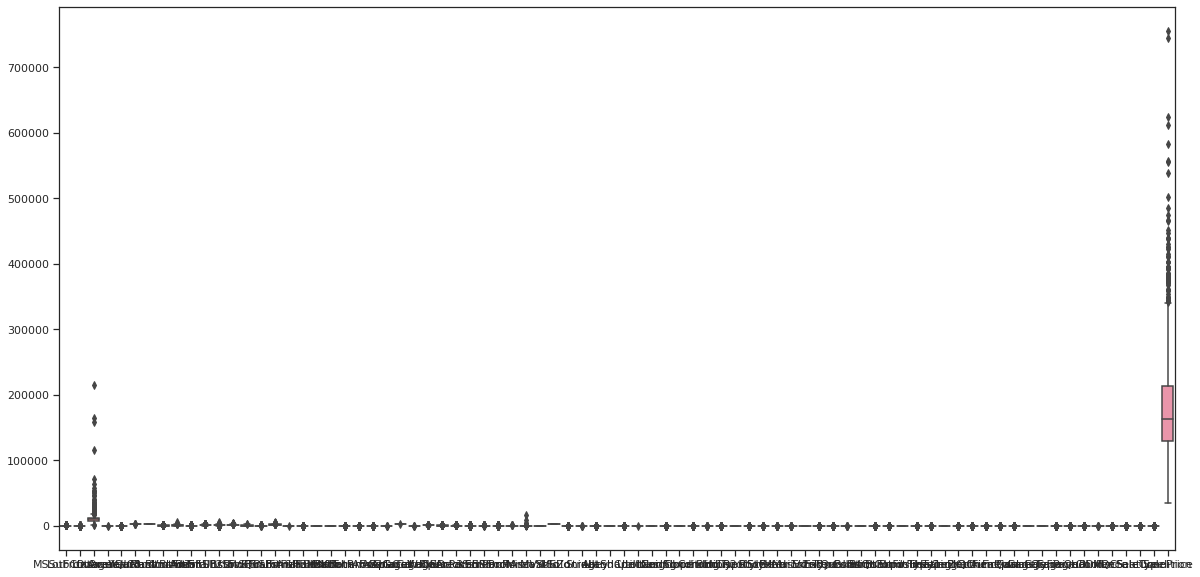

In [22]:
train_viz=train.copy()
cols=list(train_viz.columns)
plt.figure(figsize=(20,10))
sns.boxplot(data=train_viz)

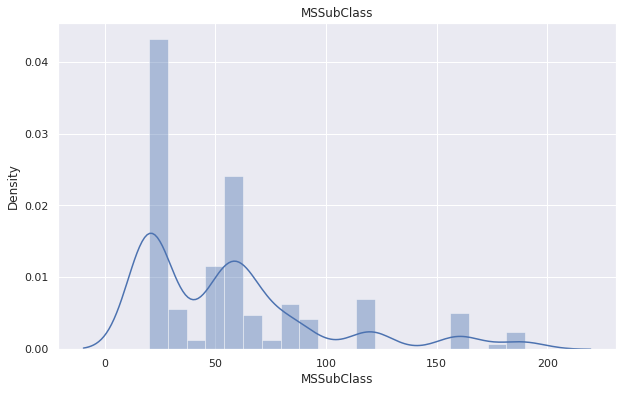

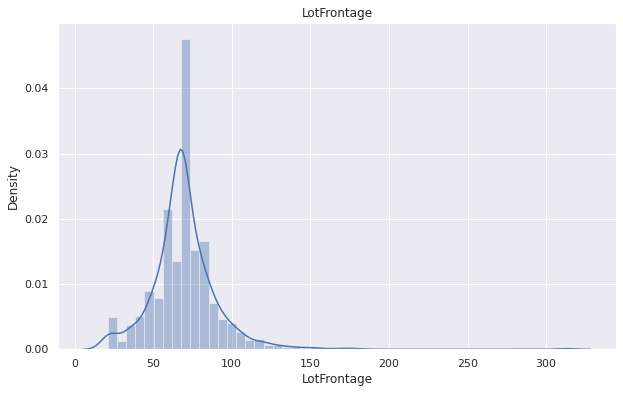

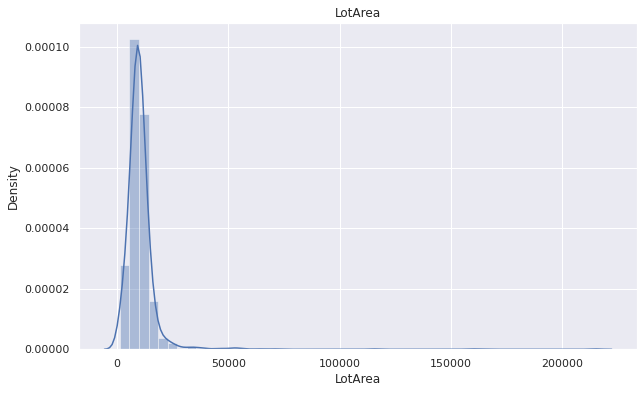

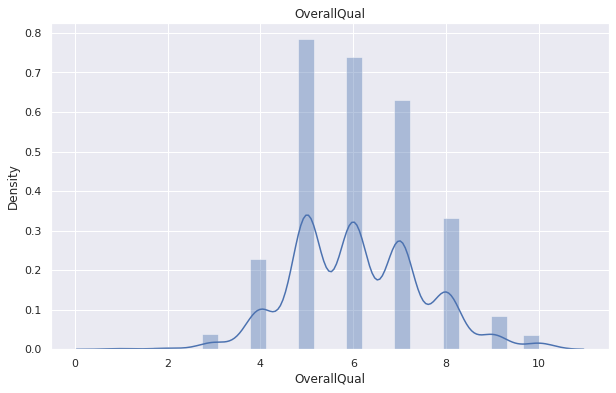

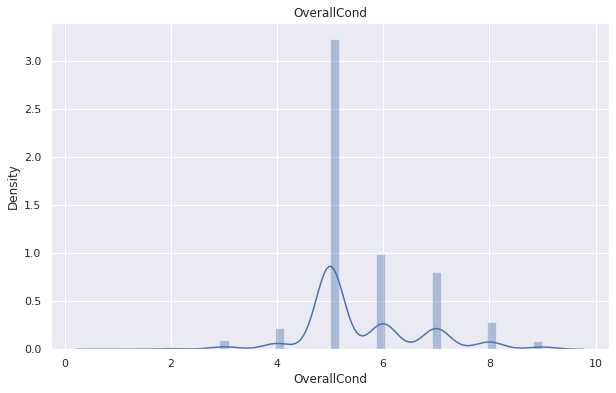

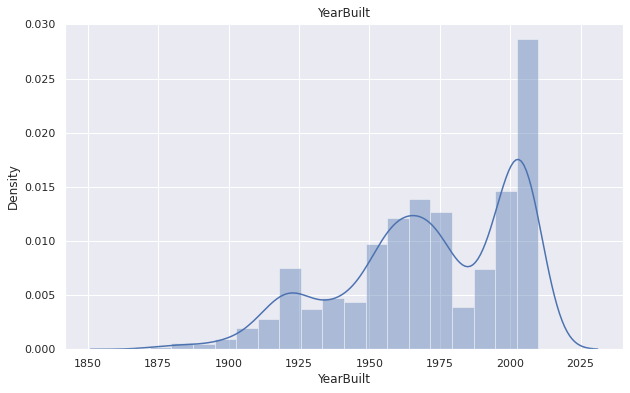

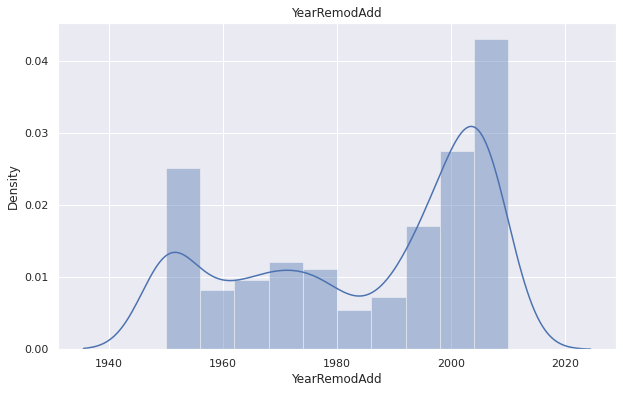

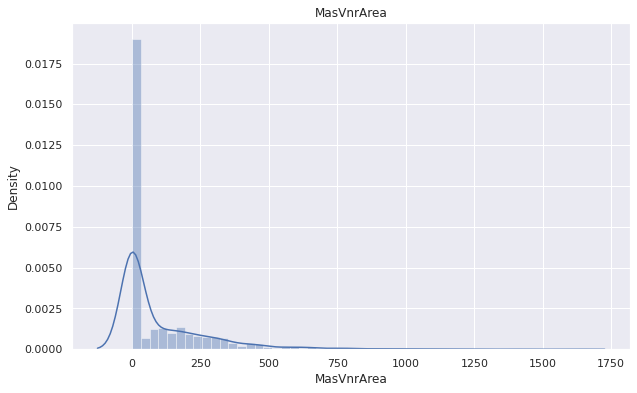

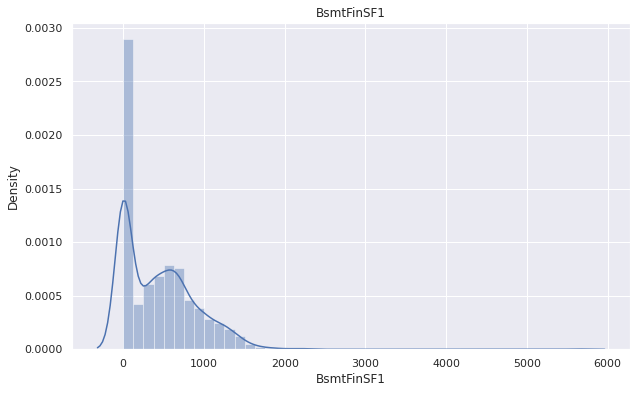

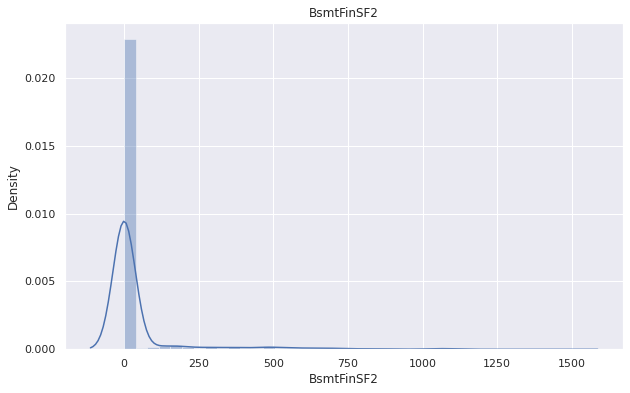

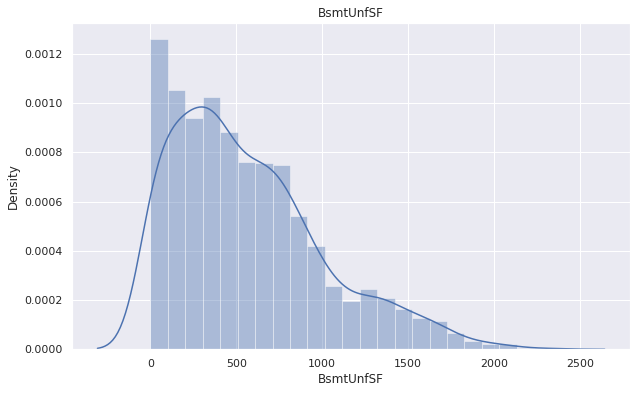

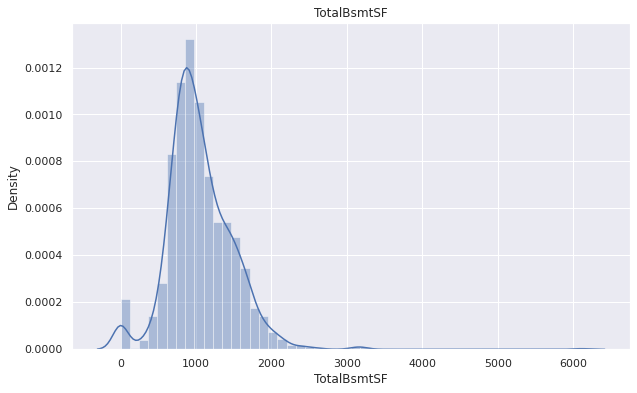

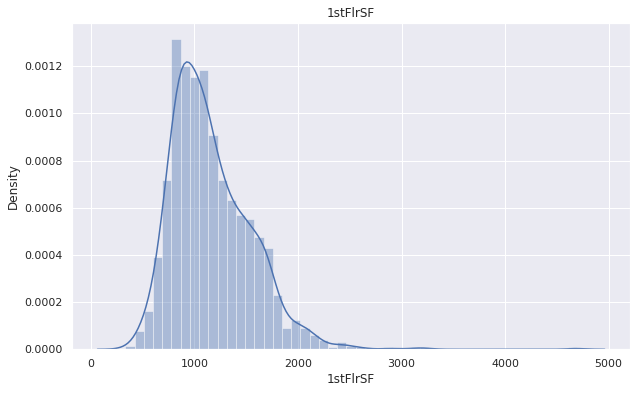

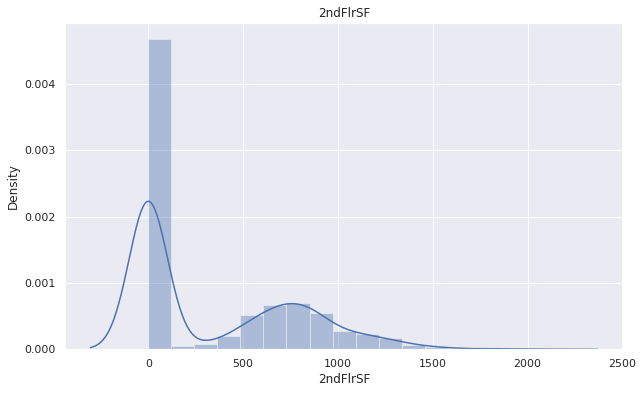

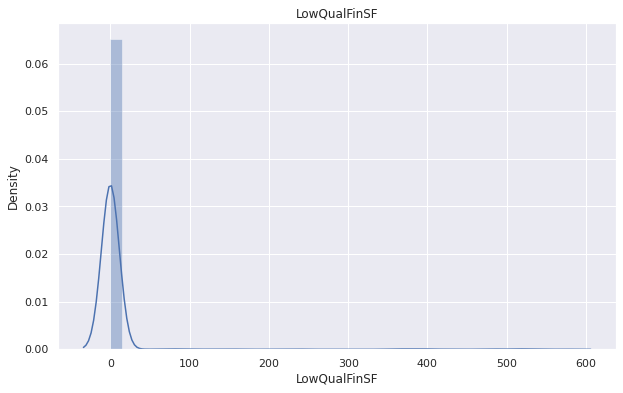

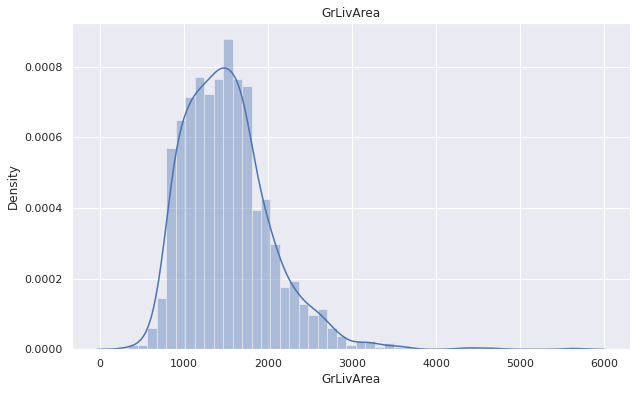

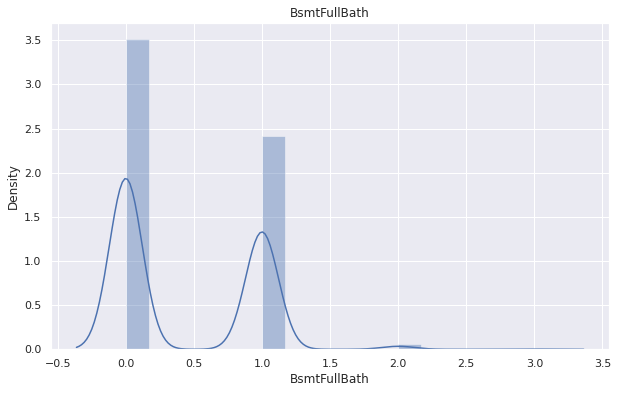

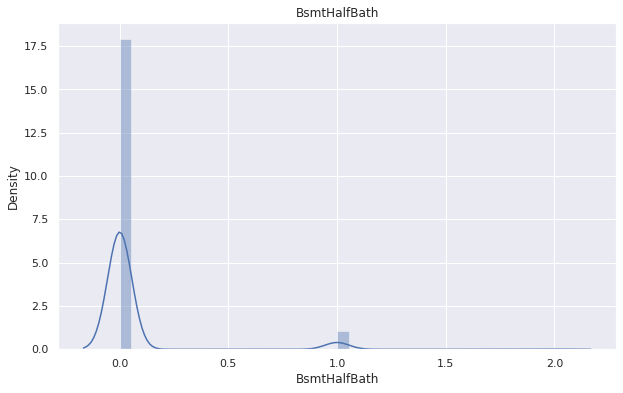

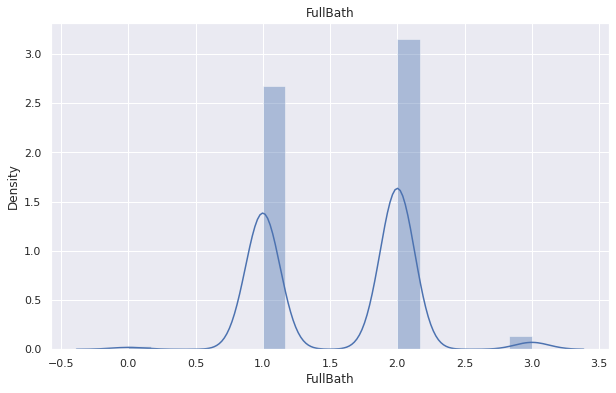

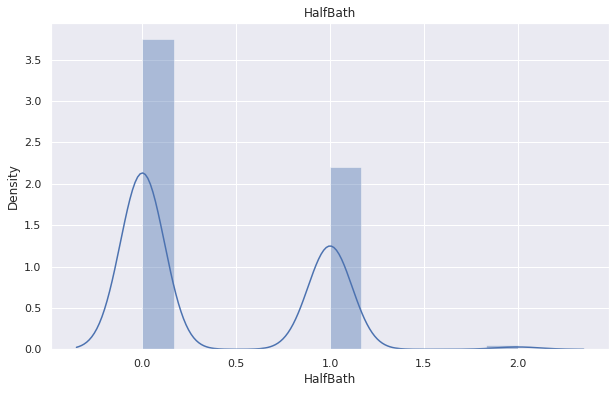

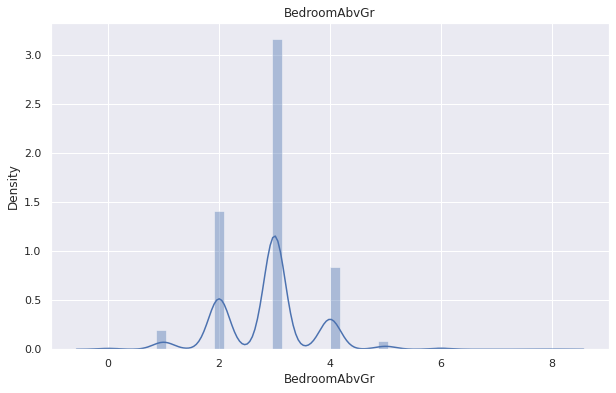

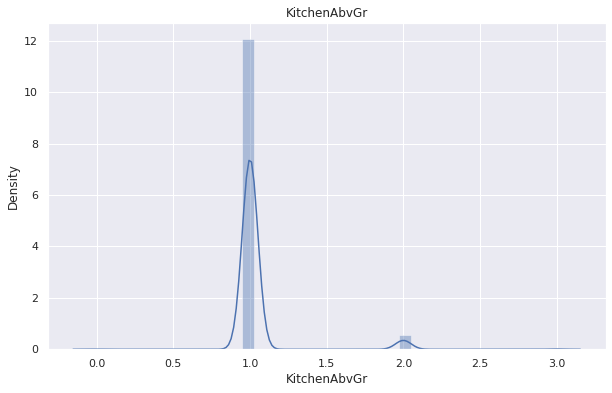

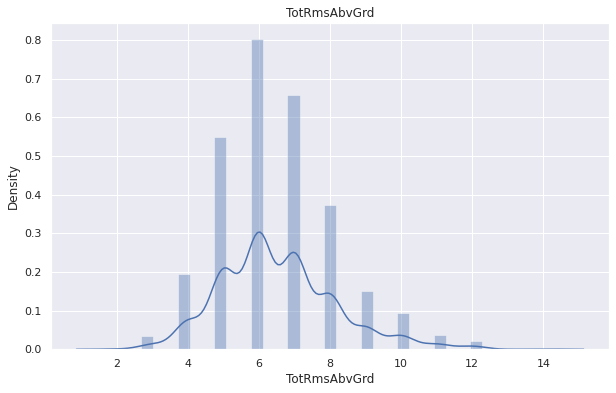

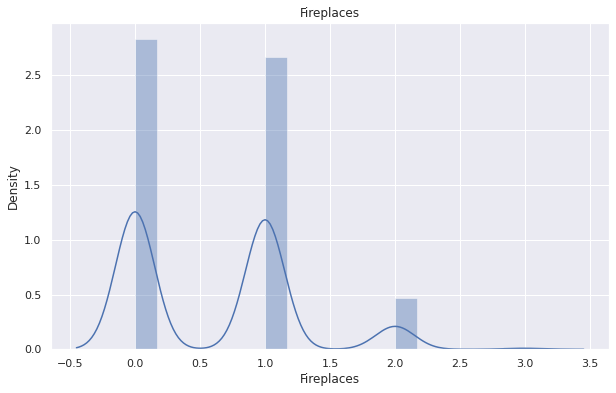

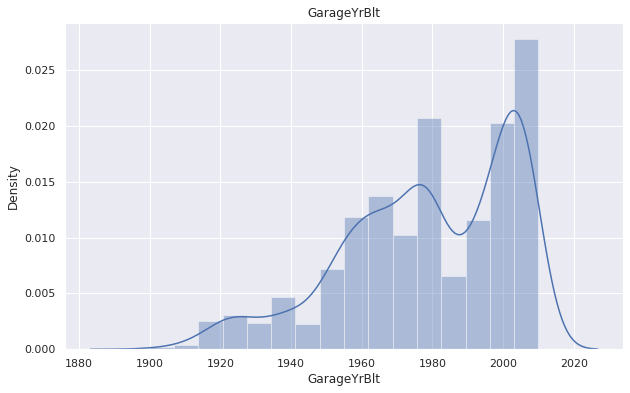

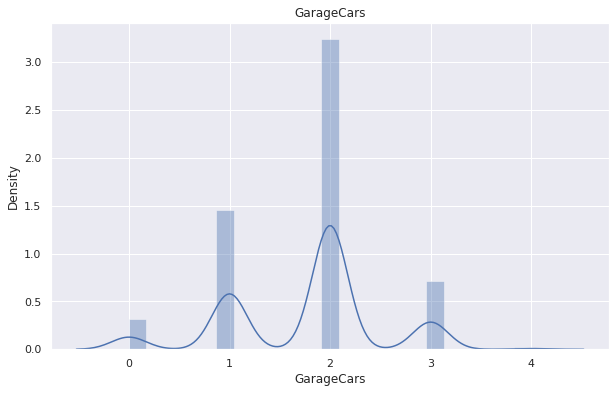

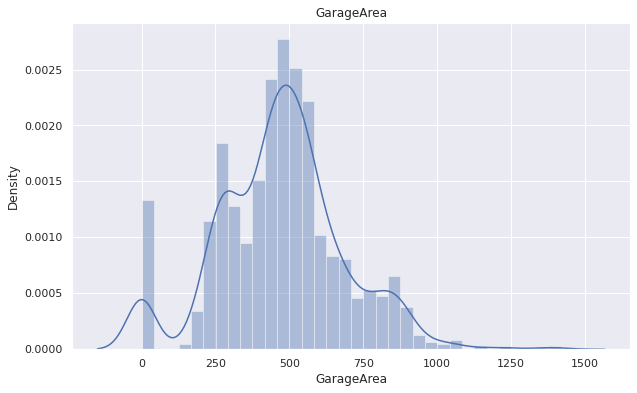

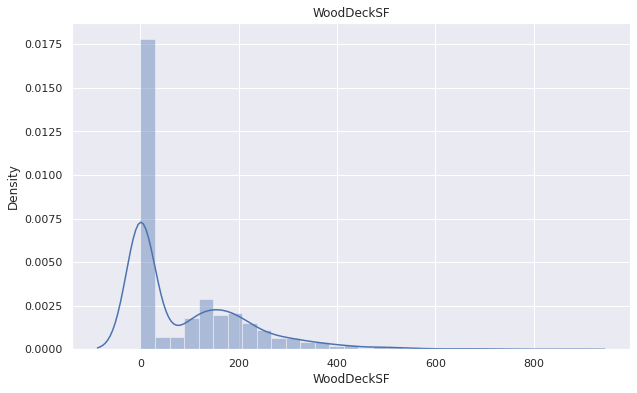

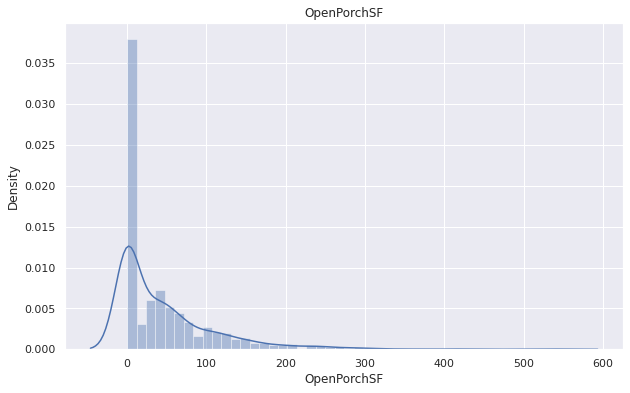

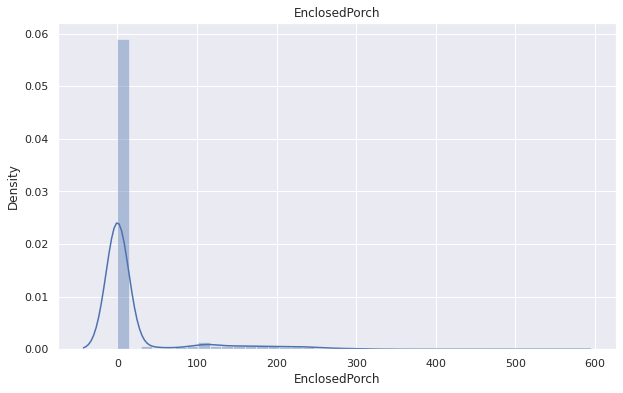

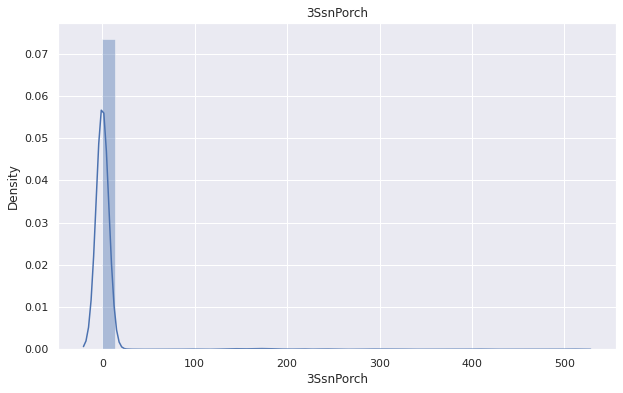

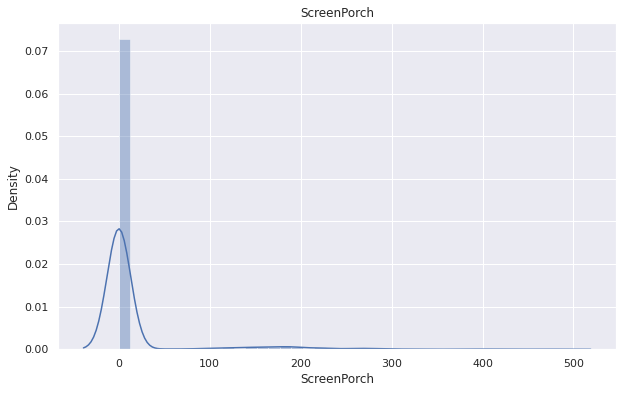

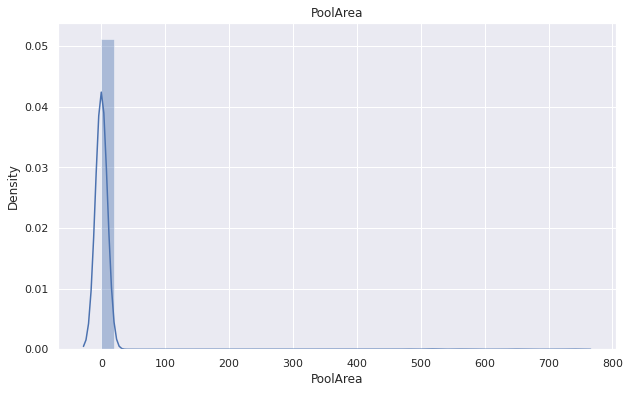

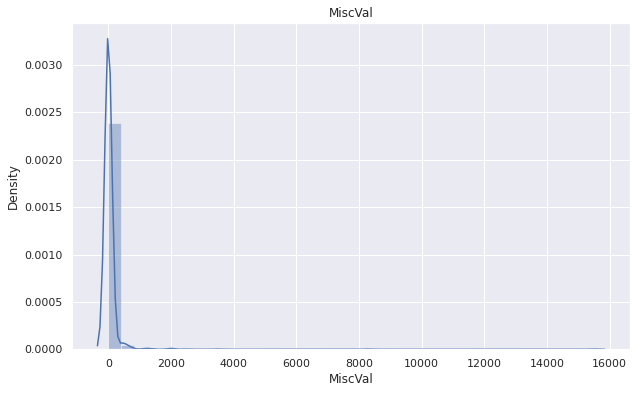

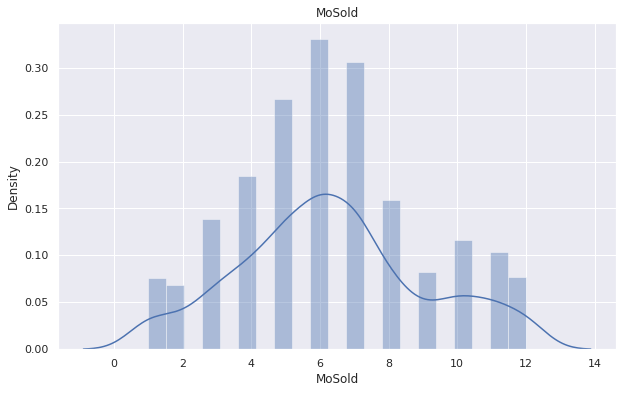

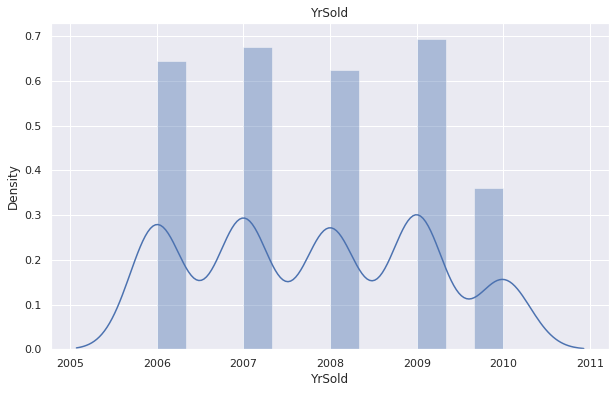

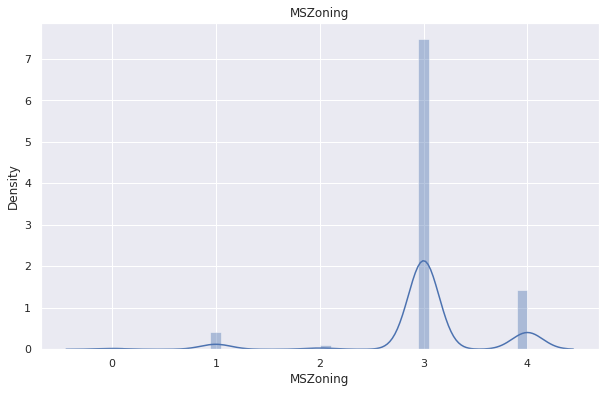

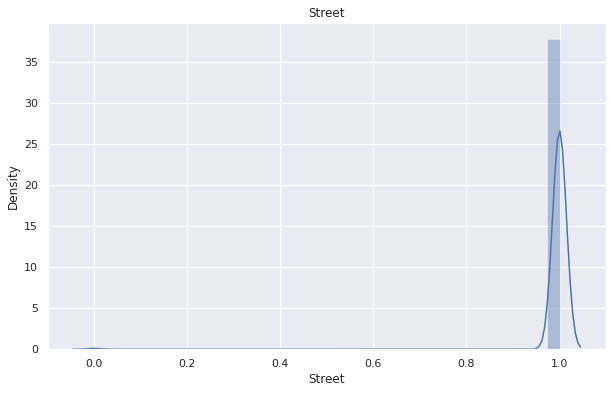

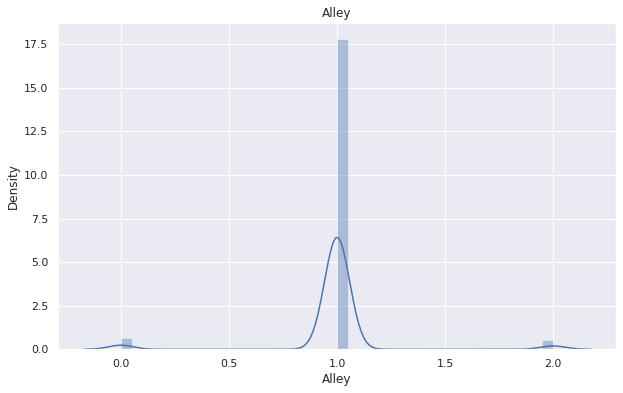

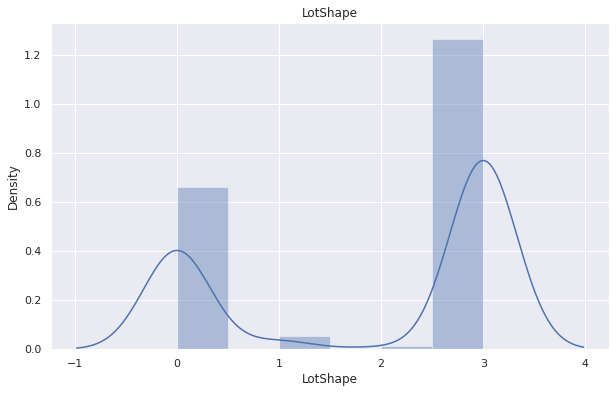

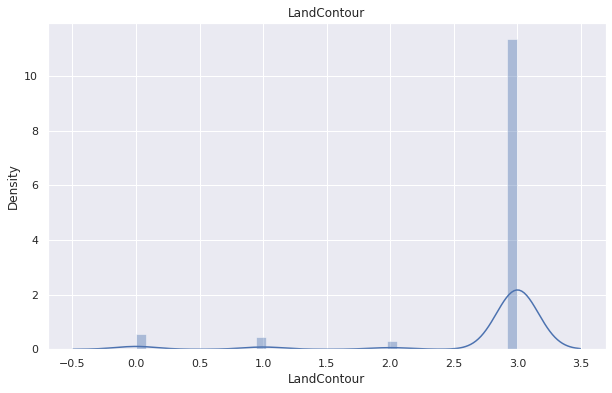

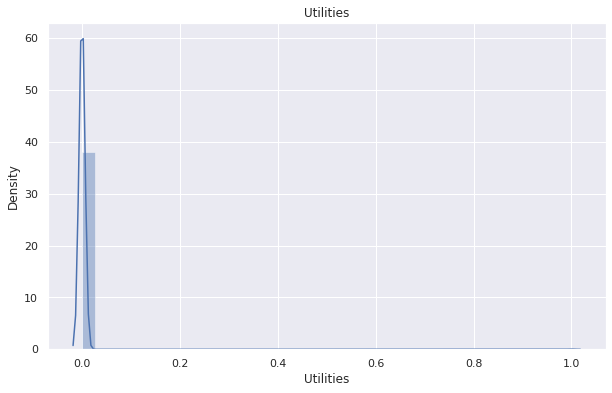

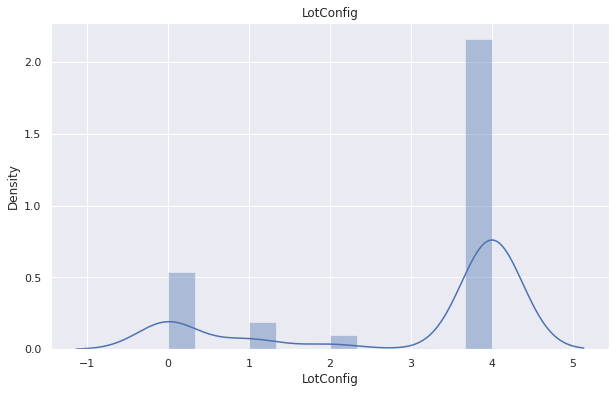

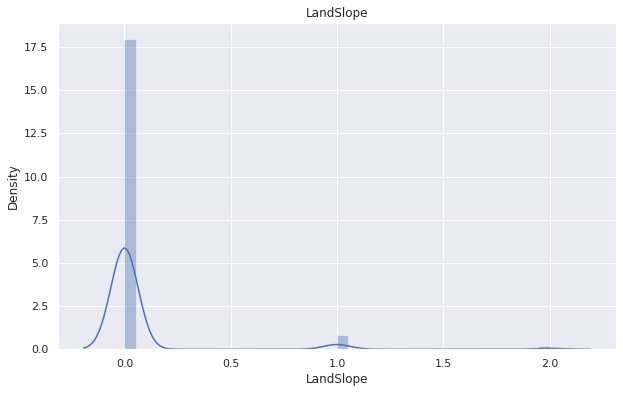

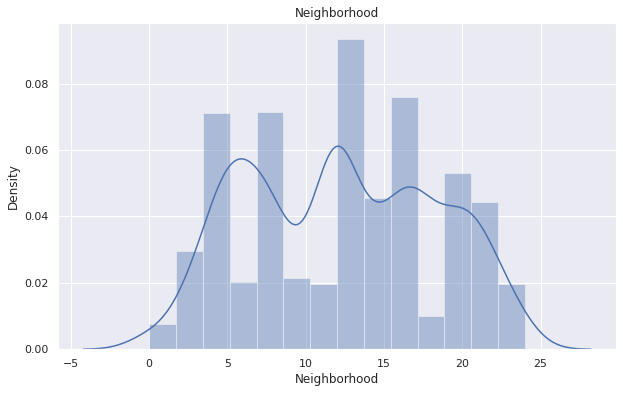

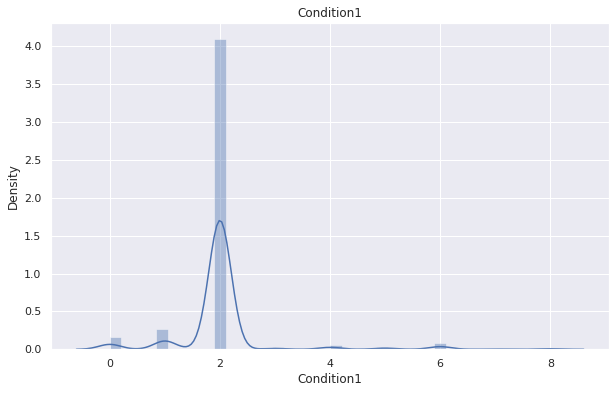

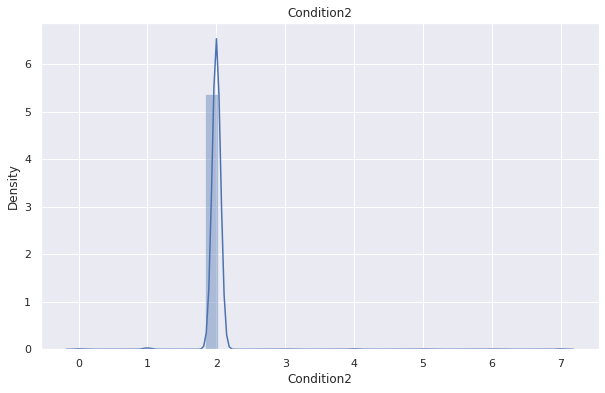

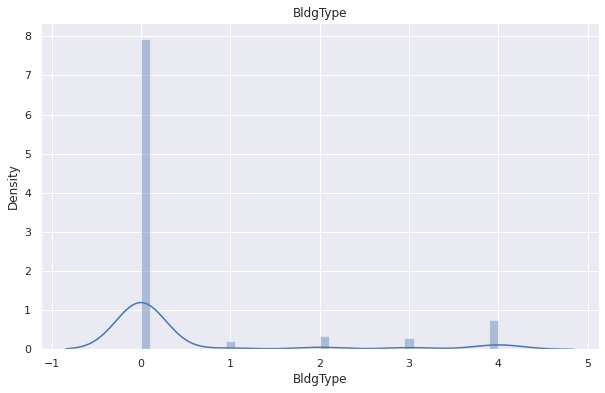

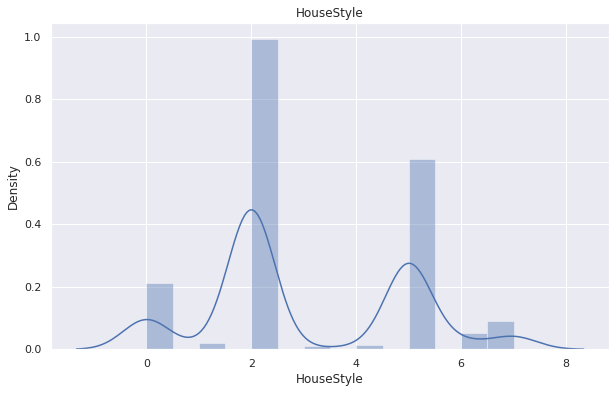

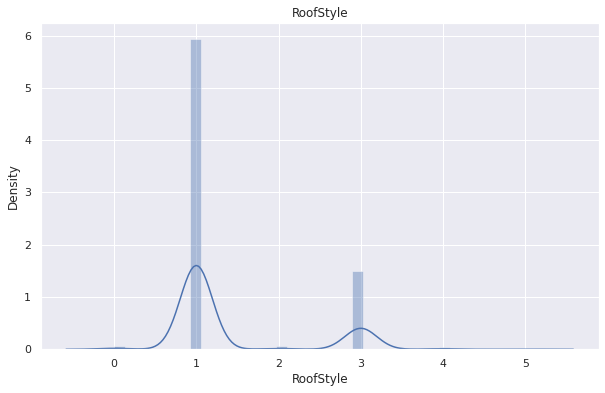

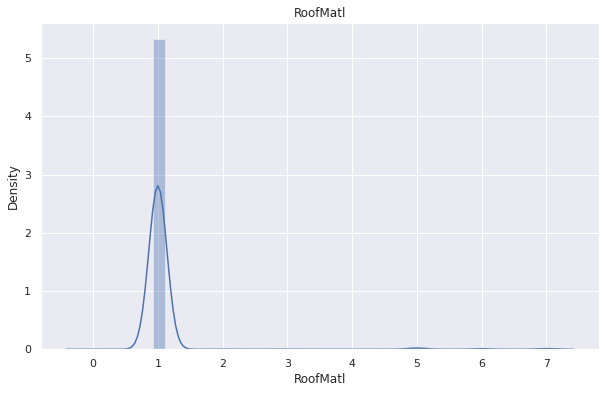

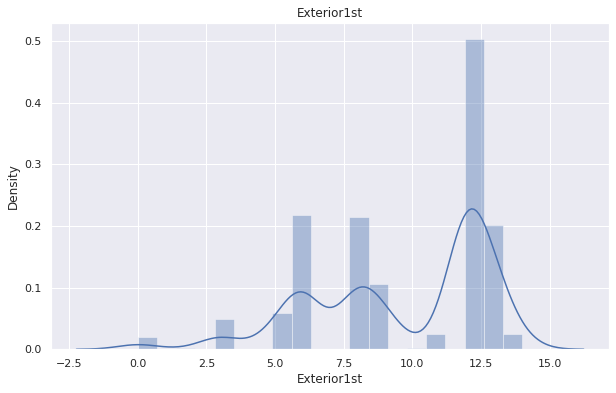

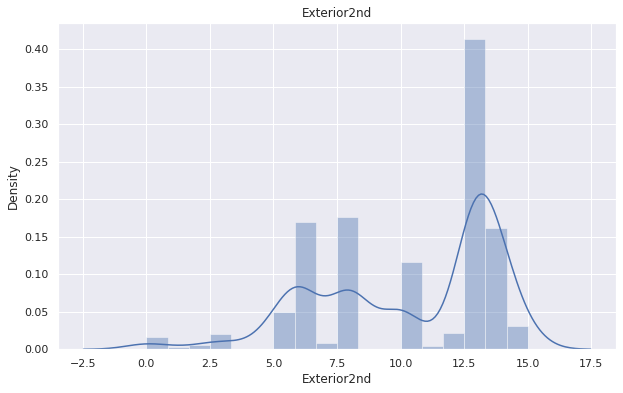

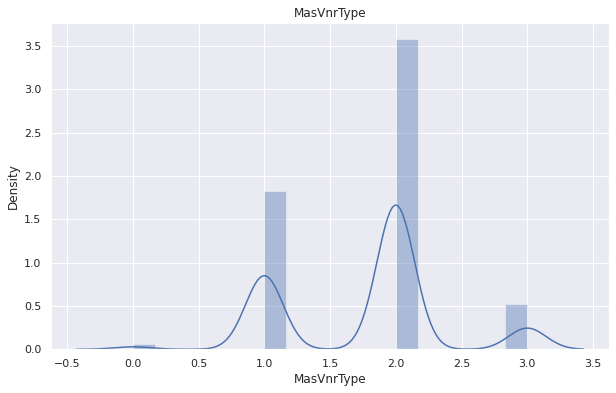

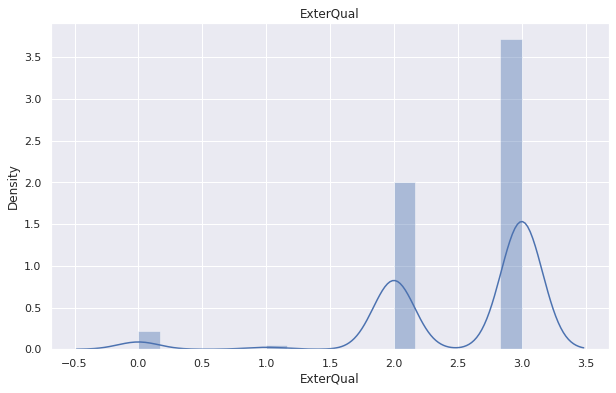

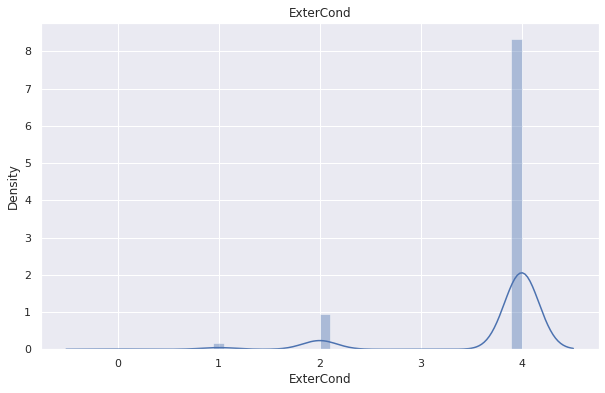

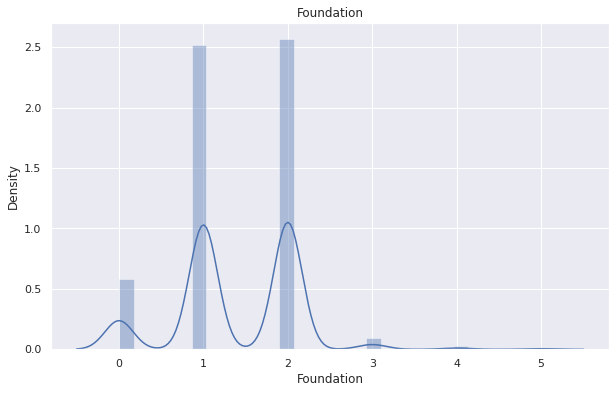

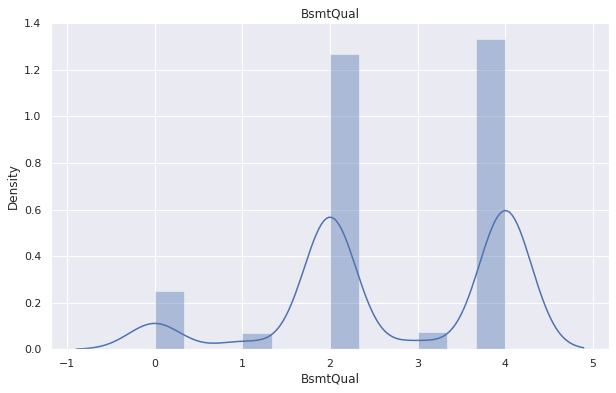

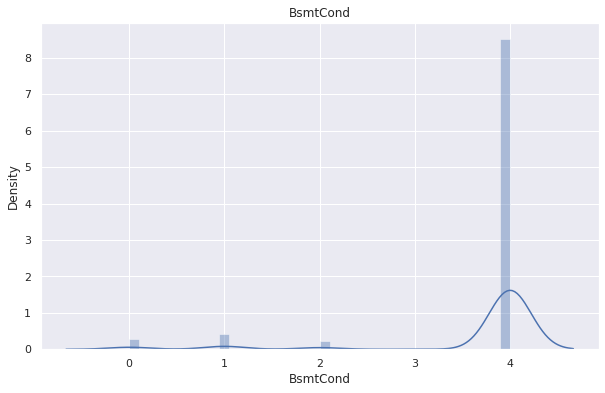

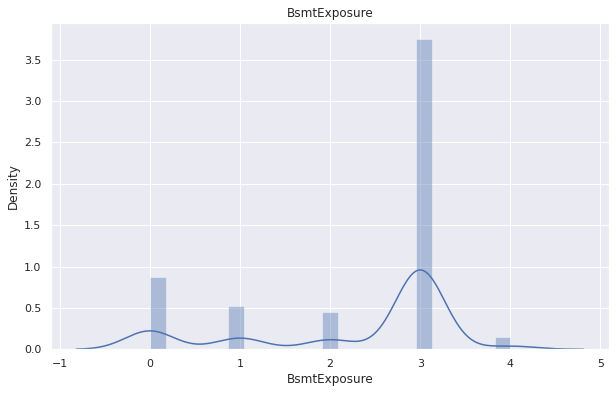

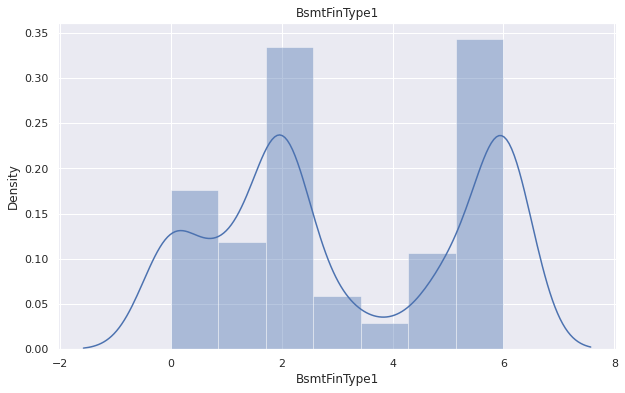

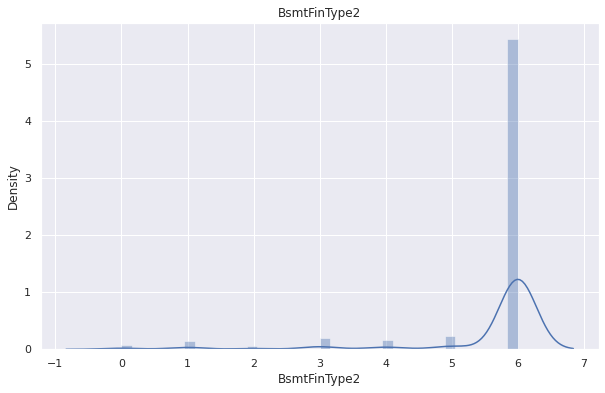

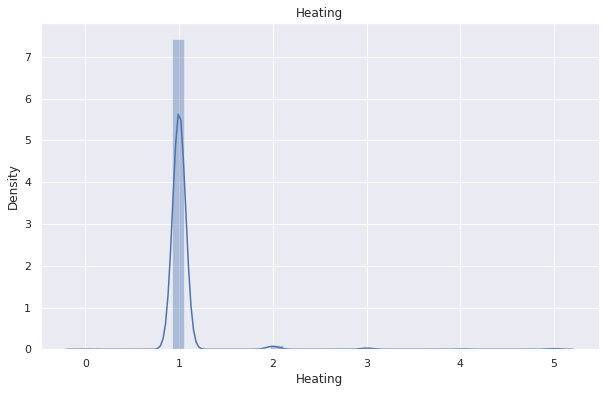

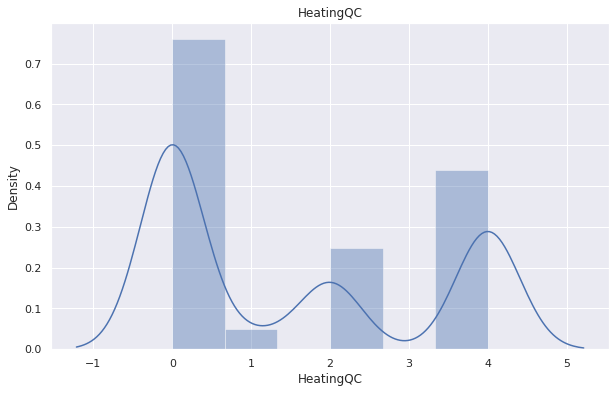

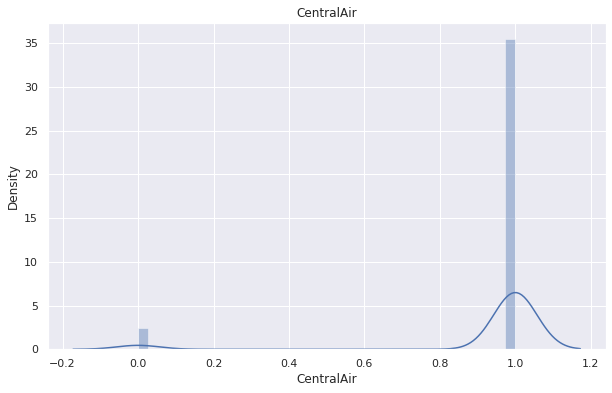

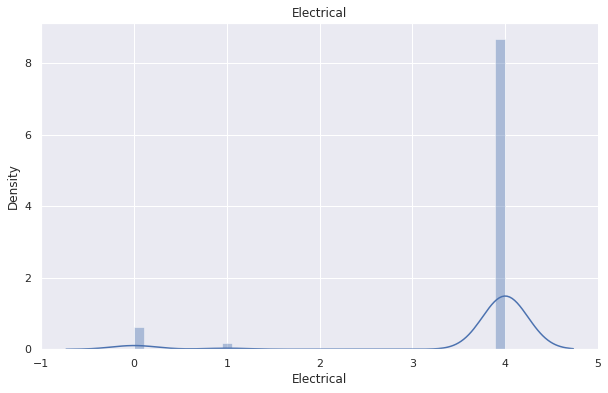

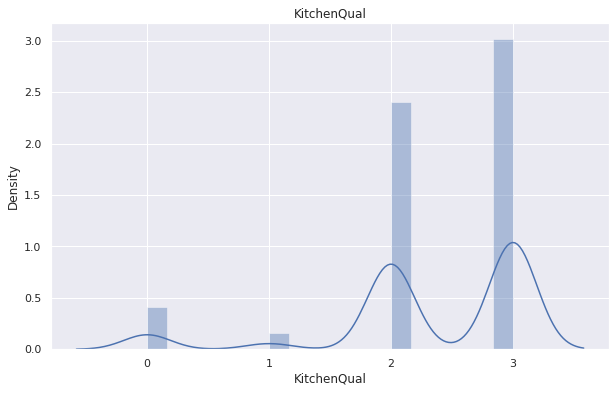

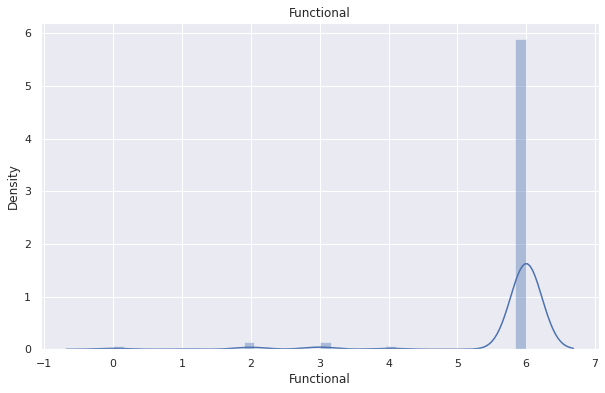

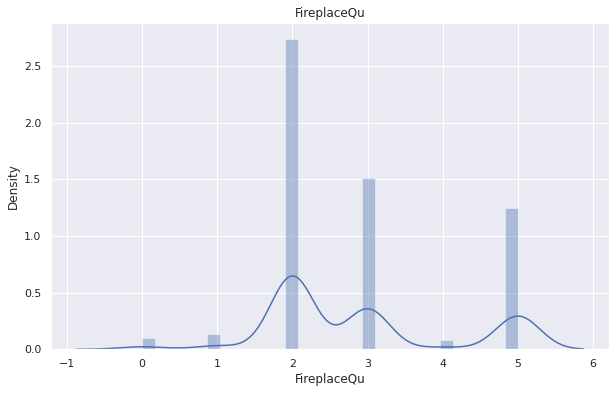

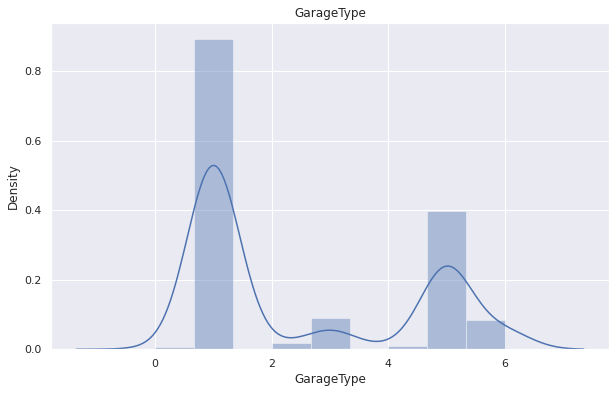

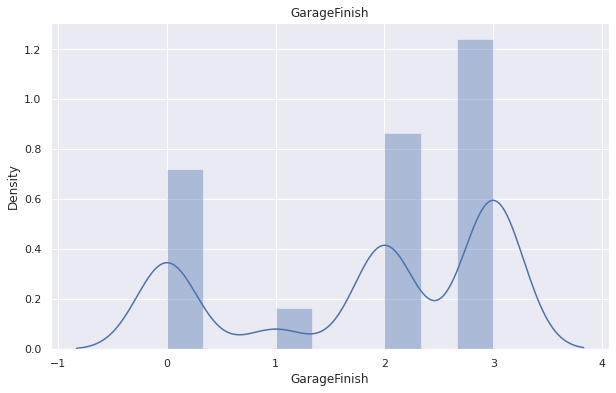

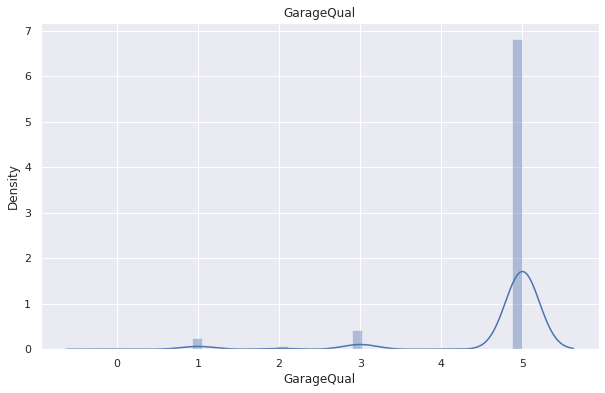

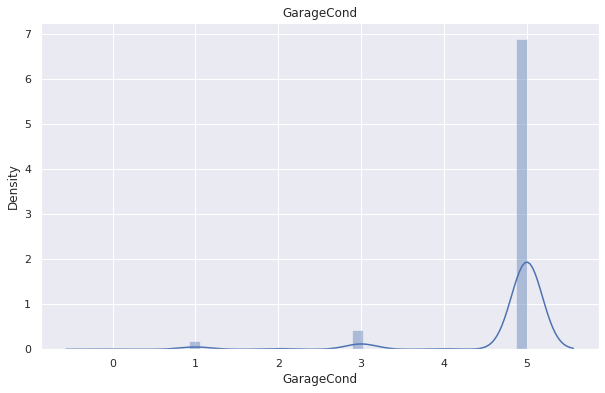

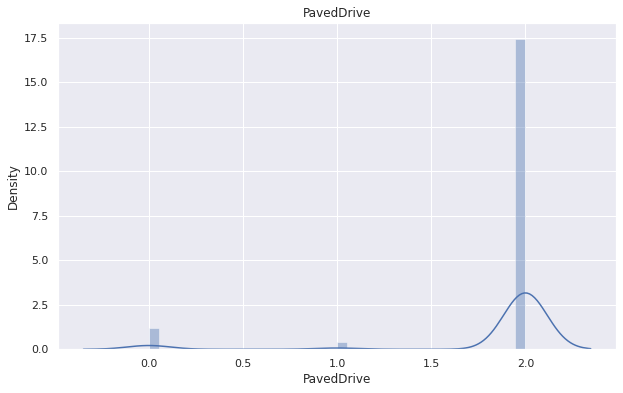

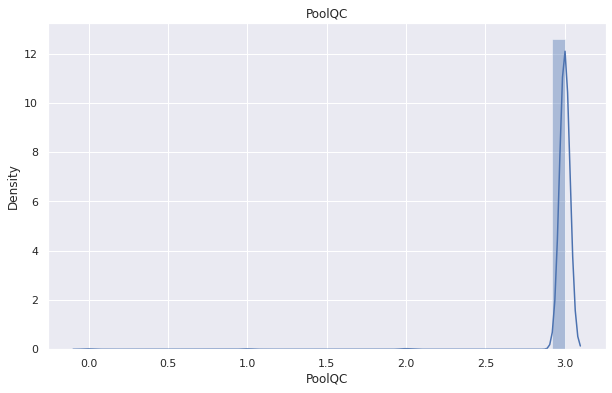

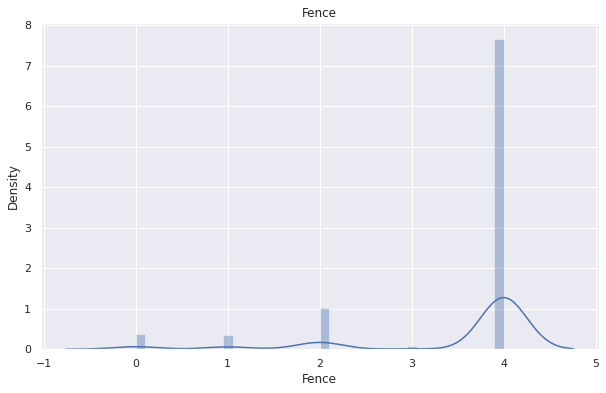

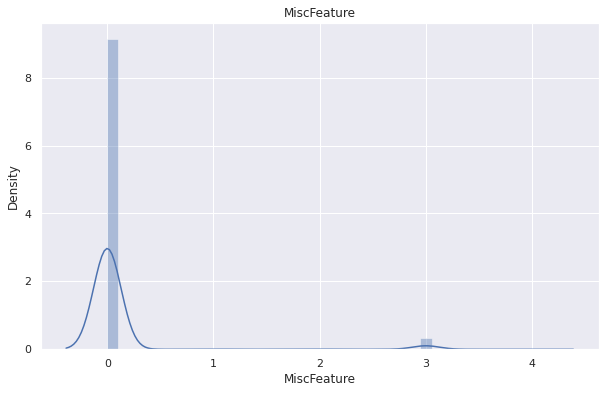

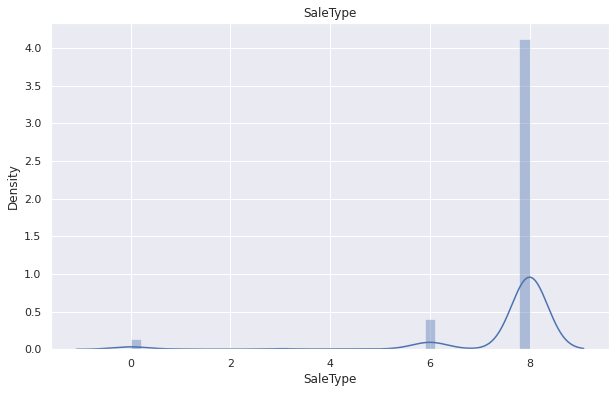

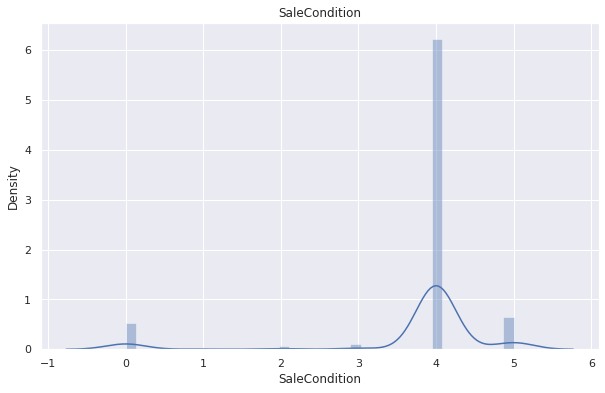

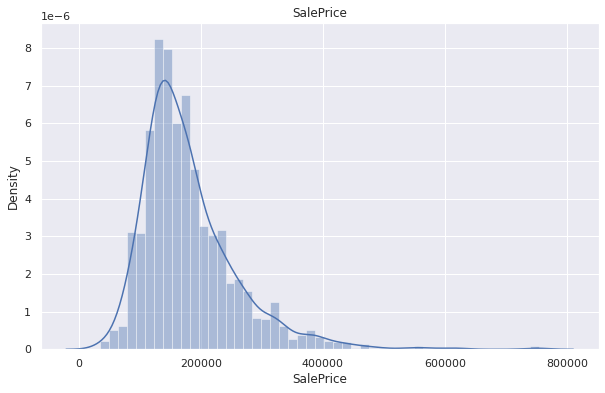

In [23]:
# distplot 
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(train_viz[col])
    plt.title(col)
    plt.show()

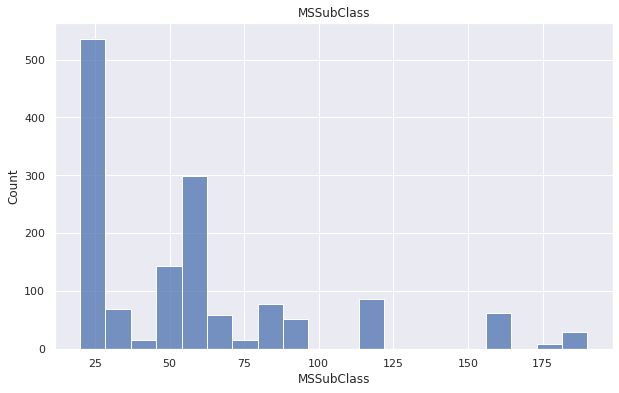

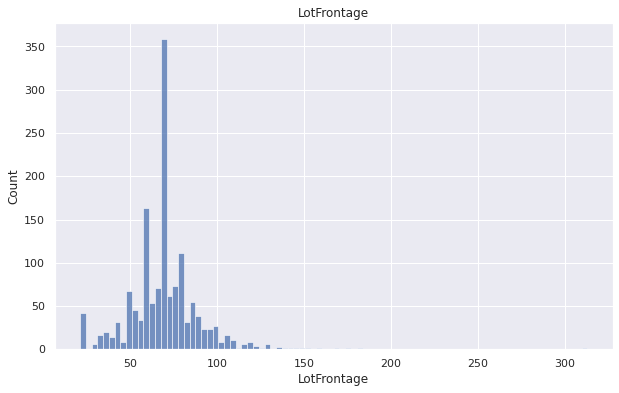

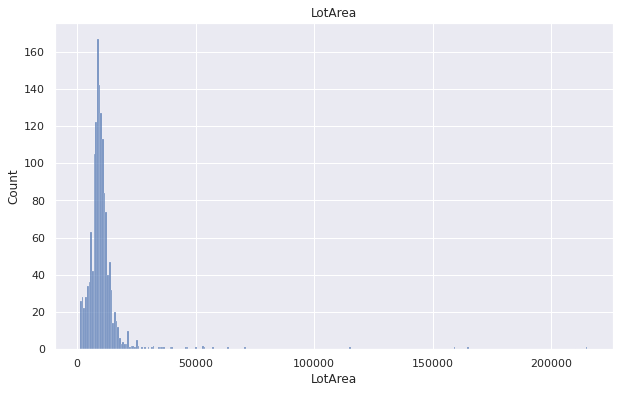

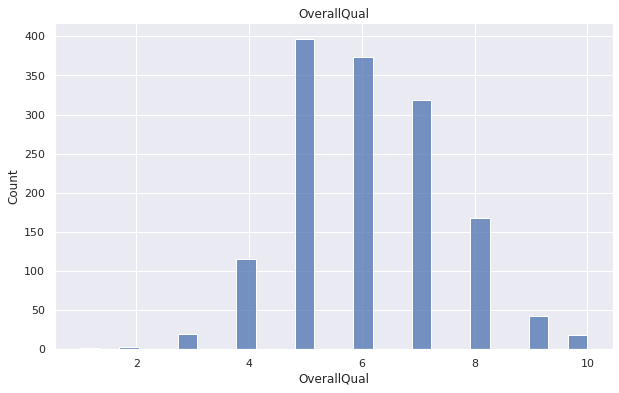

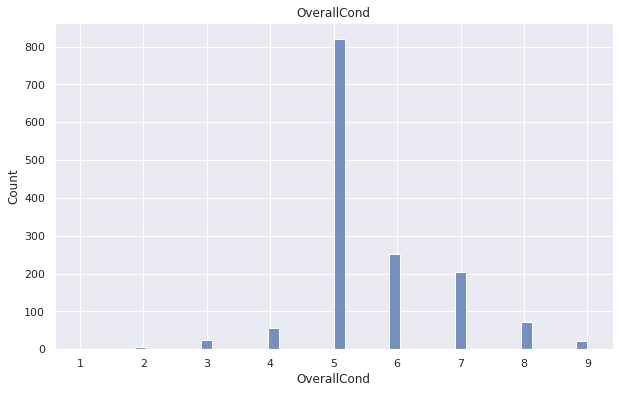

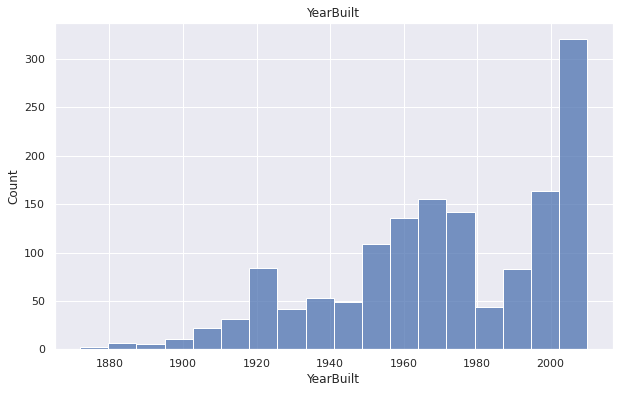

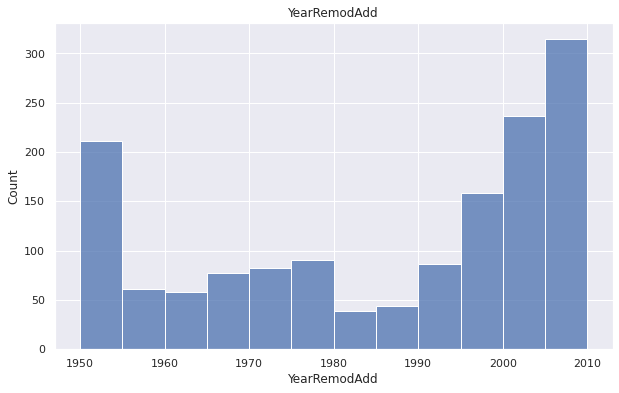

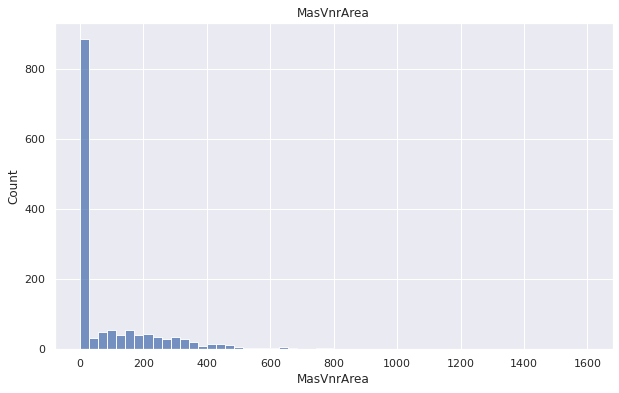

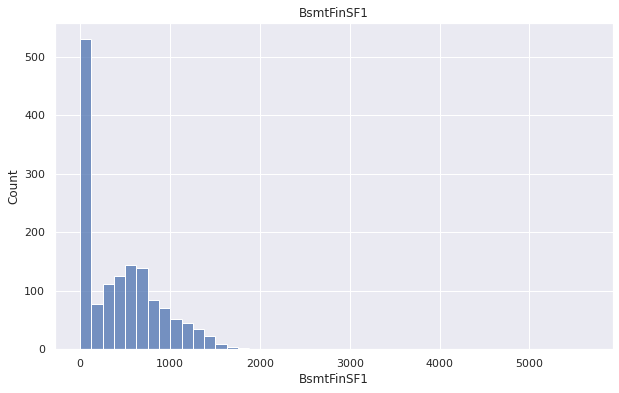

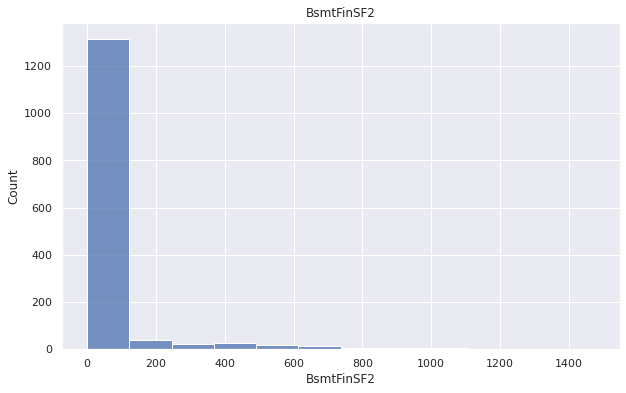

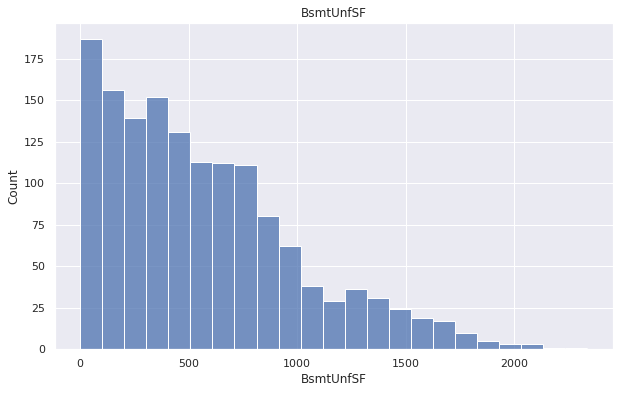

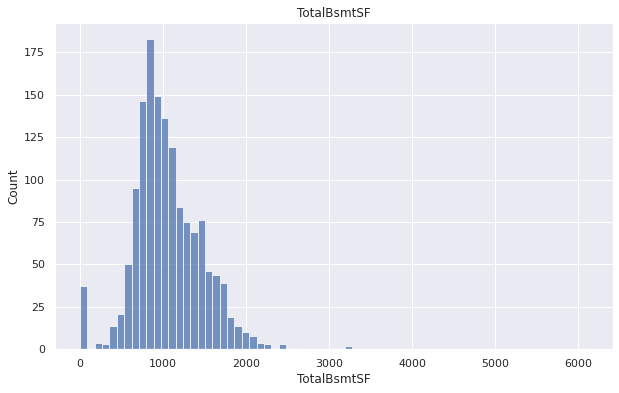

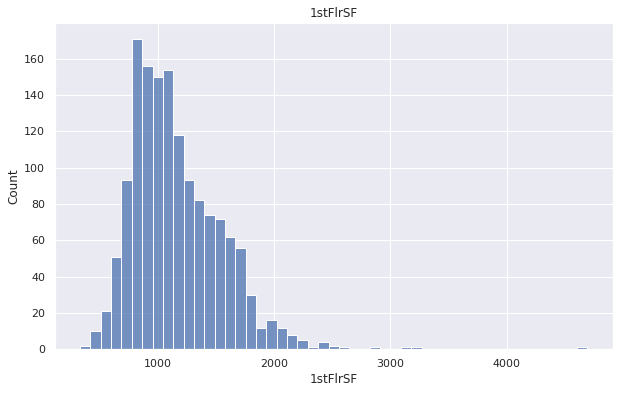

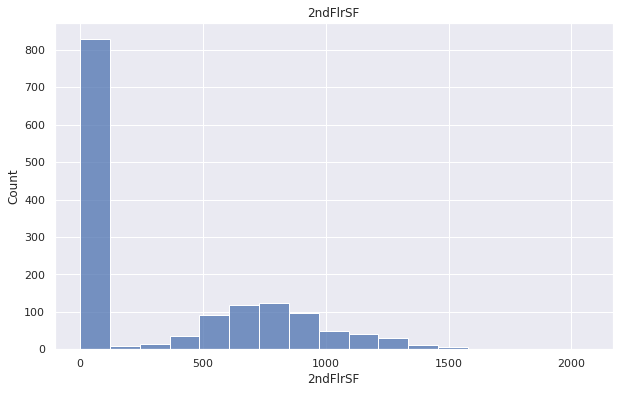

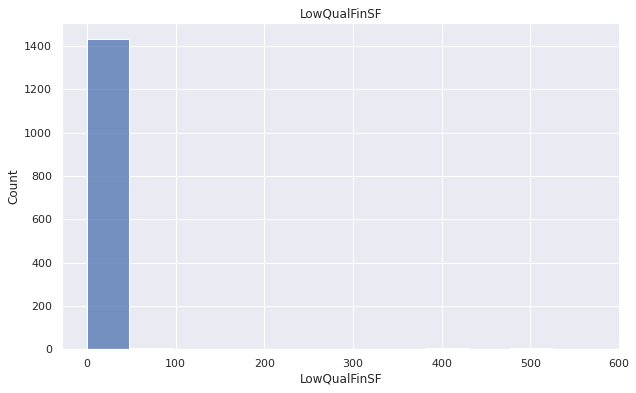

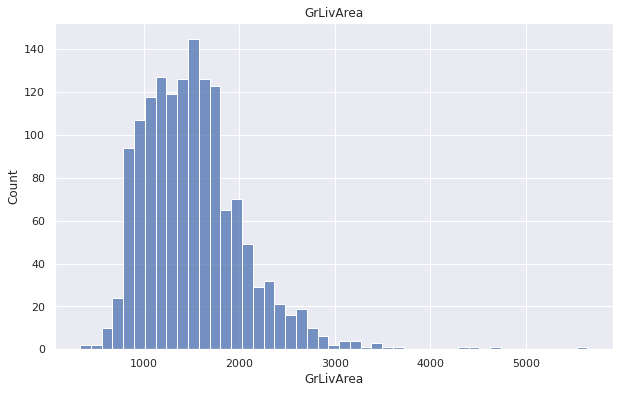

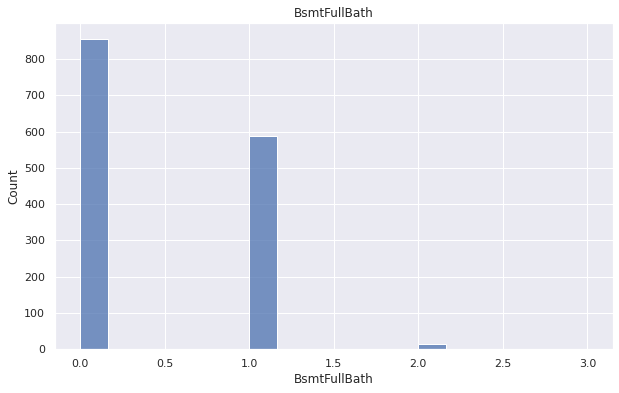

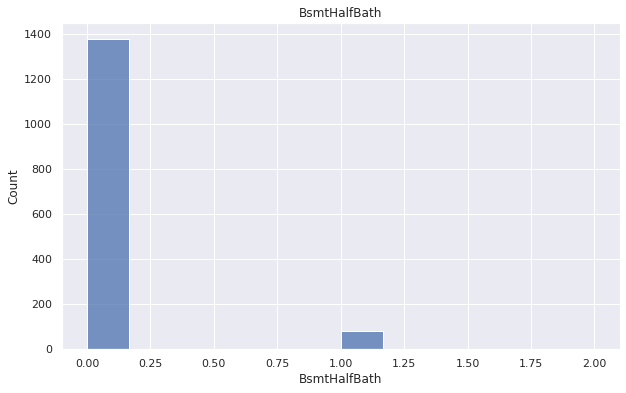

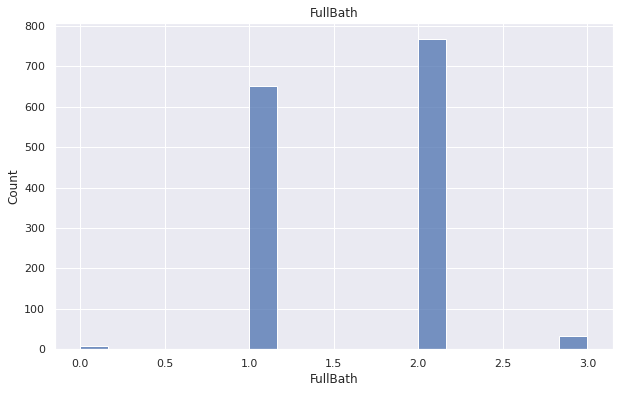

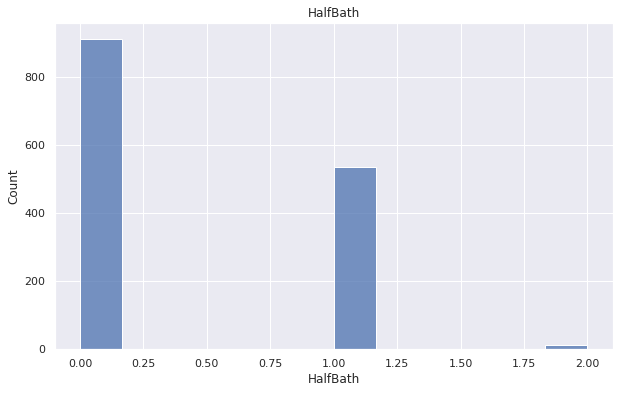

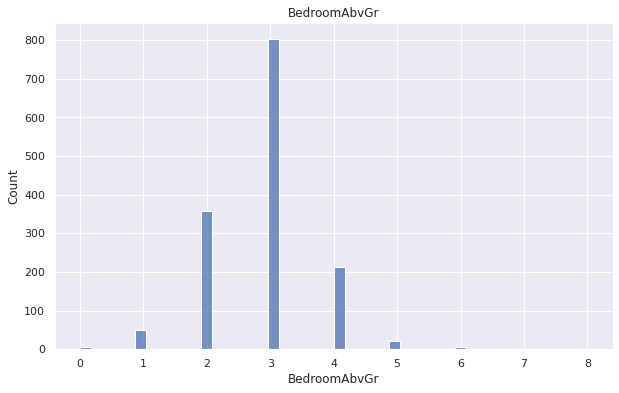

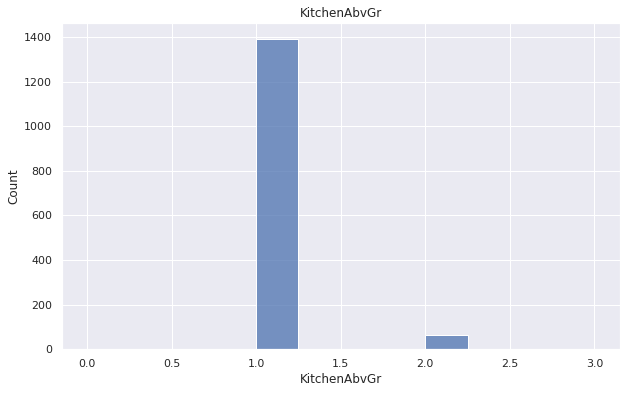

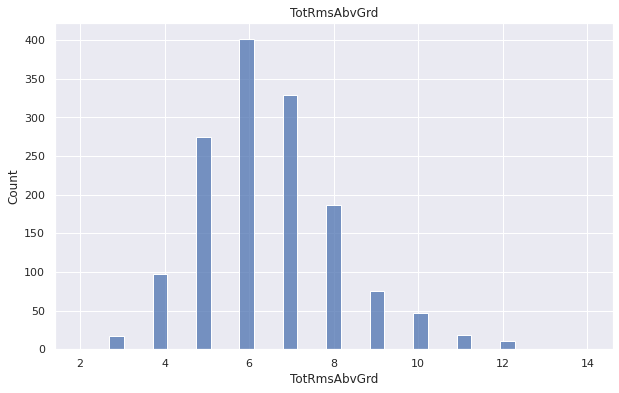

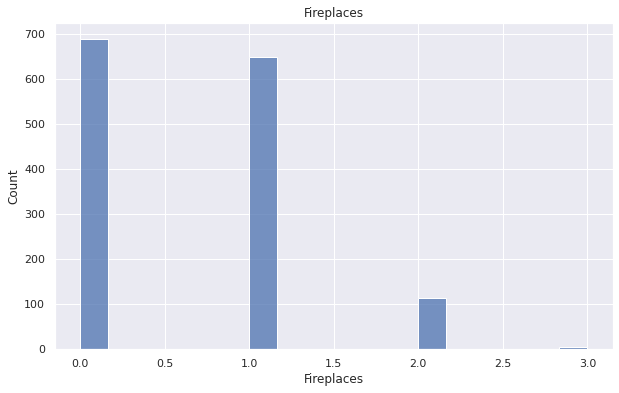

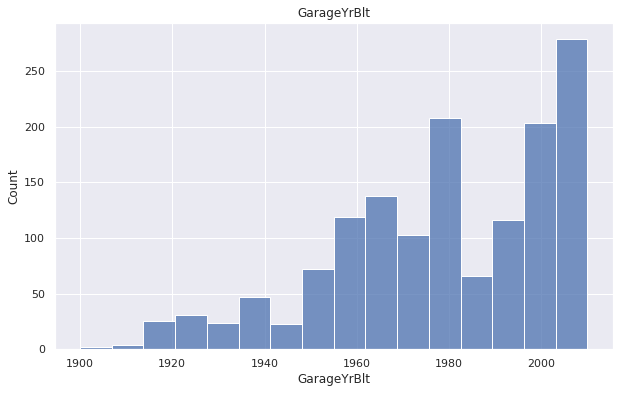

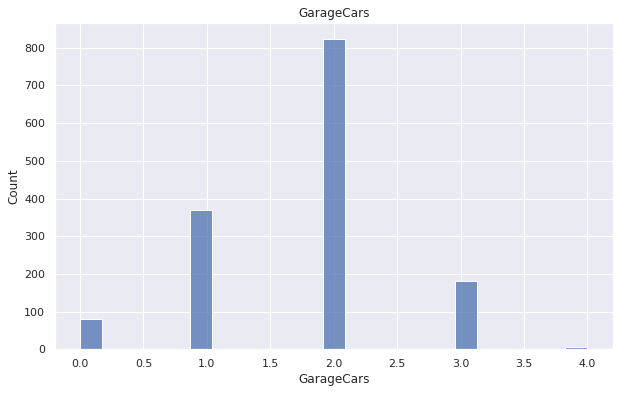

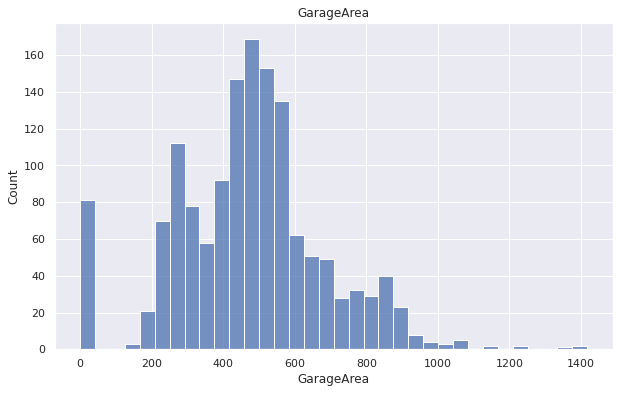

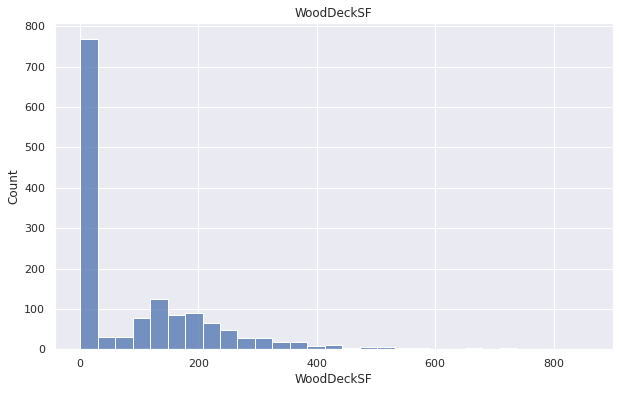

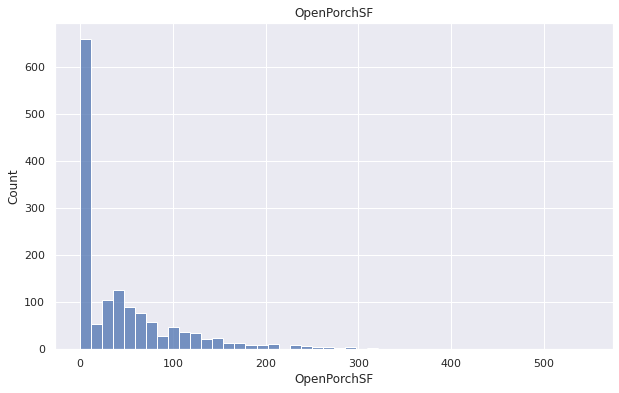

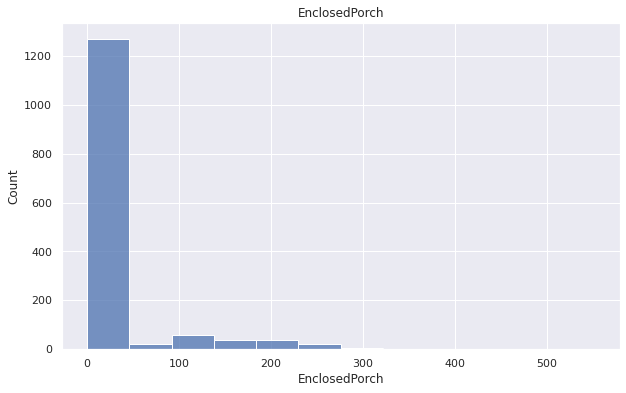

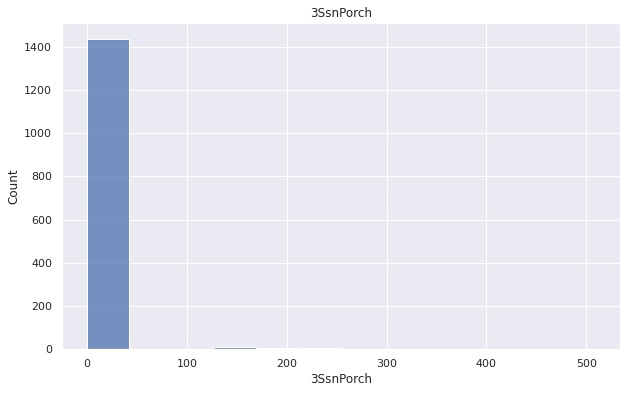

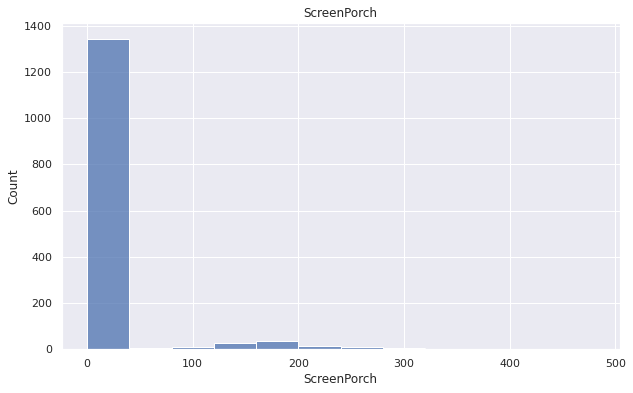

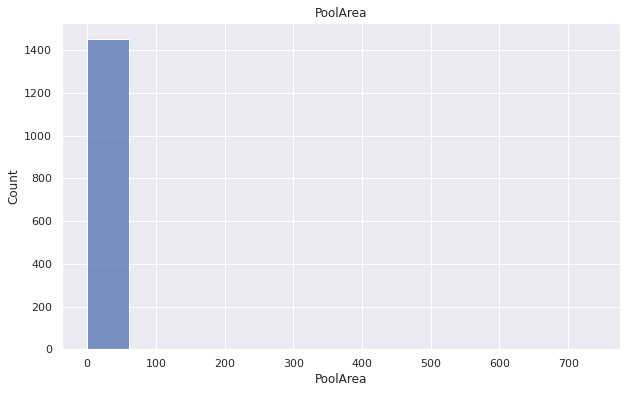

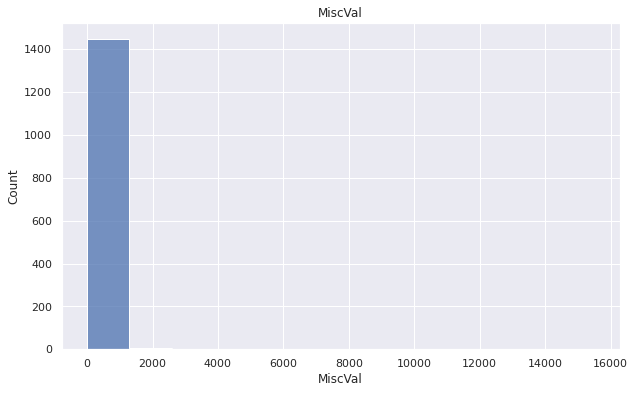

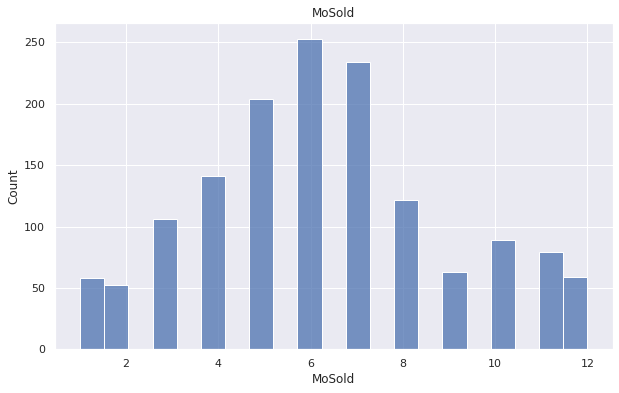

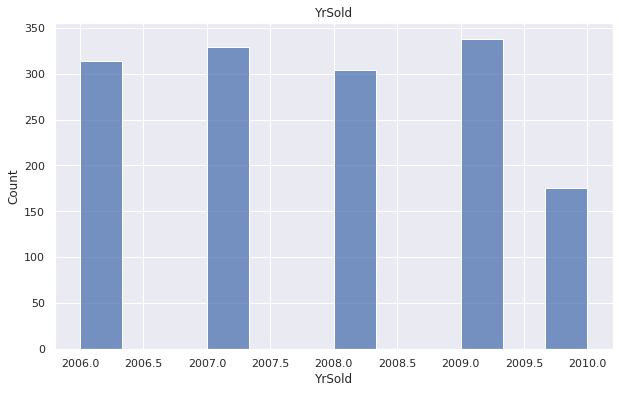

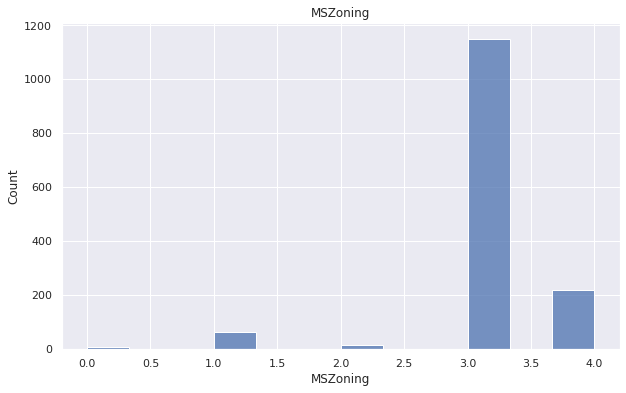

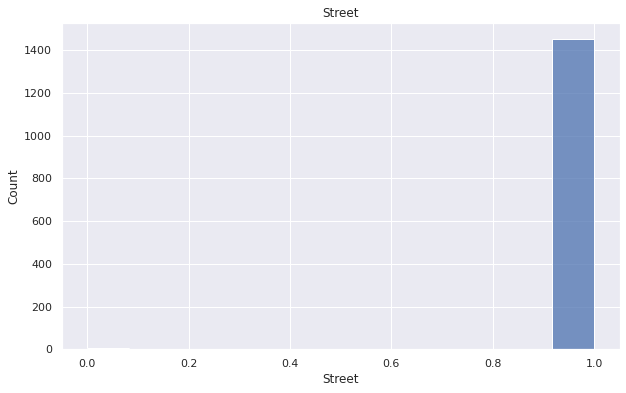

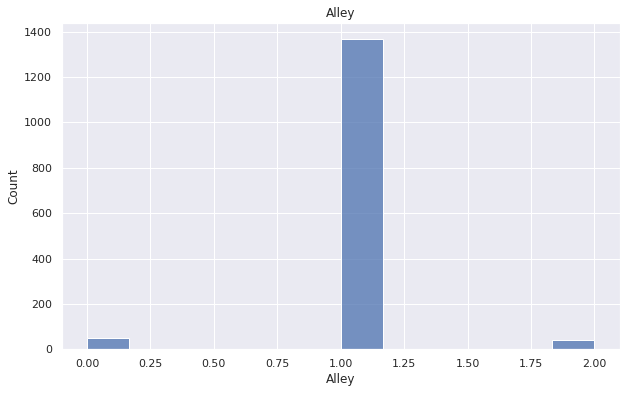

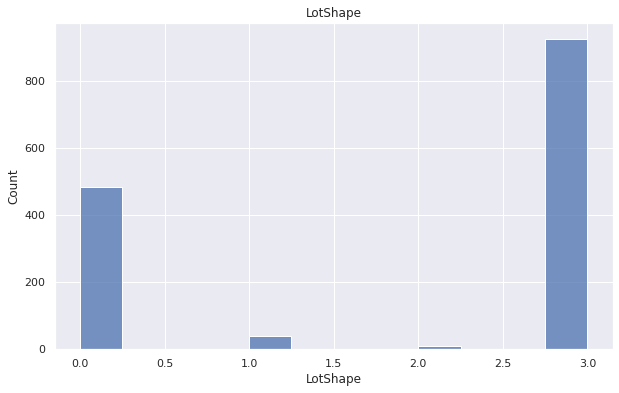

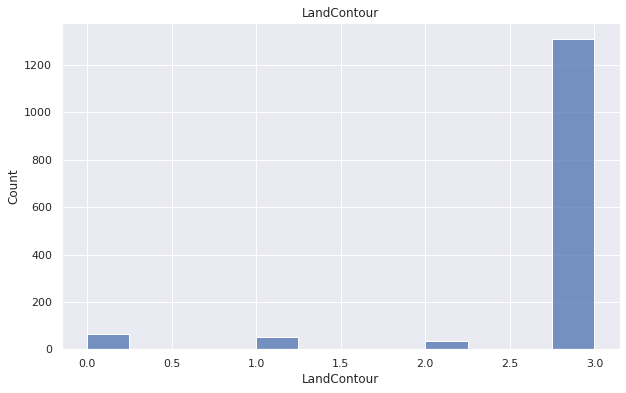

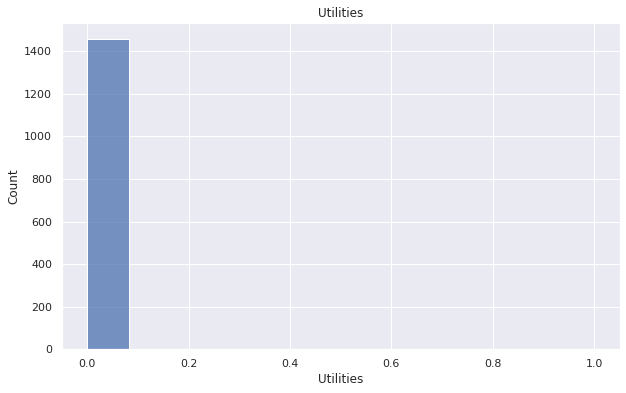

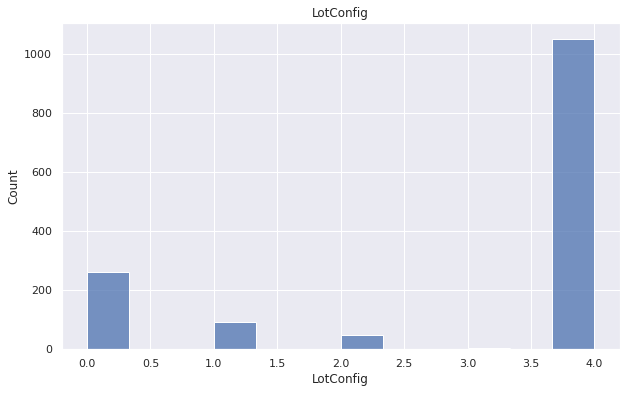

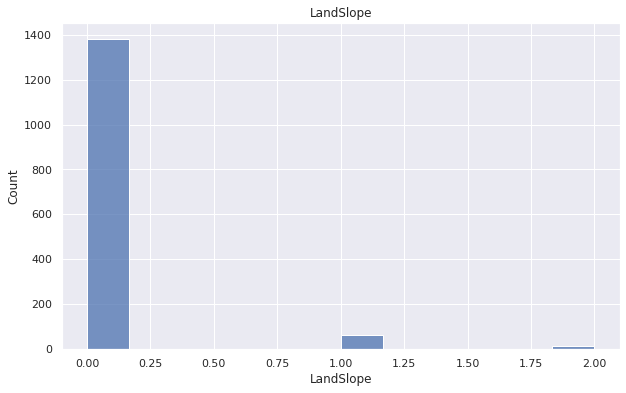

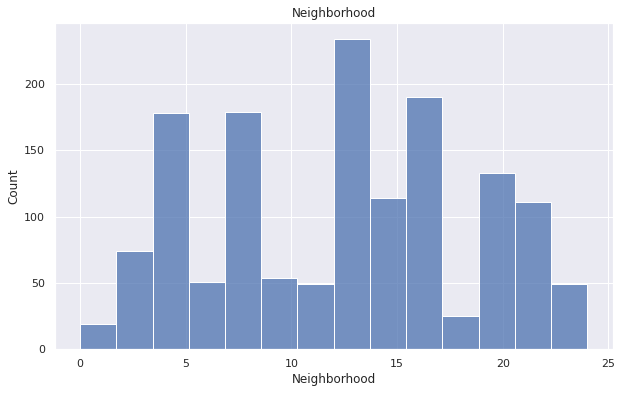

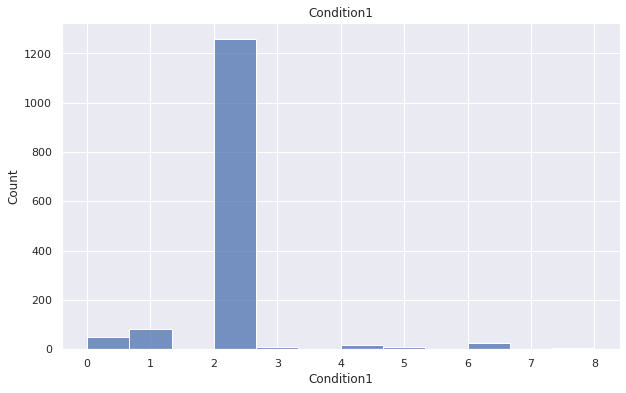

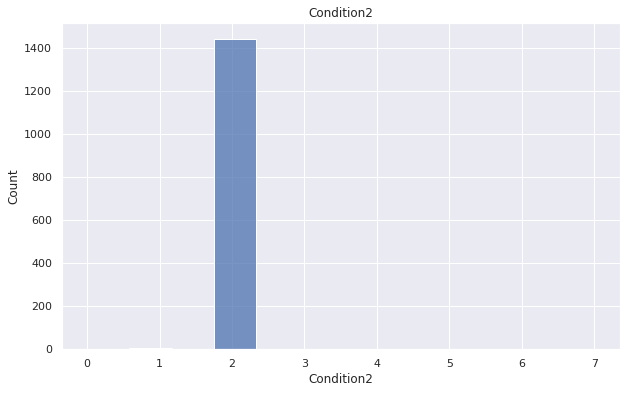

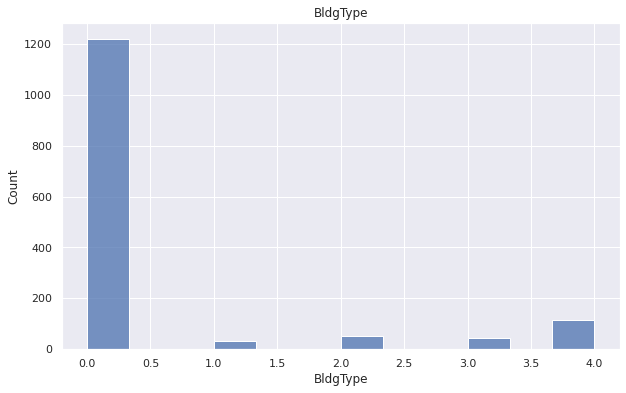

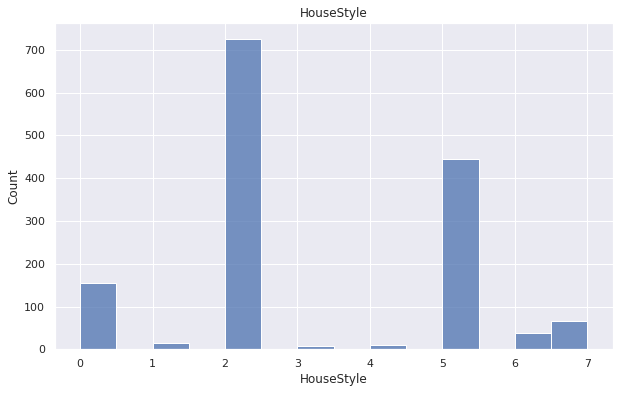

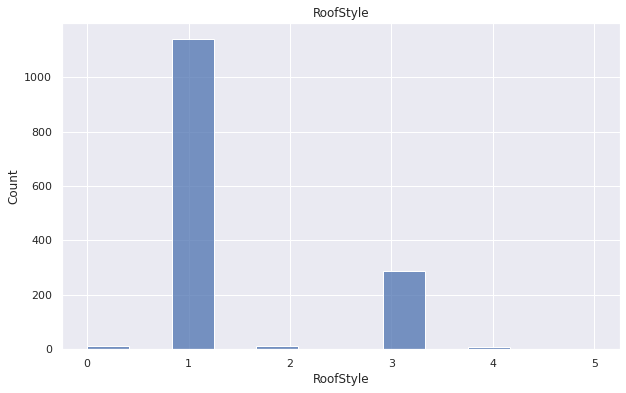

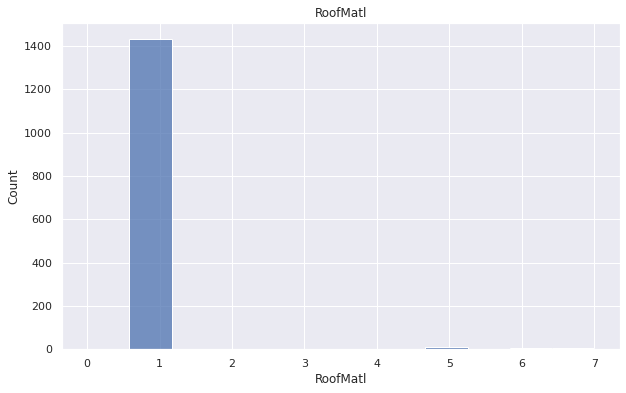

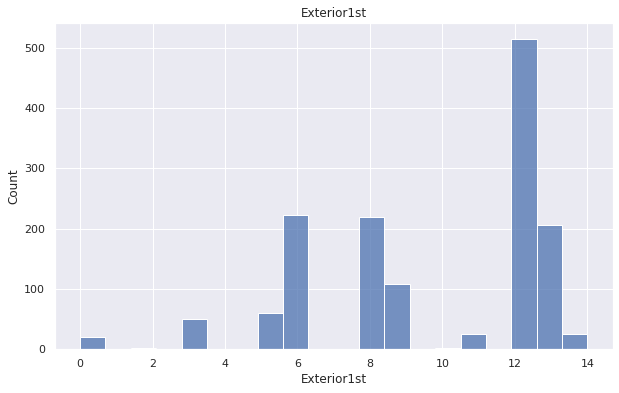

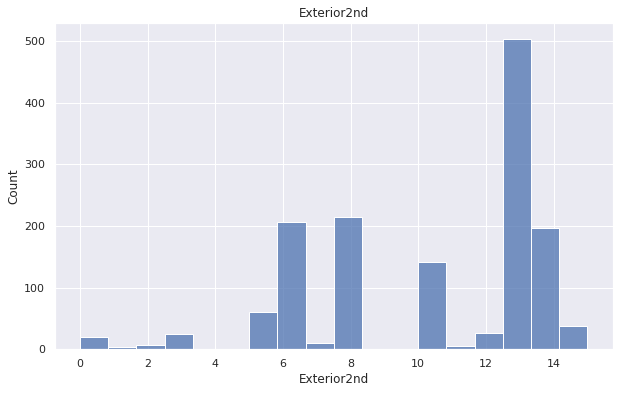

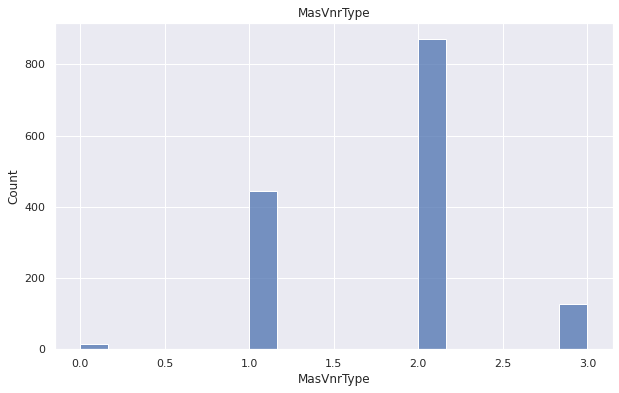

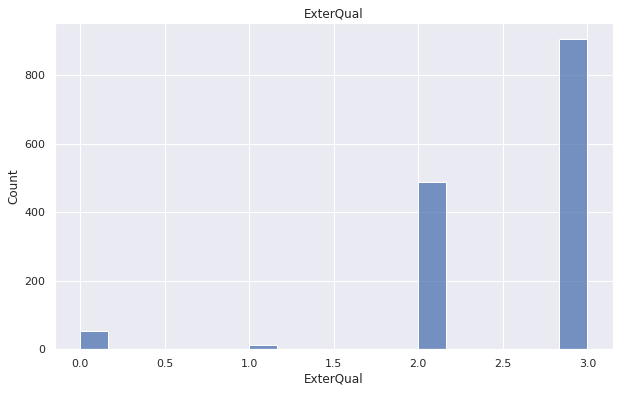

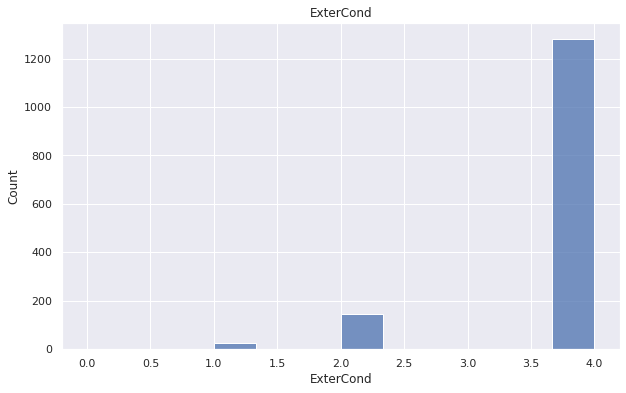

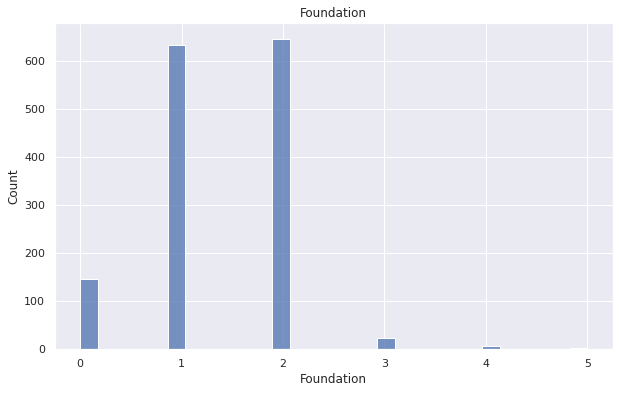

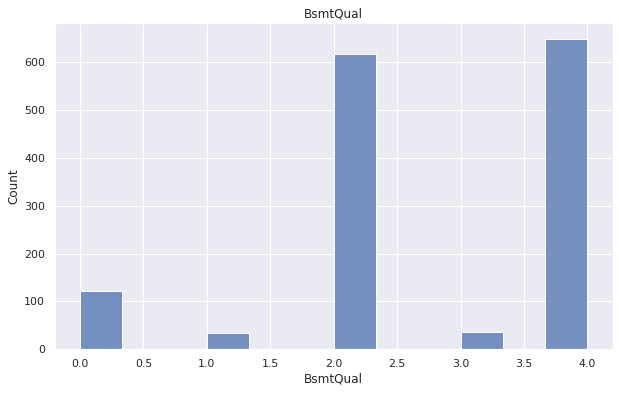

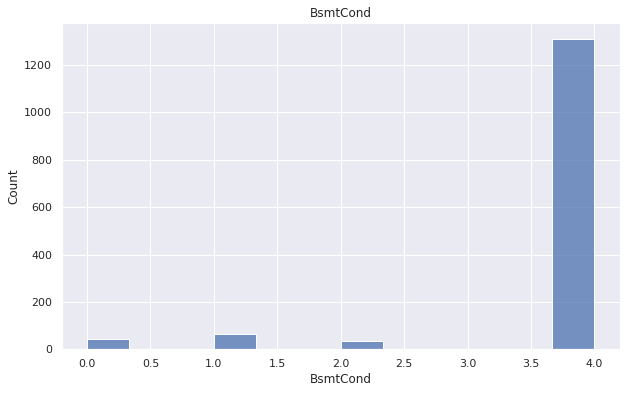

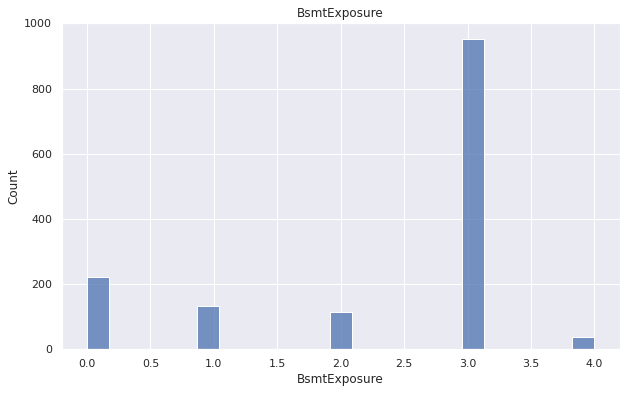

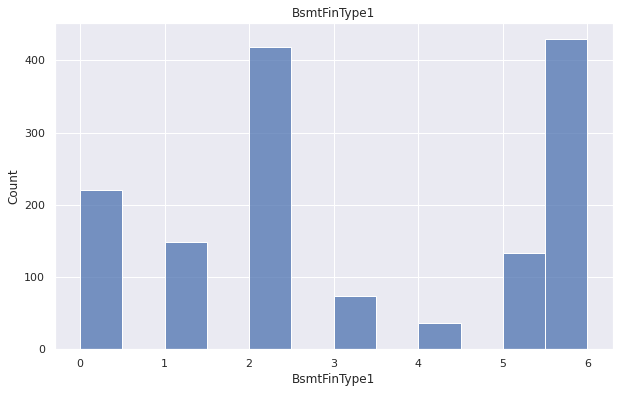

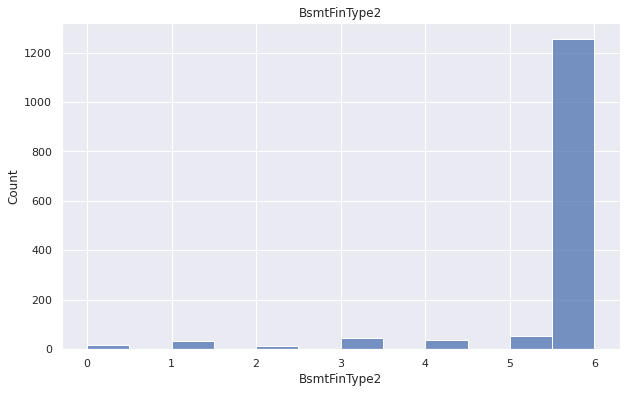

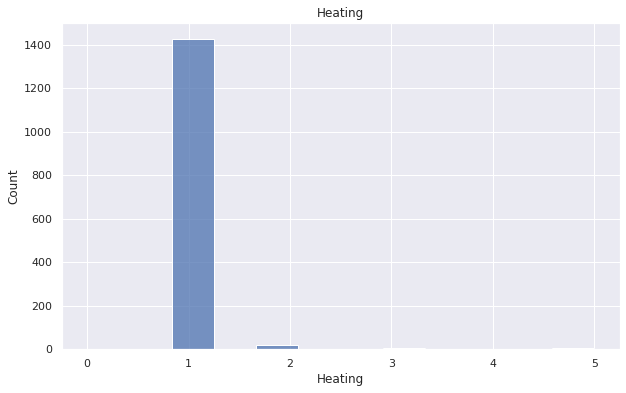

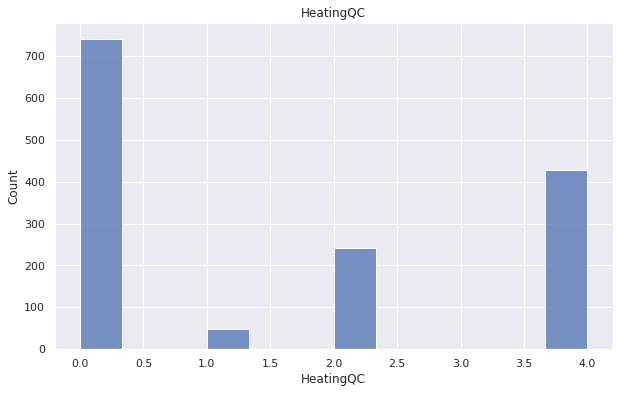

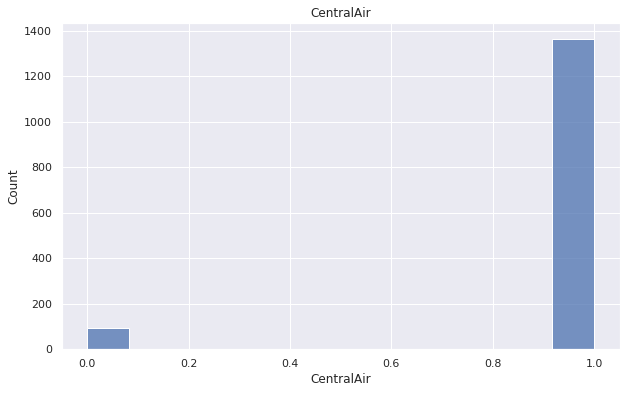

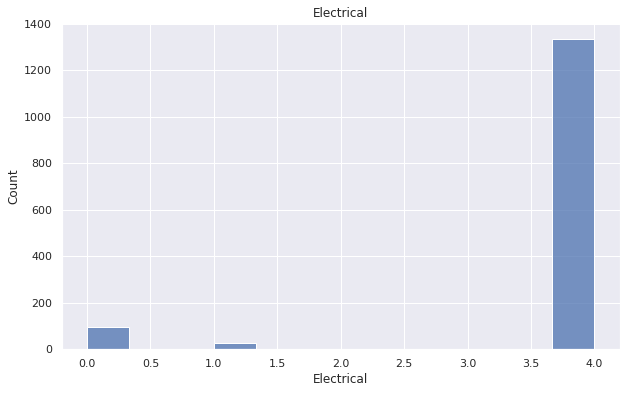

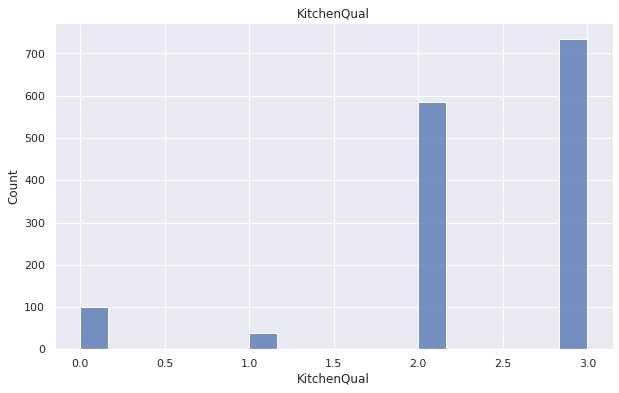

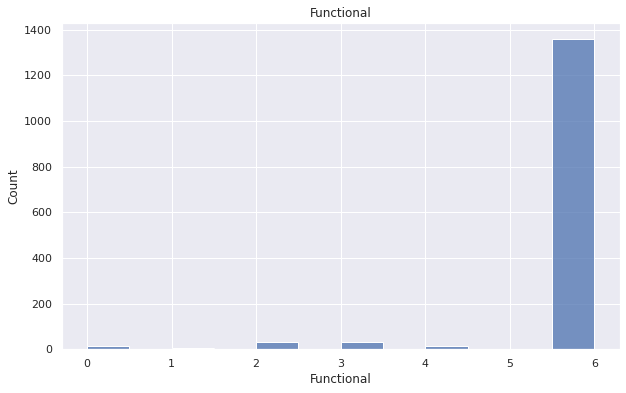

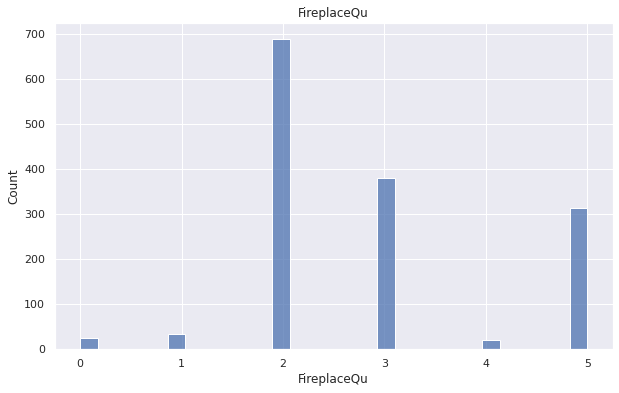

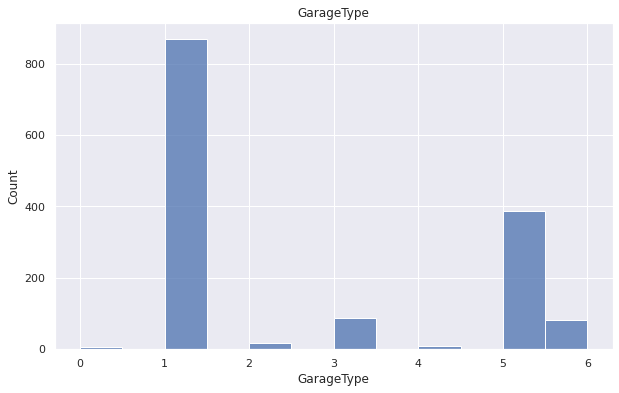

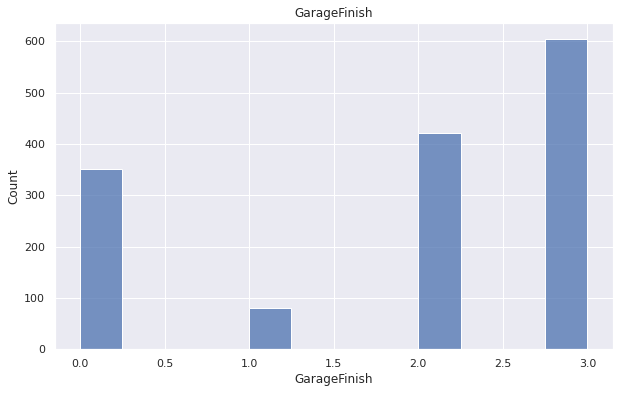

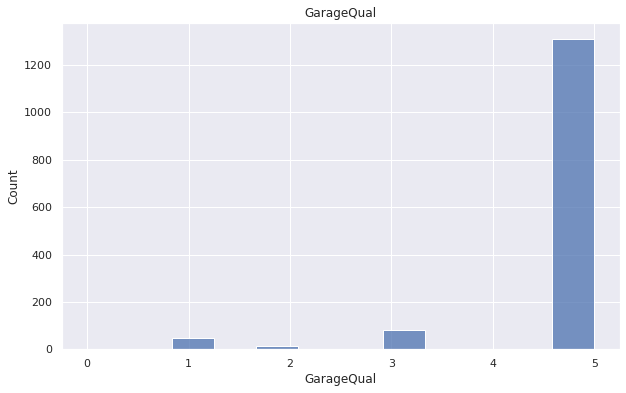

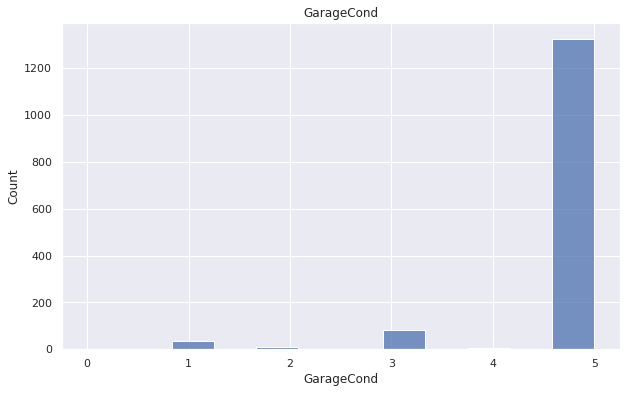

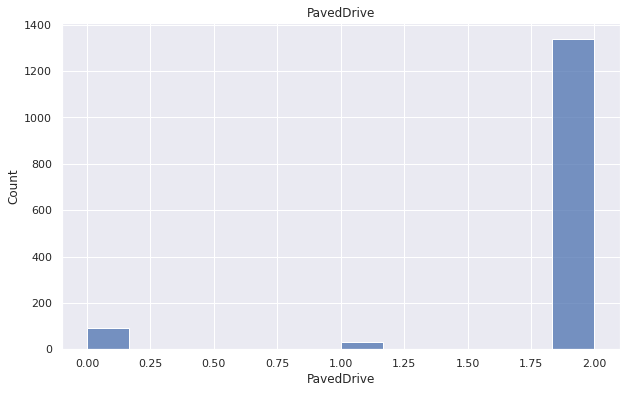

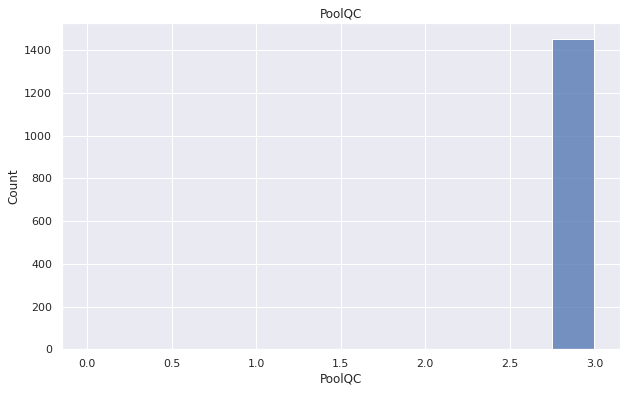

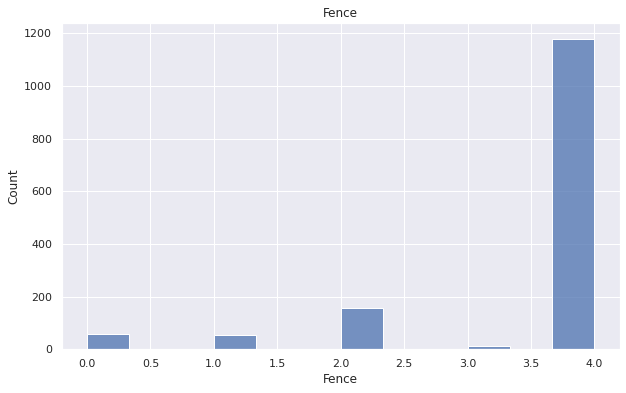

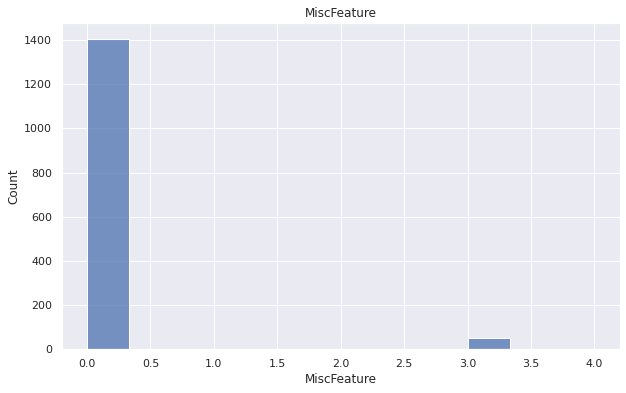

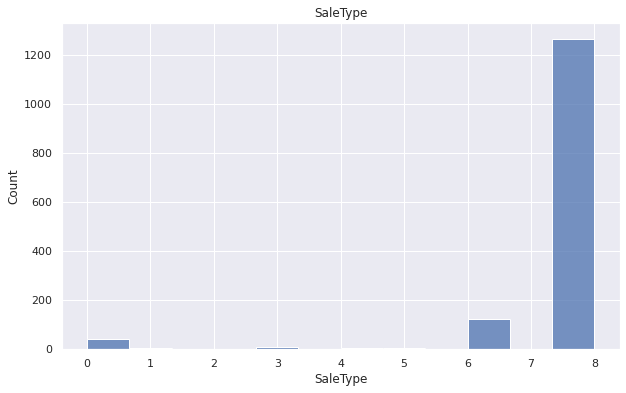

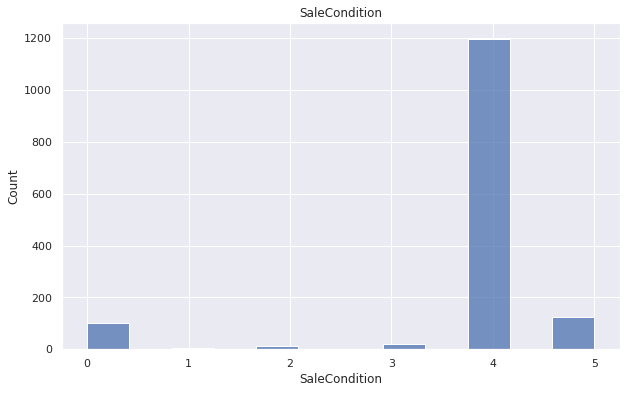

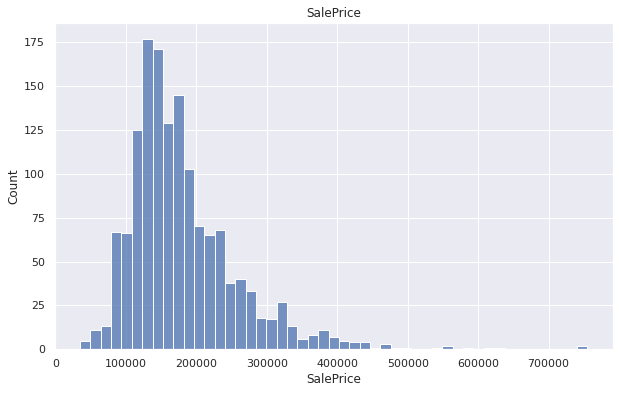

In [24]:
# histogram plot(for checking of skew,gaussian distribution)
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.histplot(train_viz[col])
    plt.title(col)
    plt.show()

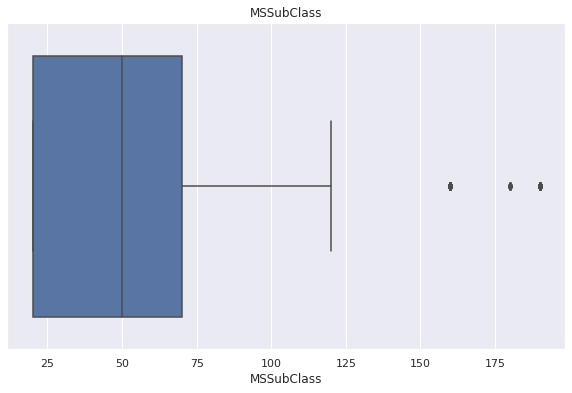

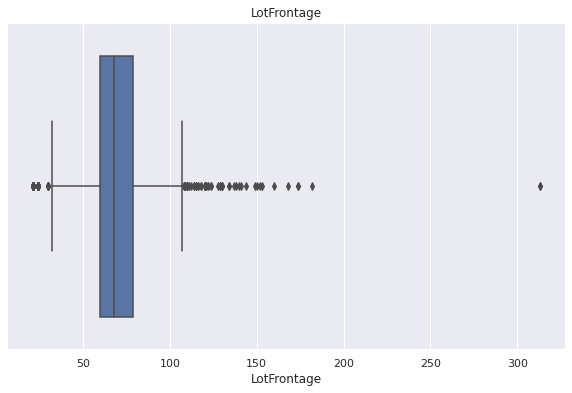

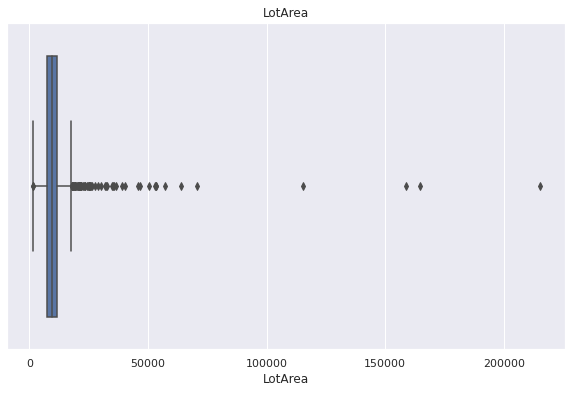

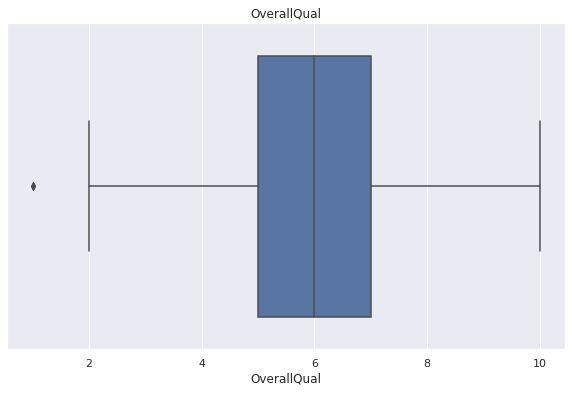

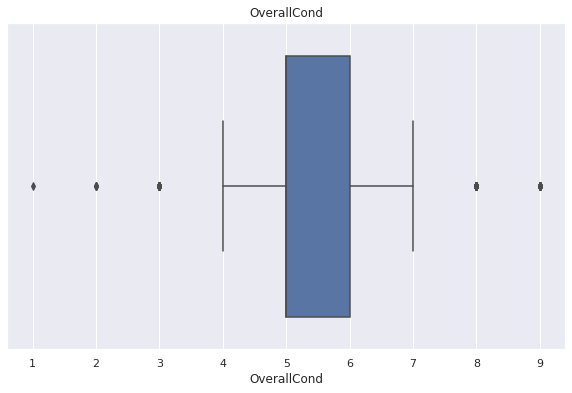

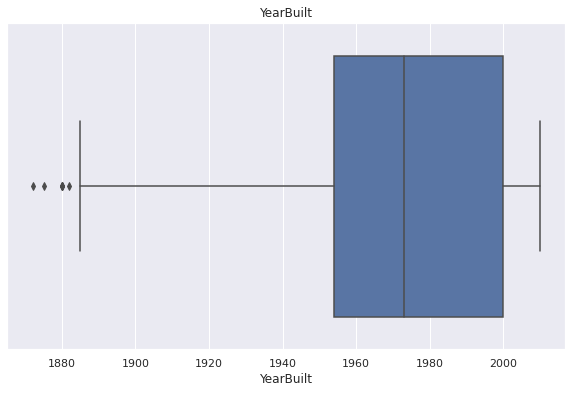

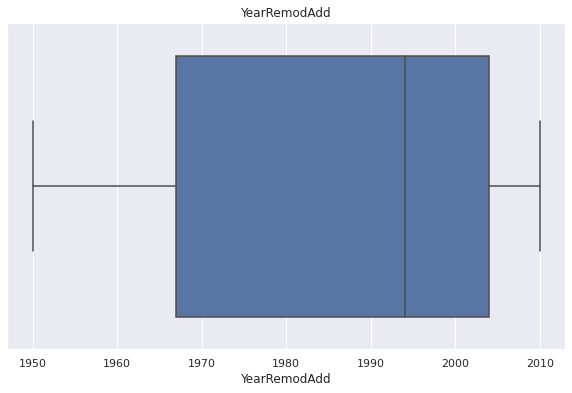

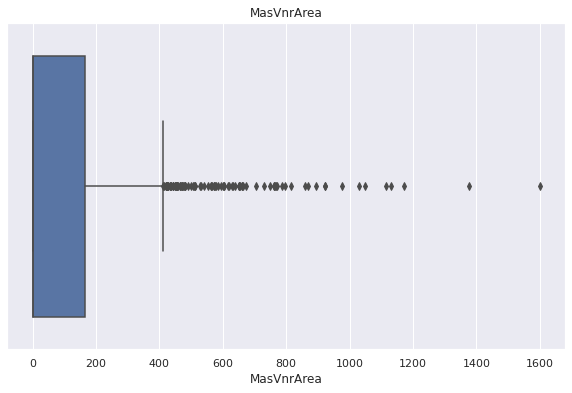

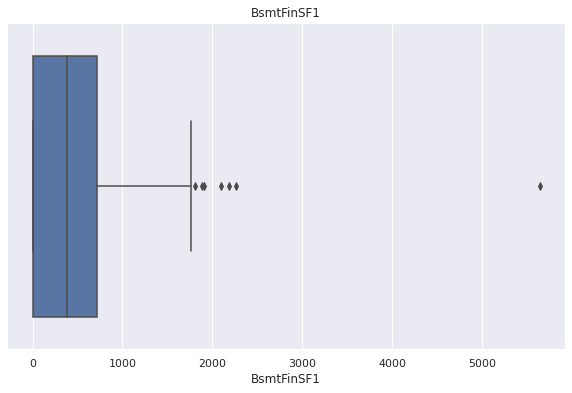

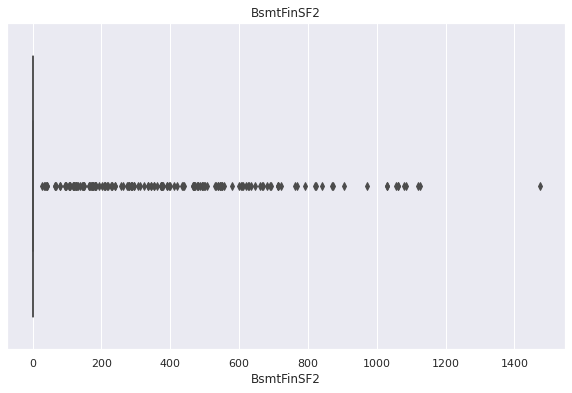

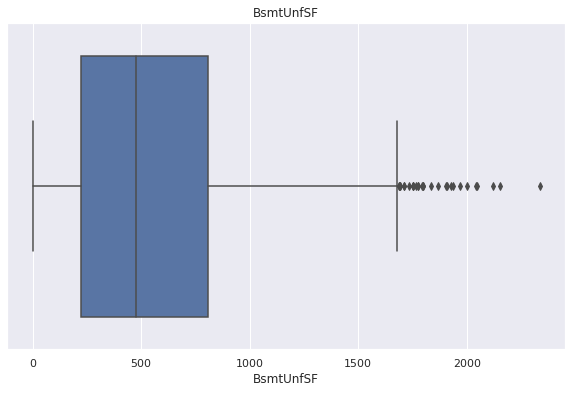

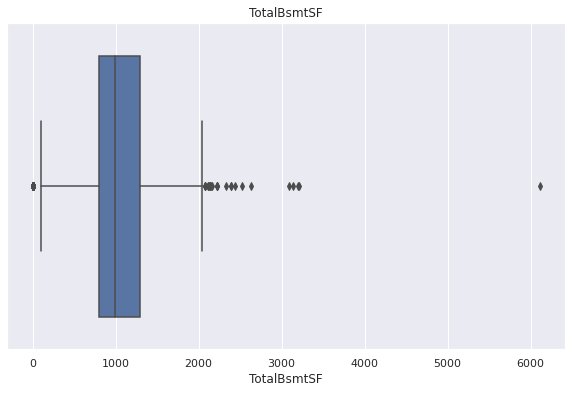

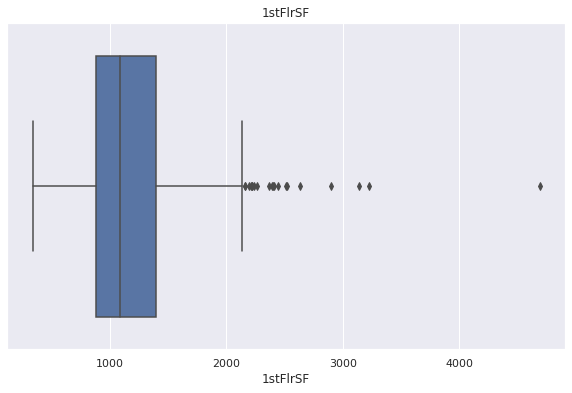

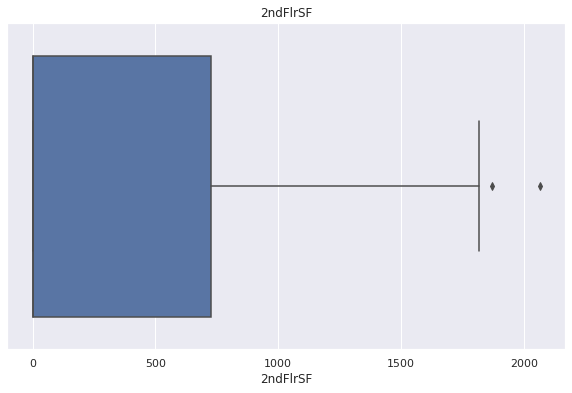

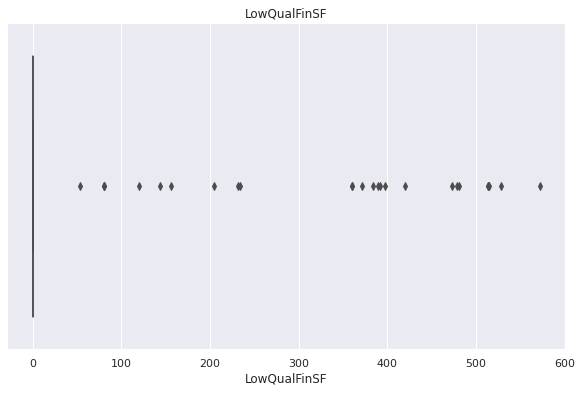

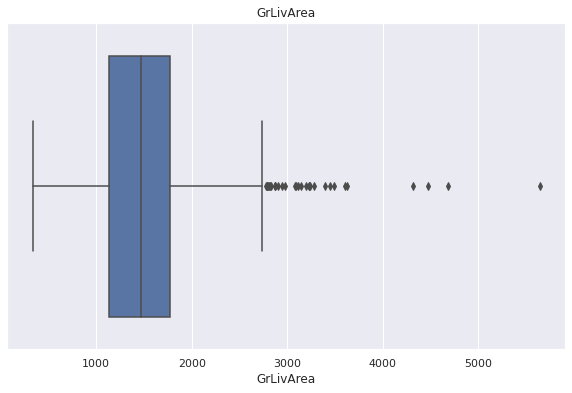

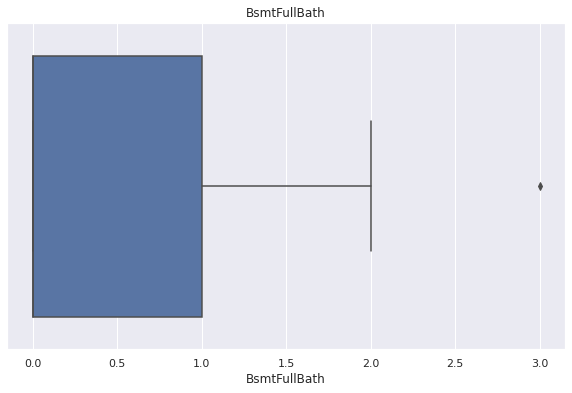

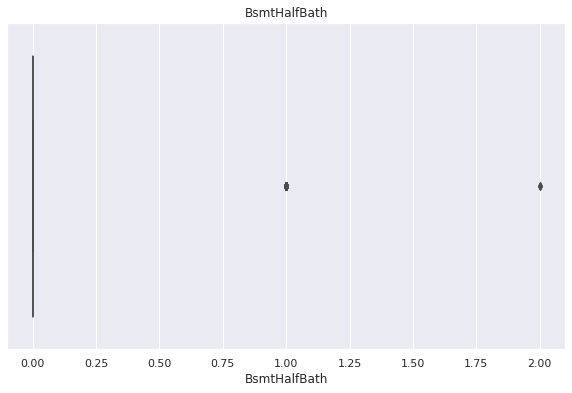

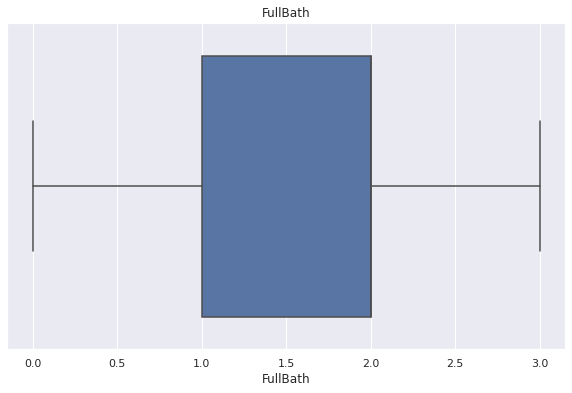

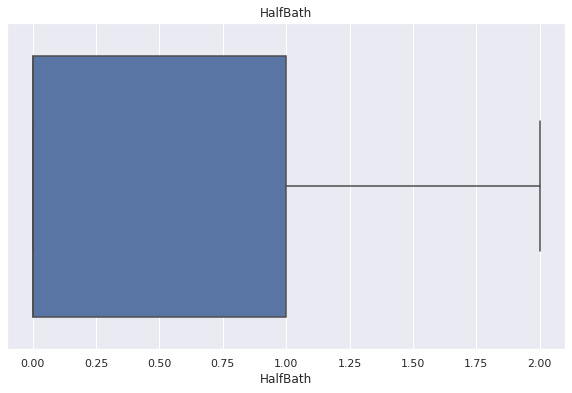

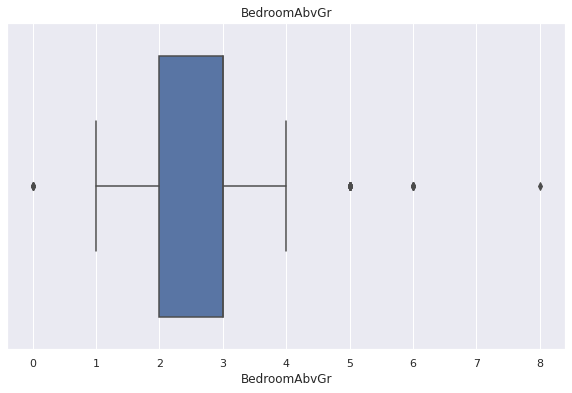

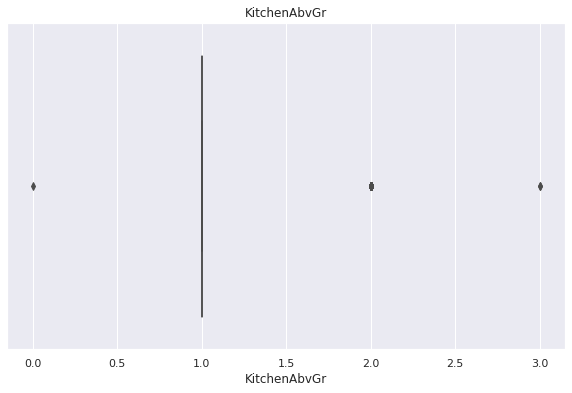

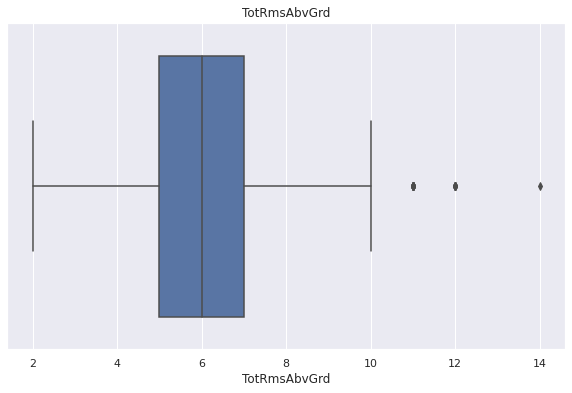

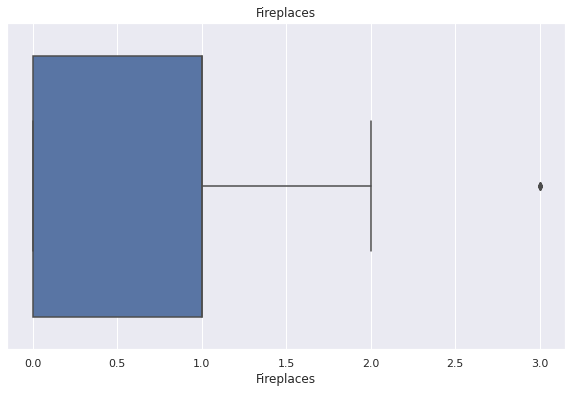

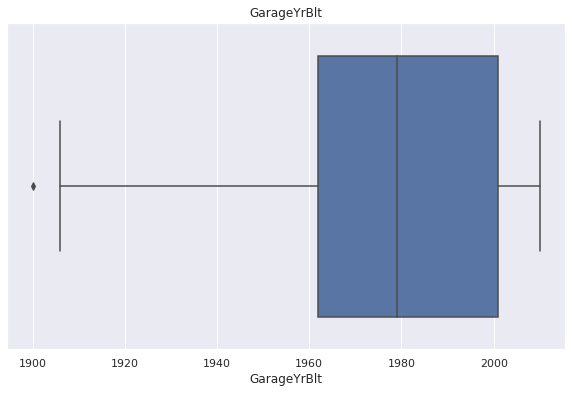

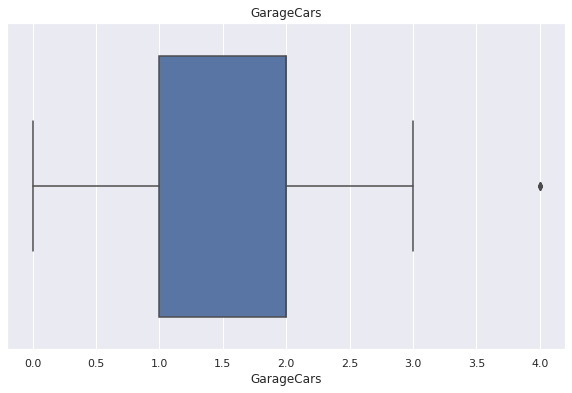

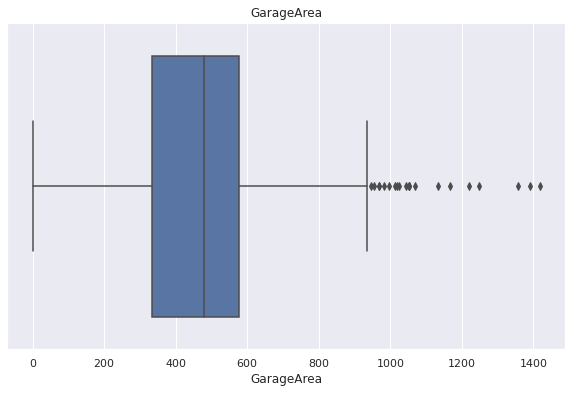

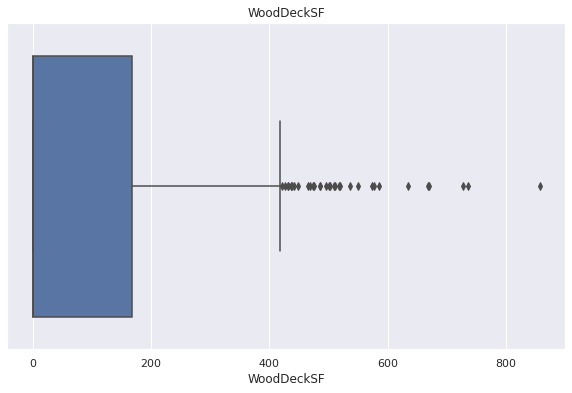

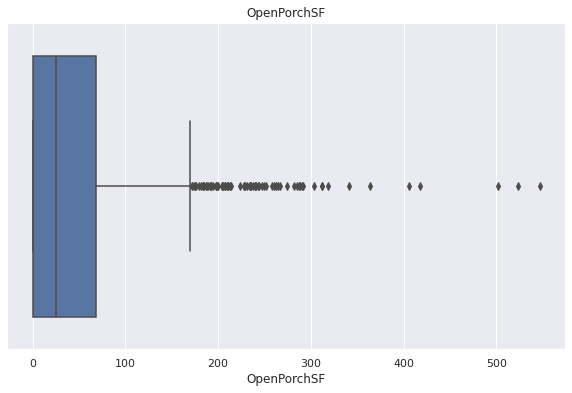

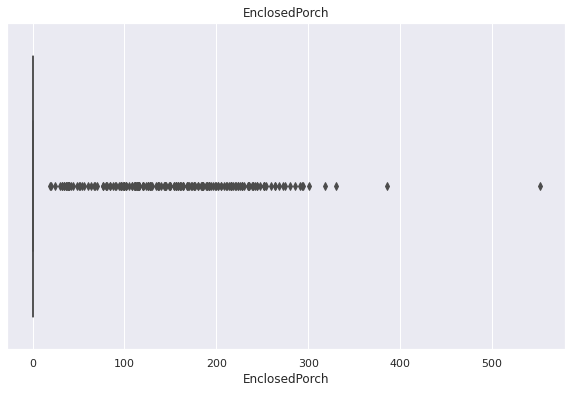

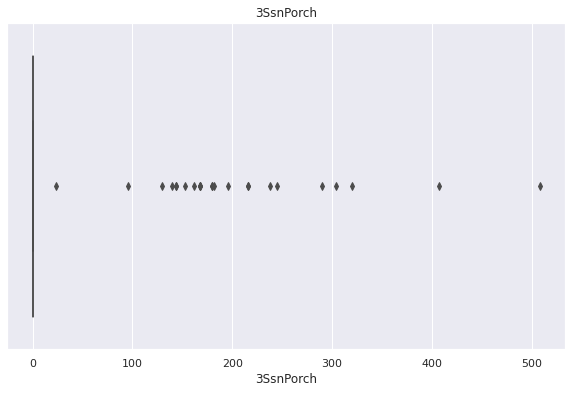

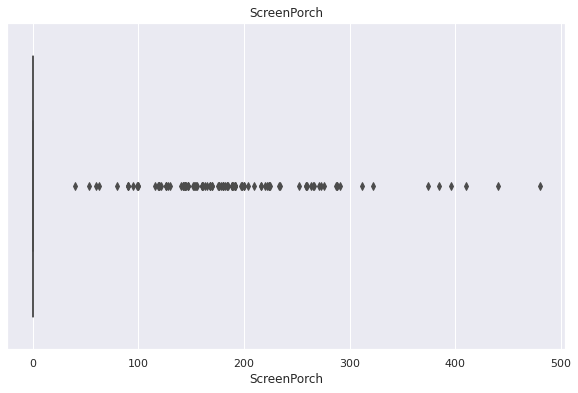

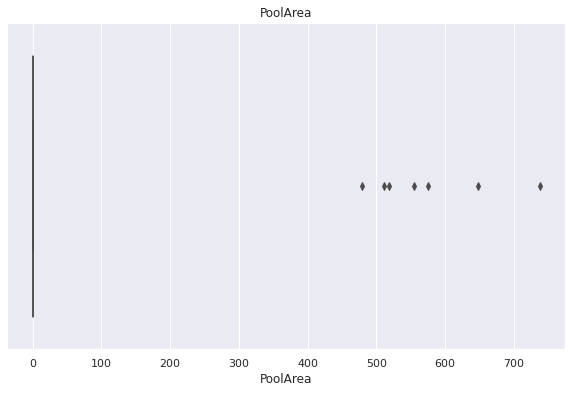

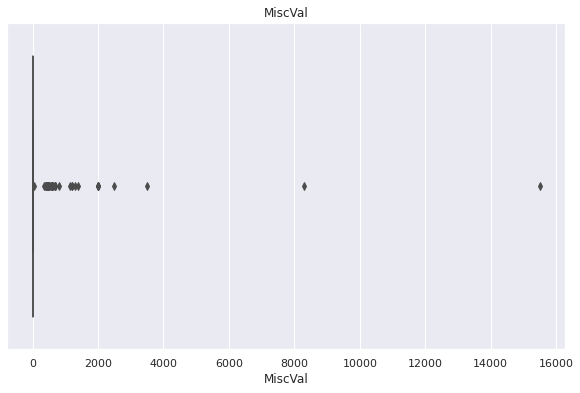

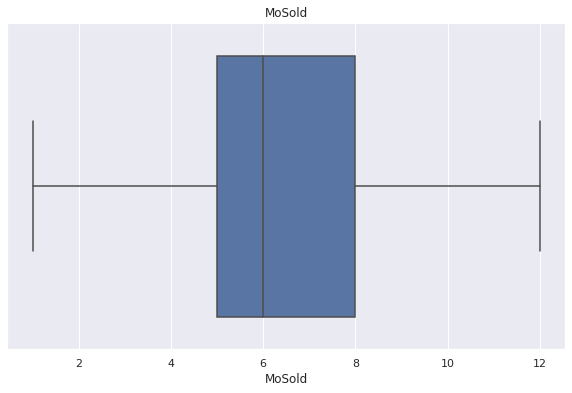

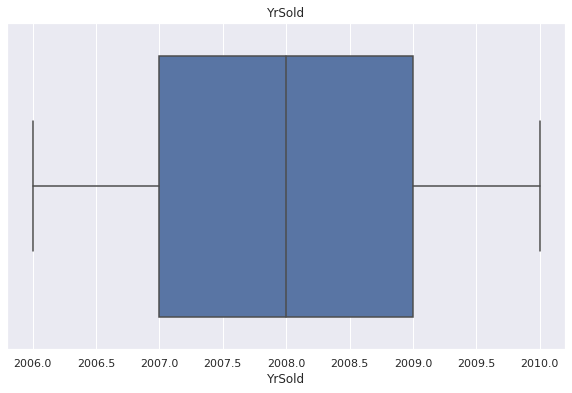

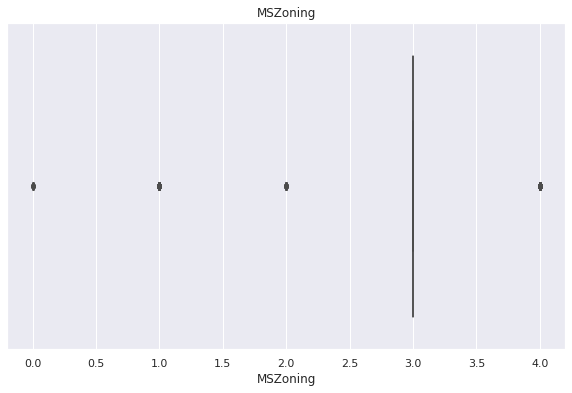

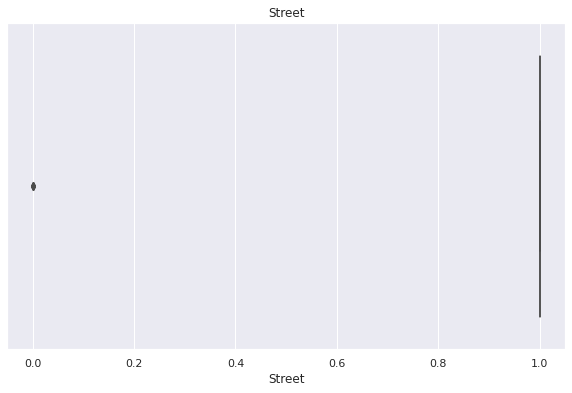

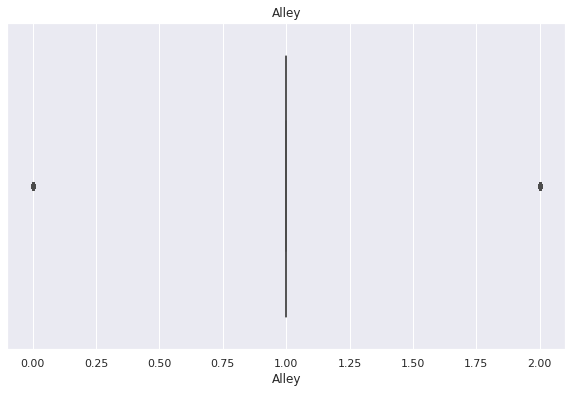

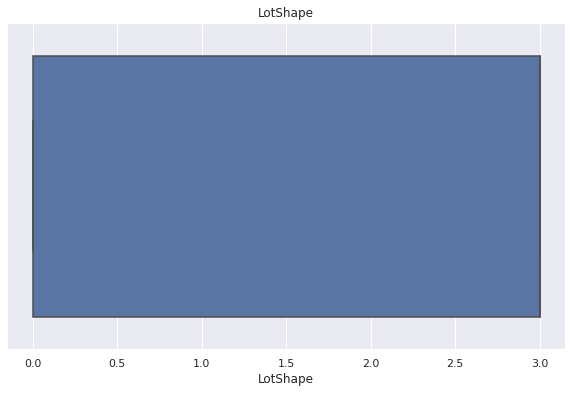

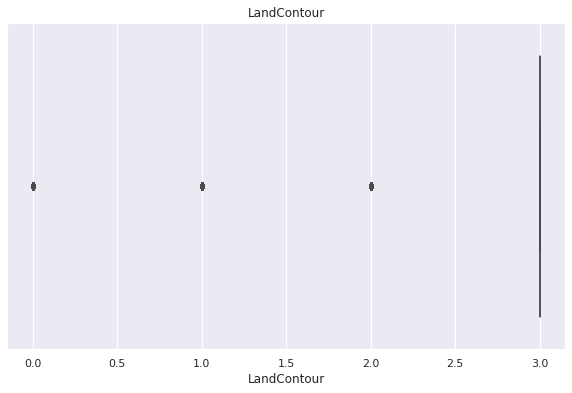

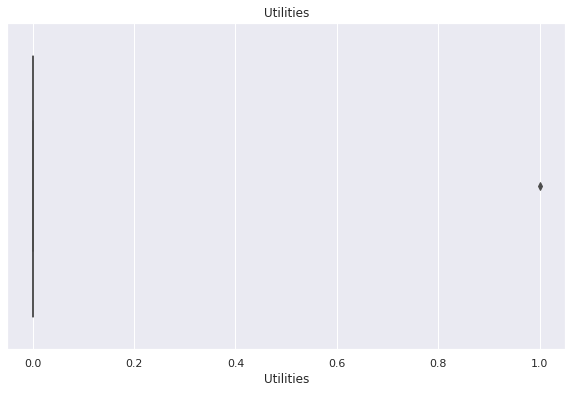

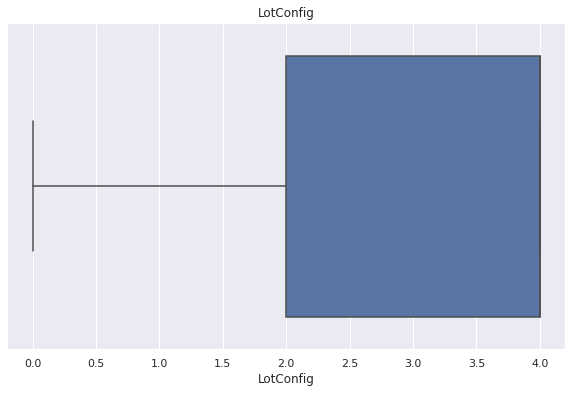

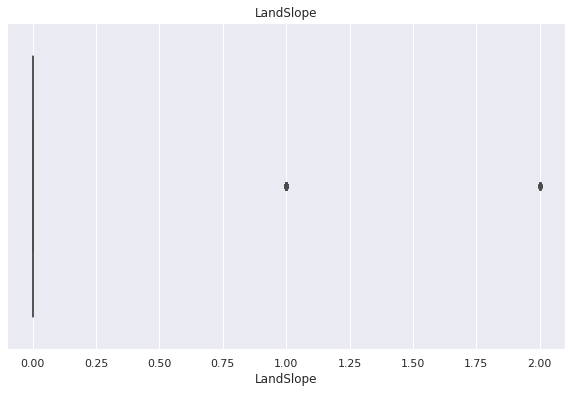

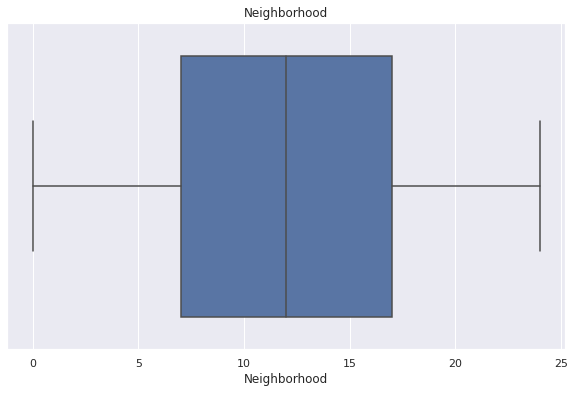

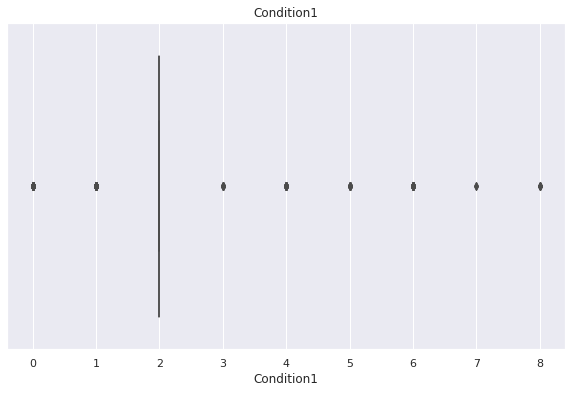

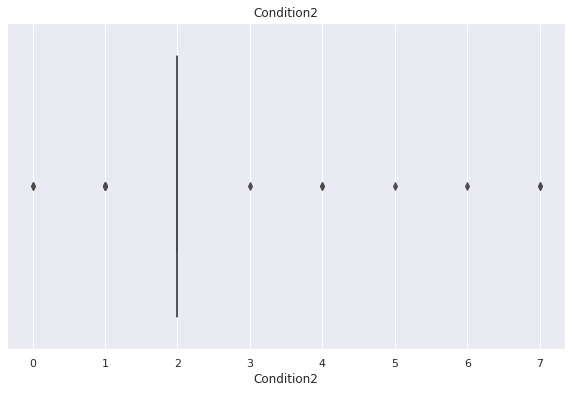

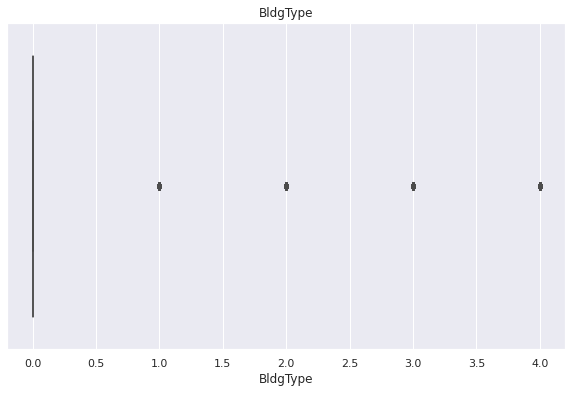

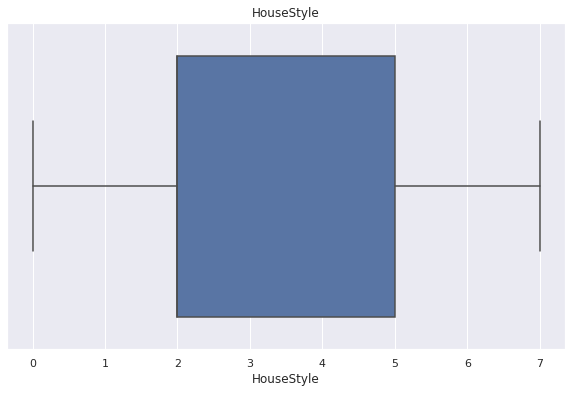

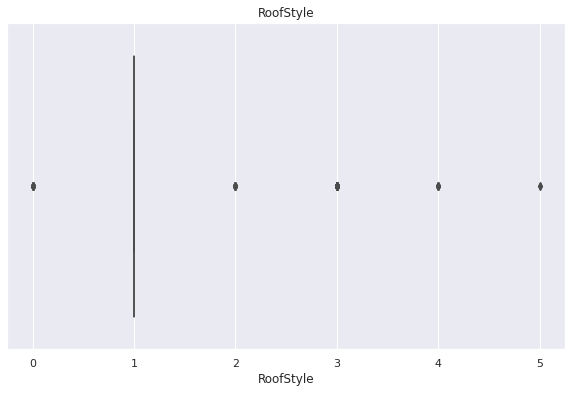

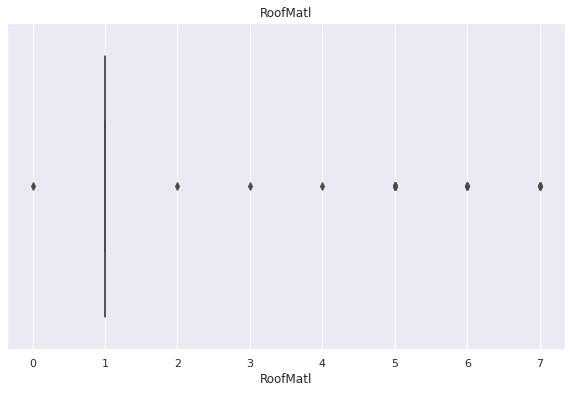

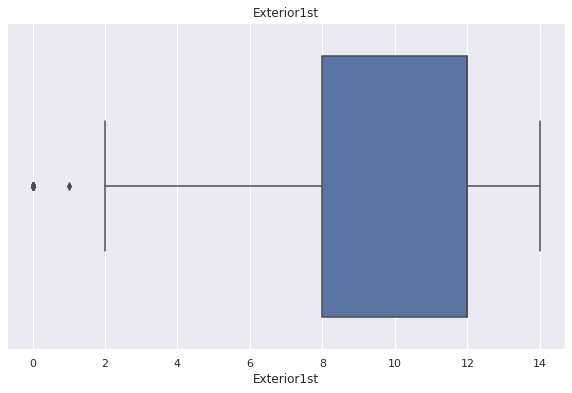

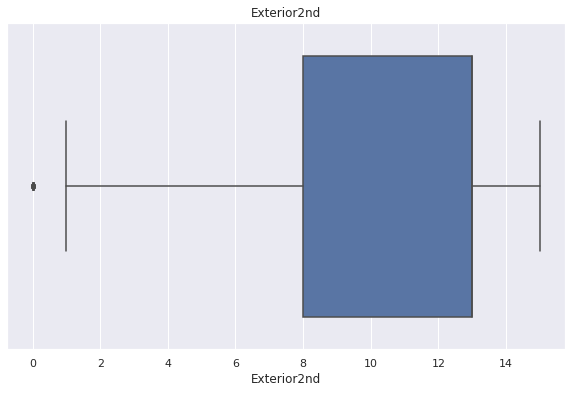

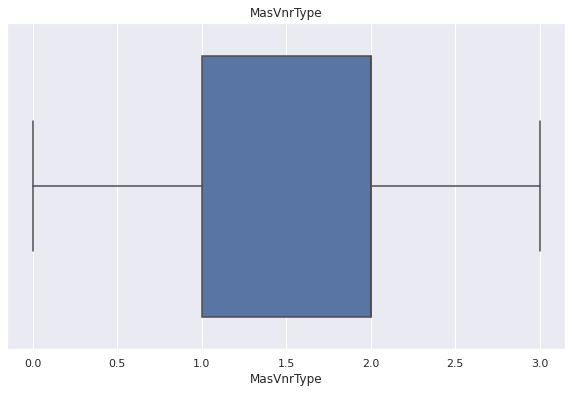

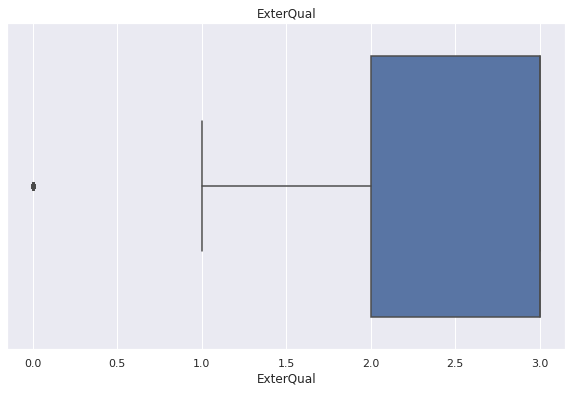

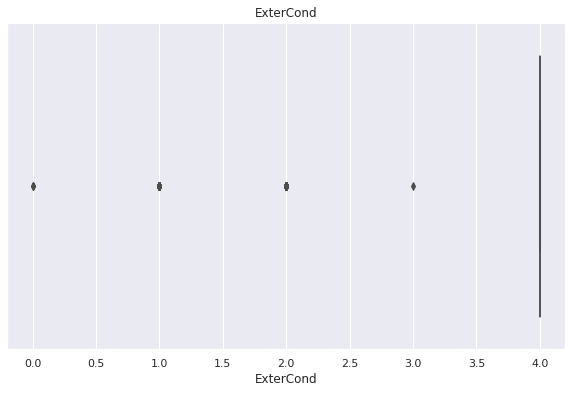

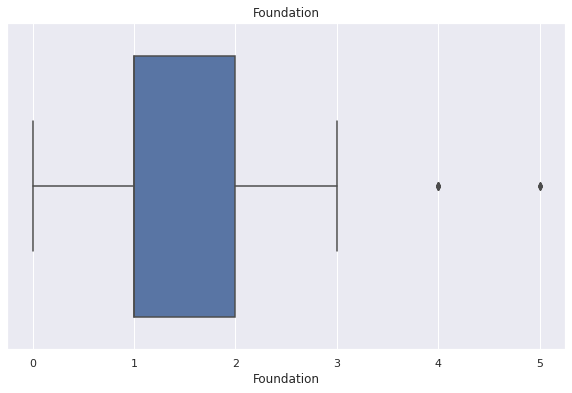

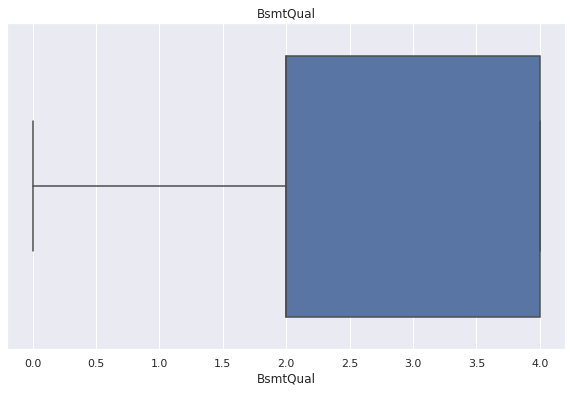

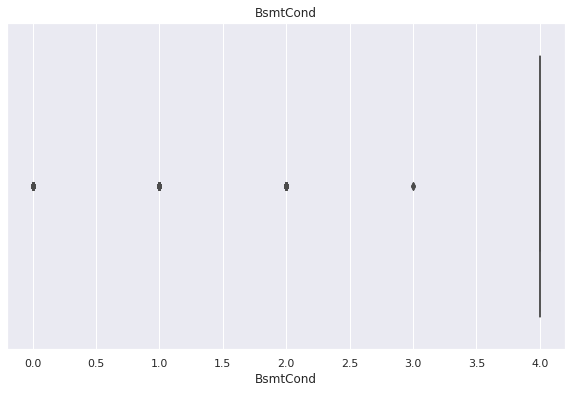

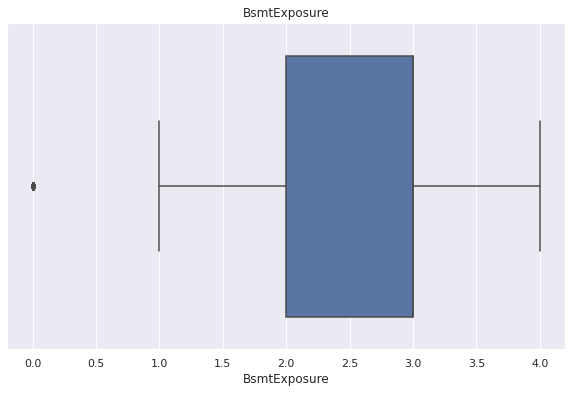

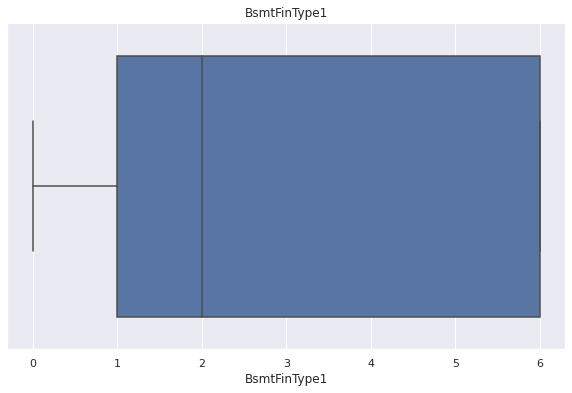

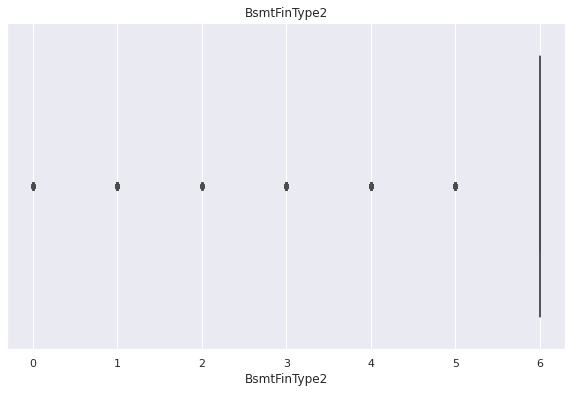

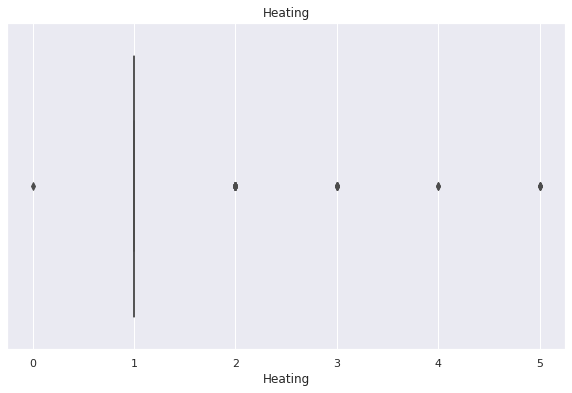

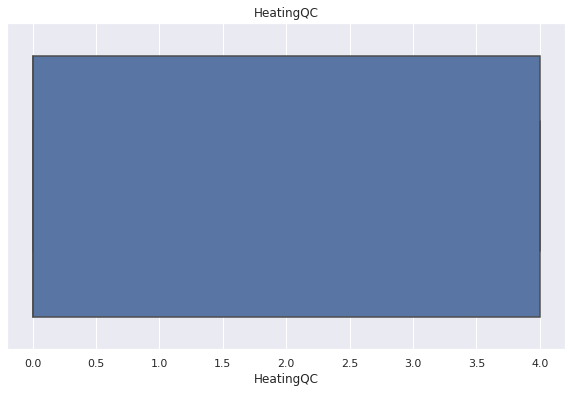

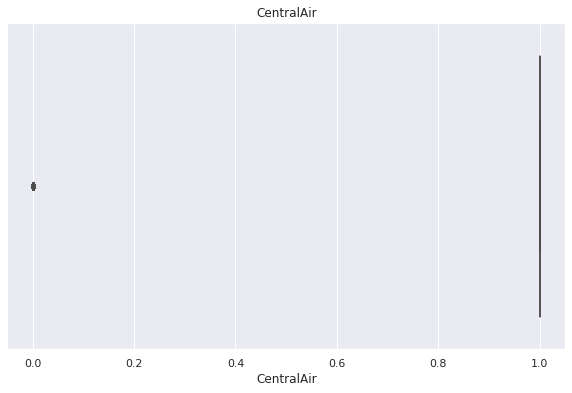

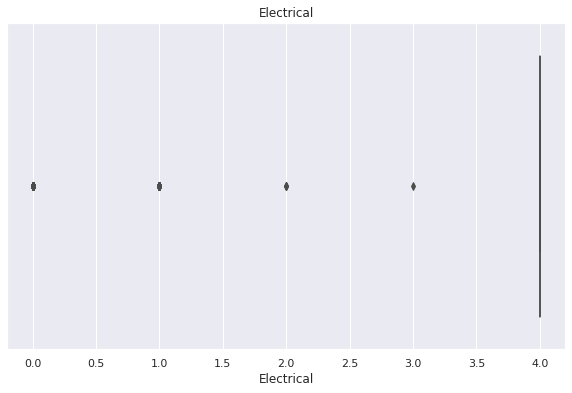

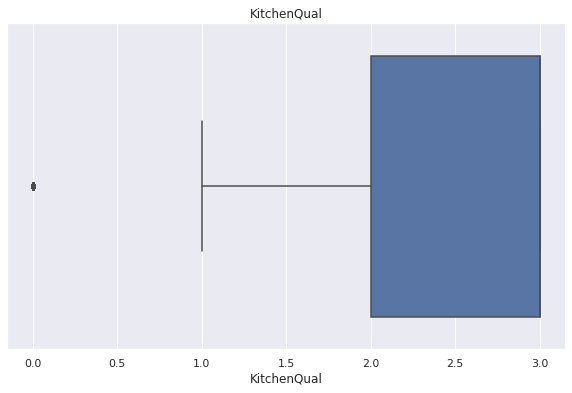

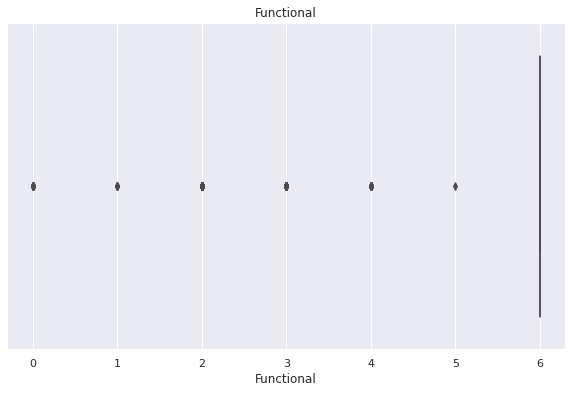

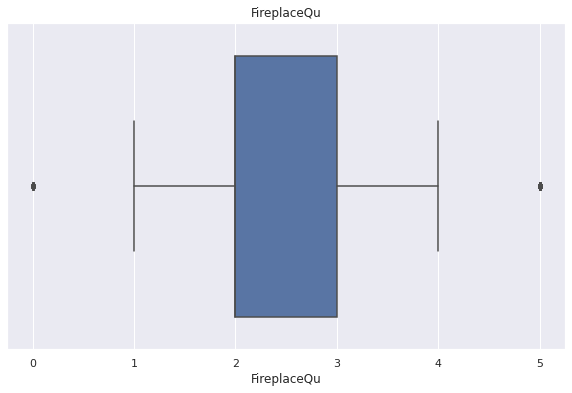

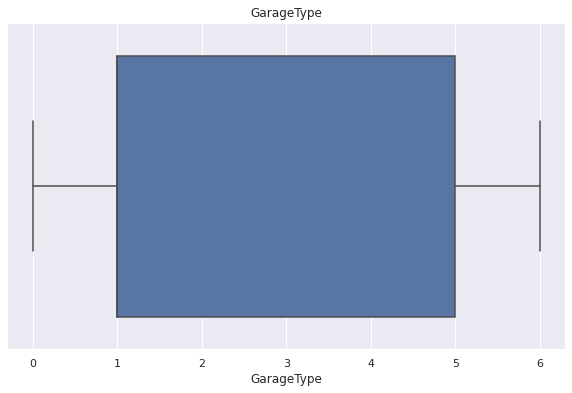

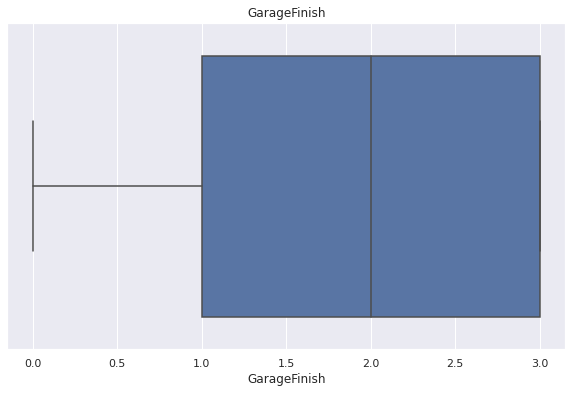

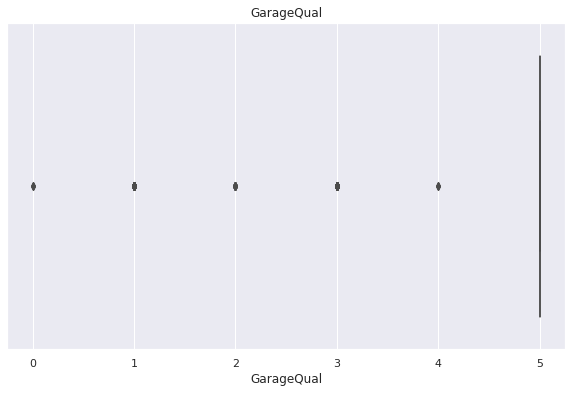

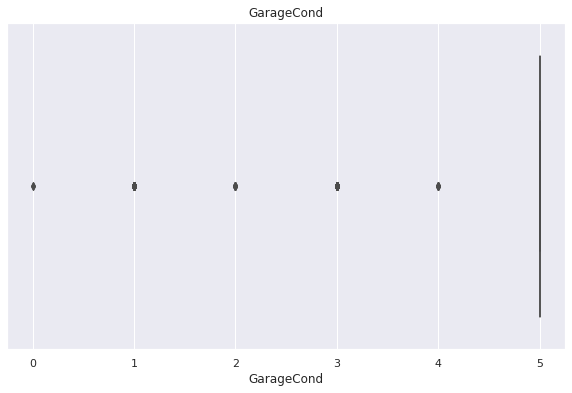

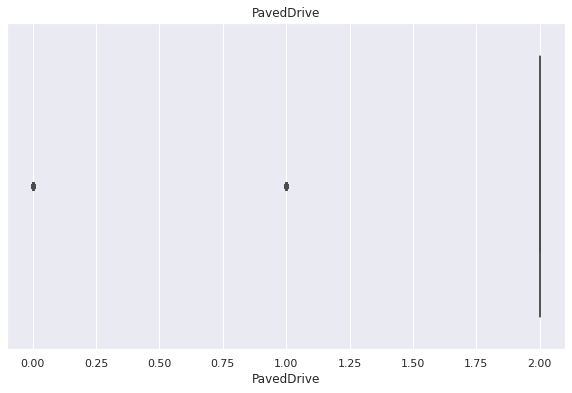

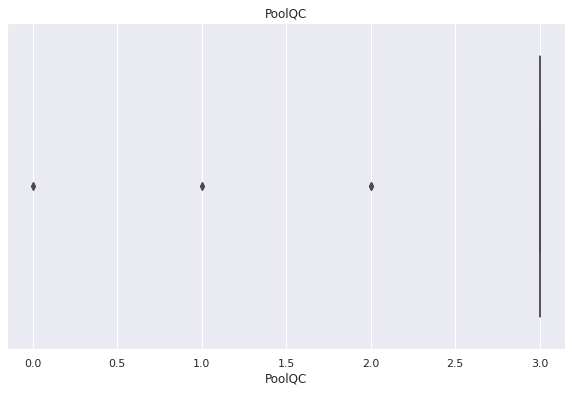

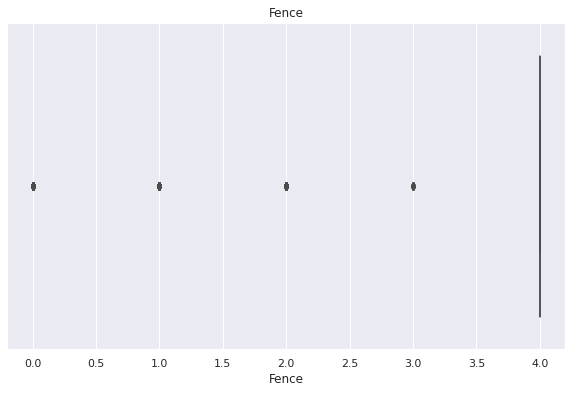

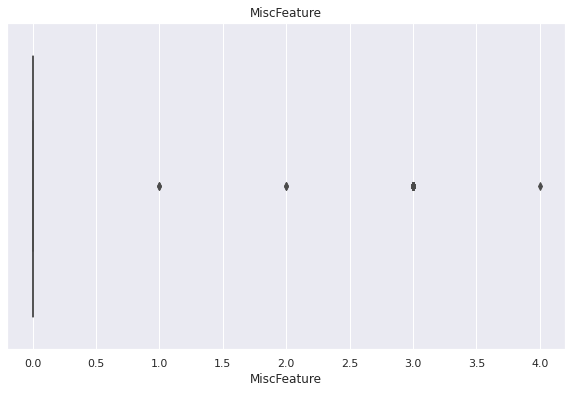

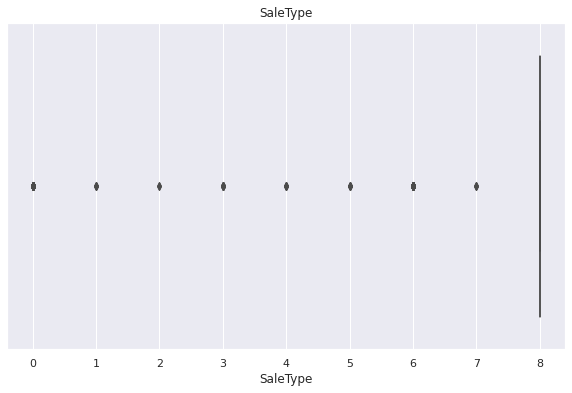

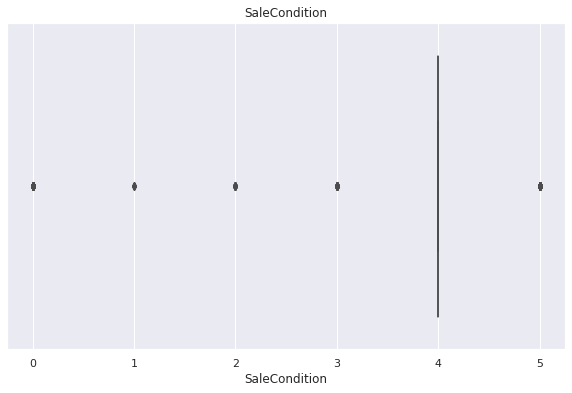

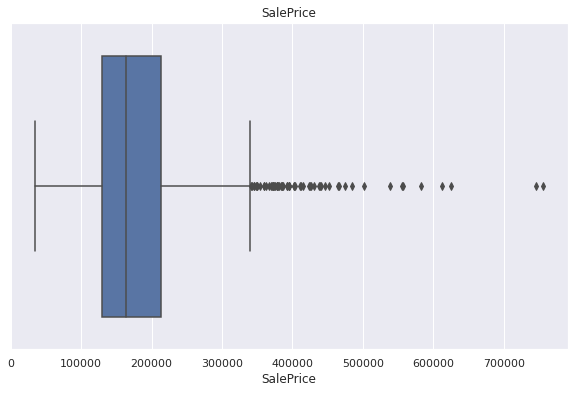

In [25]:
#Boxplot for checking of outliers
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.boxplot(train_viz[col])
    plt.title(col)
    plt.show()

### low variance

In [26]:
var_thresh=VarianceThreshold(threshold=1)
var_thresh.fit(train)

VarianceThreshold(threshold=1)

In [27]:
constant_columns=[column for column in train.columns
                 if column not in train.columns[var_thresh.get_support()]]
print(len(constant_columns))

32


In [28]:
# dropping of low variance less than= 1 
train.drop(columns=constant_columns,axis=1,inplace=True)
test.drop(columns=constant_columns,axis=1,inplace=True)
print("shape of train data after dropping lo variance :",train.shape)
print("shape of test data after dropping lo variance :",test.shape)

shape of train data after dropping lo variance : (1460, 48)
shape of test data after dropping lo variance : (1459, 47)


In [29]:
### check multicolinearity 
def correlation (train,threshold):
    col_corr=set() # names of correlated columns
    corr_matrix=train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

corr=correlation(train,0.85)
len(set(corr))

1

In [30]:
#variable should be deleted(highly correlated)
print(corr)

{'Exterior2nd'}


In [31]:
#drooping of column(Exterior2nd) from train and test data
train.drop(columns=corr,axis=1,inplace=True)
test.drop(columns=corr,axis=1,inplace=True)

In [32]:
# VIF to check for highly correlated variable
#VIF of 1 show not correlation
#VIF of 2-4 show moderately correlated
#VIF of 5 means higly correlated(variable should be deleted)

df=train.select_dtypes(exclude="object")
def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "SalePrice"
print(get_VIF(df,target))

const            2.425e+06
MSSubClass       4.879e+00
LotFrontage      1.673e+00
LotArea          1.285e+00
OverallQual      3.232e+00
OverallCond      1.692e+00
YearBuilt        5.877e+00
YearRemodAdd     2.623e+00
MasVnrArea       1.405e+00
BsmtFinSF1             inf
BsmtFinSF2             inf
BsmtUnfSF              inf
TotalBsmtSF            inf
1stFlrSF               inf
2ndFlrSF               inf
LowQualFinSF           inf
GrLivArea              inf
TotRmsAbvGrd     3.642e+00
GarageYrBlt      3.562e+00
GarageArea       2.149e+00
WoodDeckSF       1.271e+00
OpenPorchSF      1.231e+00
EnclosedPorch    1.295e+00
3SsnPorch        1.033e+00
ScreenPorch      1.106e+00
PoolArea         1.149e+00
MiscVal          1.024e+00
MoSold           1.053e+00
YrSold           1.056e+00
LotShape         1.215e+00
LotConfig        1.110e+00
Neighborhood     1.134e+00
BldgType         4.429e+00
HouseStyle       2.145e+00
Exterior1st      1.208e+00
BsmtQual         2.207e+00
BsmtExposure     1.438e+00
B

In [33]:
#drooping of column(YearBuilt) from train and test data due to correlated values of vif higher than 5
train.drop(columns='YearBuilt',axis=1,inplace=True)
test.drop(columns='YearBuilt',axis=1,inplace=True)

In [34]:
# VIF to check for any highly corrrelated variable
#VIF of 1 show not correlation
#VIF of 2-4 show moderately correlated
#VIF of 5 means higly correlated(variable should be deleted)

df=train.select_dtypes(exclude="object")
def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "SalePrice"
print(get_VIF(df,target))

const            2.413e+06
MSSubClass       4.658e+00
LotFrontage      1.671e+00
LotArea          1.285e+00
OverallQual      3.121e+00
OverallCond      1.479e+00
YearRemodAdd     2.513e+00
MasVnrArea       1.399e+00
BsmtFinSF1             inf
BsmtFinSF2             inf
BsmtUnfSF              inf
TotalBsmtSF            inf
1stFlrSF               inf
2ndFlrSF               inf
LowQualFinSF           inf
GrLivArea              inf
TotRmsAbvGrd     3.641e+00
GarageYrBlt      2.870e+00
GarageArea       2.149e+00
WoodDeckSF       1.270e+00
OpenPorchSF      1.228e+00
EnclosedPorch    1.190e+00
3SsnPorch        1.033e+00
ScreenPorch      1.101e+00
PoolArea         1.148e+00
MiscVal          1.024e+00
MoSold           1.053e+00
YrSold           1.054e+00
LotShape         1.207e+00
LotConfig        1.109e+00
Neighborhood     1.133e+00
BldgType         4.228e+00
HouseStyle       2.038e+00
Exterior1st      1.198e+00
BsmtQual         2.169e+00
BsmtExposure     1.438e+00
BsmtFinType1     1.848e+00
B

## Transformation

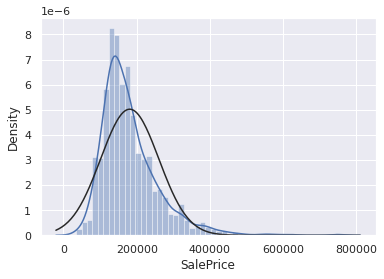

In [35]:
sns.distplot(train['SalePrice'],fit=norm);


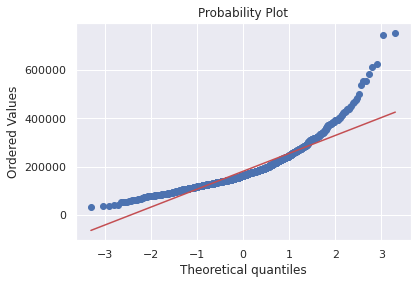

In [36]:
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

### Log Transformation of the target variable

In [37]:
train['SalePrice']=np.log1p(train["SalePrice"])

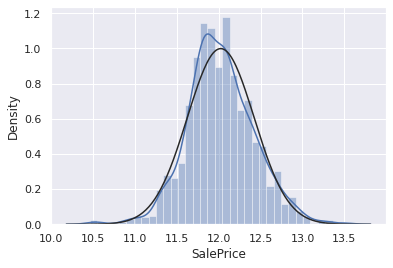

In [38]:
sns.distplot(train['SalePrice'],fit=norm);

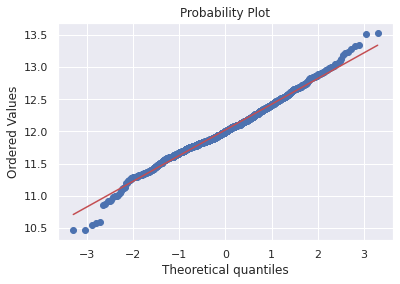

In [39]:
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

### Outliers

In [40]:
#removal of outlier
from scipy import stats
import numpy as np
train_out=train.copy()
print("shape of train data before outliers :",train_out.shape)
z=np.abs(stats.zscore(train))
train=train[(z<3).all(axis=1)]



print("shape of train data after outlier:",train.shape)

shape of train data before outliers : (1460, 46)
shape of train data after outlier: (918, 46)


### Feature Selection

In [41]:
df=train.copy()
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

In [42]:
mutual_info=mutual_info_regression(x,y)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)*100

OverallQual      5.996e+01
Neighborhood     5.176e+01
GrLivArea        5.060e+01
TotalBsmtSF      4.340e+01
GarageArea       3.971e+01
BsmtQual         3.625e+01
GarageYrBlt      3.371e+01
1stFlrSF         2.953e+01
MSSubClass       2.899e+01
GarageFinish     2.814e+01
YearRemodAdd     2.734e+01
LotFrontage      2.625e+01
2ndFlrSF         2.546e+01
GarageType       2.033e+01
TotRmsAbvGrd     1.889e+01
OpenPorchSF      1.842e+01
BsmtUnfSF        1.808e+01
FireplaceQu      1.806e+01
BsmtFinType1     1.774e+01
LotArea          1.746e+01
HeatingQC        1.653e+01
BsmtFinSF1       1.467e+01
Exterior1st      1.445e+01
OverallCond      1.429e+01
HouseStyle       1.099e+01
WoodDeckSF       9.444e+00
SaleType         9.133e+00
SaleCondition    8.857e+00
MasVnrArea       8.756e+00
BsmtExposure     8.338e+00
LotShape         5.961e+00
BldgType         3.418e+00
Fence            3.257e+00
EnclosedPorch    2.708e+00
LotConfig        2.600e+00
BsmtFinType2     2.588e+00
Electrical       2.271e+00
S

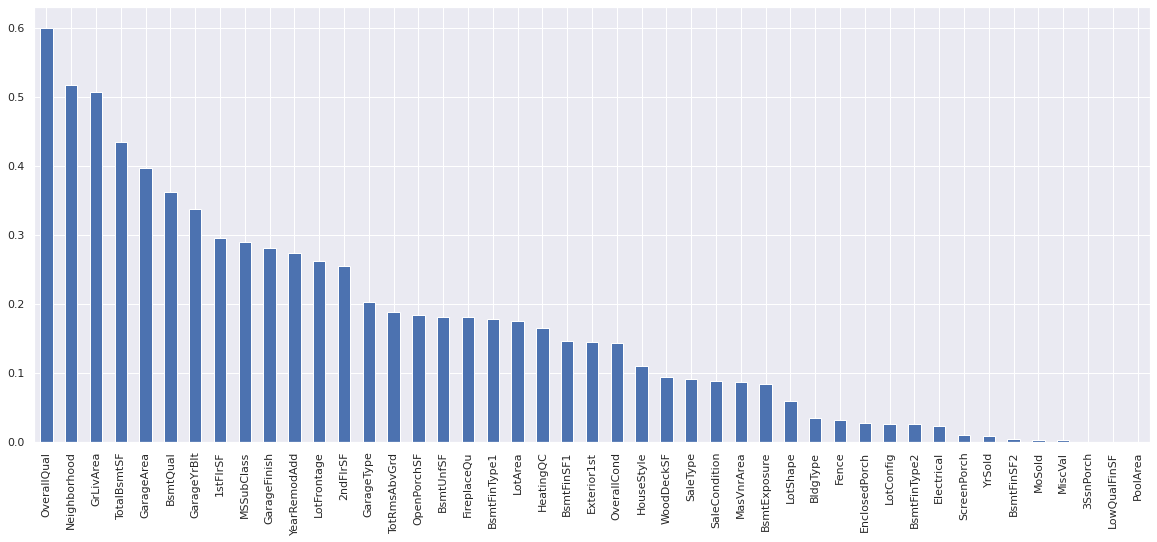

In [43]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

45


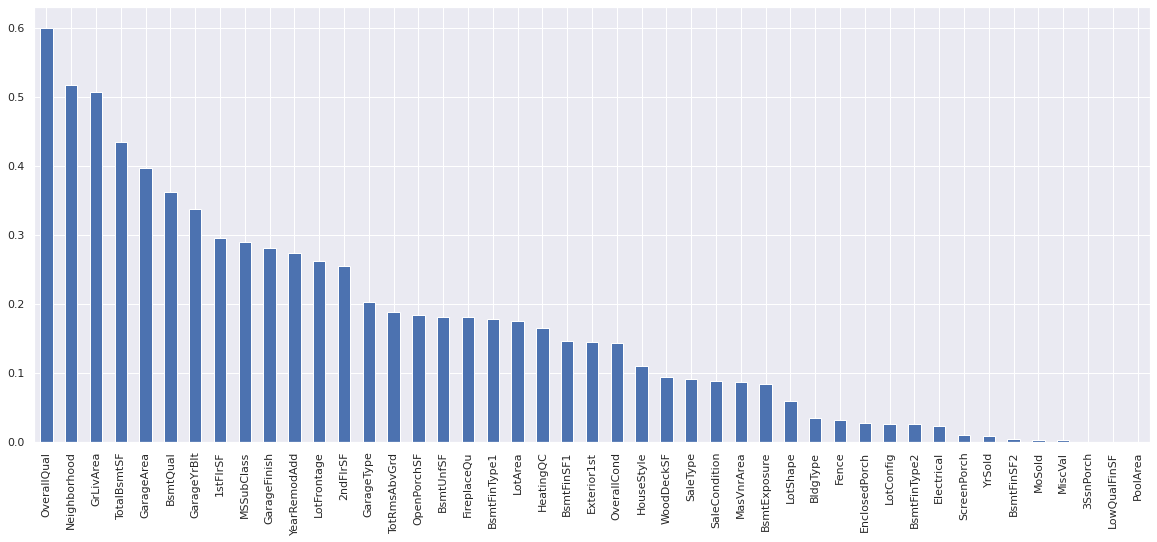

In [44]:
mutual_features=mutual_info.sort_values(ascending=False)[mutual_info.sort_values(ascending=False)!=0.000000]
mutual_features.sort_values(ascending=False).plot.bar(figsize=(20,8))
print(len(mutual_features))

In [45]:
mutual_features.index

Index(['OverallQual', 'Neighborhood', 'GrLivArea', 'TotalBsmtSF', 'GarageArea',
       'BsmtQual', 'GarageYrBlt', '1stFlrSF', 'MSSubClass', 'GarageFinish',
       'YearRemodAdd', 'LotFrontage', '2ndFlrSF', 'GarageType', 'TotRmsAbvGrd',
       'OpenPorchSF', 'BsmtUnfSF', 'FireplaceQu', 'BsmtFinType1', 'LotArea',
       'HeatingQC', 'BsmtFinSF1', 'Exterior1st', 'OverallCond', 'HouseStyle',
       'WoodDeckSF', 'SaleType', 'SaleCondition', 'MasVnrArea', 'BsmtExposure',
       'LotShape', 'BldgType', 'Fence', 'EnclosedPorch', 'LotConfig',
       'BsmtFinType2', 'Electrical', 'ScreenPorch', 'YrSold', 'BsmtFinSF2',
       'MoSold', 'MiscVal', '3SsnPorch', 'LowQualFinSF', 'PoolArea'],
      dtype='object')

In [46]:
train=train[['OverallQual', 'Neighborhood', 'GrLivArea', 'TotalBsmtSF', 'GarageArea',
       'BsmtQual', 'GarageYrBlt', 'MSSubClass', '1stFlrSF', 'GarageFinish',
       'YearRemodAdd', 'LotFrontage', '2ndFlrSF', 'GarageType', 'OpenPorchSF',
       'TotRmsAbvGrd', 'FireplaceQu', 'BsmtUnfSF', 'LotArea', 'BsmtFinType1',
       'HeatingQC', 'Exterior1st', 'BsmtFinSF1', 'OverallCond', 'HouseStyle',
       'WoodDeckSF', 'SaleCondition', 'SaleType', 'MasVnrArea', 'BsmtExposure',
       'LotShape', 'Fence', 'BldgType', 'EnclosedPorch', 'LotConfig',
       'BsmtFinType2', 'Electrical', 'YrSold', 'ScreenPorch', 'BsmtFinSF2',
       'MiscVal', 'LowQualFinSF', 'MoSold', '3SsnPorch', 'PoolArea','SalePrice']]
train.head()

,OverallQual,Neighborhood,GrLivArea,TotalBsmtSF,GarageArea,BsmtQual,GarageYrBlt,MSSubClass,1stFlrSF,GarageFinish,...,Electrical,YrSold,ScreenPorch,BsmtFinSF2,MiscVal,LowQualFinSF,MoSold,3SsnPorch,PoolArea,SalePrice
0,7,5,1710,856.0,548.0,2,2003.0,60,856,2,...,4,2008,0,0.0,0,0,2,0,0,12.248
1,6,24,1262,1262.0,460.0,2,1976.0,20,1262,2,...,4,2007,0,0.0,0,0,5,0,0,12.109
2,7,5,1786,920.0,608.0,2,2001.0,60,920,2,...,4,2008,0,0.0,0,0,9,0,0,12.317
4,8,15,2198,1145.0,836.0,2,2000.0,60,1145,2,...,4,2008,0,0.0,0,0,12,0,0,12.429
6,8,21,1694,1686.0,636.0,0,2004.0,20,1694,2,...,4,2007,0,0.0,0,0,8,0,0,12.635


In [47]:
test=test[['OverallQual', 'Neighborhood', 'GrLivArea', 'TotalBsmtSF', 'GarageArea',
       'BsmtQual', 'GarageYrBlt', 'MSSubClass', '1stFlrSF', 'GarageFinish',
       'YearRemodAdd', 'LotFrontage', '2ndFlrSF', 'GarageType', 'OpenPorchSF',
       'TotRmsAbvGrd', 'FireplaceQu', 'BsmtUnfSF', 'LotArea', 'BsmtFinType1',
       'HeatingQC', 'Exterior1st', 'BsmtFinSF1', 'OverallCond', 'HouseStyle',
       'WoodDeckSF', 'SaleCondition', 'SaleType', 'MasVnrArea', 'BsmtExposure',
       'LotShape', 'Fence', 'BldgType', 'EnclosedPorch', 'LotConfig',
       'BsmtFinType2', 'Electrical', 'YrSold', 'ScreenPorch', 'BsmtFinSF2',
       'MiscVal', 'LowQualFinSF', 'MoSold', '3SsnPorch', 'PoolArea']]
test.head()

,OverallQual,Neighborhood,GrLivArea,TotalBsmtSF,GarageArea,BsmtQual,GarageYrBlt,MSSubClass,1stFlrSF,GarageFinish,...,BsmtFinType2,Electrical,YrSold,ScreenPorch,BsmtFinSF2,MiscVal,LowQualFinSF,MoSold,3SsnPorch,PoolArea
1460,5,12,896,882.0,730.0,4,1961.0,20,896,3,...,3,3,2010,120,144.0,0,0,6,0,0
1461,6,12,1329,1329.0,312.0,4,1958.0,20,1329,3,...,6,3,2010,0,0.0,12500,0,6,0,0
1462,5,8,1629,928.0,482.0,2,1997.0,60,928,0,...,6,3,2010,0,0.0,0,0,3,0,0
1463,6,8,1604,926.0,470.0,4,1998.0,60,926,0,...,6,3,2010,0,0.0,0,0,6,0,0
1464,8,22,1280,1280.0,506.0,2,1992.0,120,1280,2,...,6,3,2010,144,0.0,0,0,1,0,0


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 1456
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    918 non-null    int64  
 1   Neighborhood   918 non-null    int64  
 2   GrLivArea      918 non-null    int64  
 3   TotalBsmtSF    918 non-null    float64
 4   GarageArea     918 non-null    float64
 5   BsmtQual       918 non-null    int64  
 6   GarageYrBlt    918 non-null    float64
 7   MSSubClass     918 non-null    int64  
 8   1stFlrSF       918 non-null    int64  
 9   GarageFinish   918 non-null    int64  
 10  YearRemodAdd   918 non-null    int64  
 11  LotFrontage    918 non-null    float64
 12  2ndFlrSF       918 non-null    int64  
 13  GarageType     918 non-null    int64  
 14  OpenPorchSF    918 non-null    int64  
 15  TotRmsAbvGrd   918 non-null    int64  
 16  FireplaceQu    918 non-null    int64  
 17  BsmtUnfSF      918 non-null    float64
 18  LotArea  

# VALIDATION DATASET

In [49]:
# Split-out validation dataset
array = train.values
X = array[:,0:45]
Y = array[:,45]

validation_size = 0.20
seed = 123
shuffle=True

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed,shuffle=shuffle)

In [50]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((734, 45), (184, 45), (734,), (184,))

In [51]:
# Test options and evaluation metric
num_folds = 10
scoring = 'neg_mean_absolute_error'

In [52]:
# Tune scaled AdaBoostRegressor()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,150]
learning_rate=[0.1,0.01,0.001,1.0]

param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
model =AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_AdaBoostRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_AdaBoostRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- AdaBoostRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("----------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostRegressor(random_state=seed,**grid_AdaBoostRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, predictions))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, predictions))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, predictions)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

-----------------------------------------------------------
Model : -------- AdaBoostRegressor -------- 
-----------------------------------------------------------
Best: -0.104508 using {'learning_rate': 1.0, 'n_estimators': 150}
----------------------------------
----------------------------------
mean absolute error 0.09370574098266507
----------------------------------
mean square error 0.014572124942124473
----------------------------------
mean root_mean_squared_error 0.12071505681614234
----------------------------------
R-square 0.8772227859403143
----------------------------------


In [53]:
#Tune scaled ExtraTreesRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split = [2,3,4,5]
min_samples_leaf= [2,3,4,5]

param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_ExtraTreesRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_ExtraTreesRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- ExtraTreesRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed,**grid_ExtraTreesRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)


print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, predictions))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, predictions))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, predictions)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

-----------------------------------------------------------
Model : -------- ExtraTreesRegressor -------- 
-----------------------------------------------------------
Best: -0.085059 using {'min_samples_leaf': 2, 'min_samples_split': 2}
-----------------------------------------------------------
----------------------------------
mean absolute error 0.07602770945168878
----------------------------------
mean square error 0.010978614662647082
----------------------------------
mean root_mean_squared_error 0.10477888462207967
----------------------------------
R-square 0.9074998514034076
----------------------------------


In [54]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))

model = model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_GradientBoostingRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_GradientBoostingRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- GradientBoostingRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,**grid_GradientBoostingRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, predictions))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, predictions))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, predictions)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

-----------------------------------------------------------
Model : -------- GradientBoostingRegressor -------- 
-----------------------------------------------------------
Best: -0.082531 using {'n_estimators': 250}
-----------------------------------------------------------
----------------------------------
mean absolute error 0.06695939013126191
----------------------------------
mean square error 0.008296763274530576
----------------------------------
mean root_mean_squared_error 0.09108657022048078
----------------------------------
R-square 0.930095748931242
----------------------------------


In [55]:
# Tune scaled Randomforest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split = [2,3,4,5,6]
min_samples_leaf= [1,2,3,4]
n_estimators=[10,15,20,25,30]

param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators)
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_RandomForestRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_RandomForestRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- RandomForestRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed,**grid_RandomForestRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, predictions))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, predictions))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, predictions)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

-----------------------------------------------------------
Model : -------- RandomForestRegressor -------- 
-----------------------------------------------------------
Best: -0.091546 using {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}
-----------------------------------------------------------
----------------------------------
mean absolute error 0.08334047430249637
----------------------------------
mean square error 0.012645767750236398
----------------------------------
mean root_mean_squared_error 0.11245340257296085
----------------------------------
R-square 0.8934532787643332
----------------------------------


In [56]:
# Tune scaled LGBMRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[25,50,75,100]
boosting_type=['gbdt','dart','goss','rf']

param_grid = dict(n_estimators=n_estimators,boosting_type=boosting_type)
model = LGBMRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_LGBMRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_LGBMRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Light GradientBoosting Regressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LGBMRegressor(random_state=seed,**grid_LGBMRegressor.best_params_)
model.fit(rescaledX, Y_train)
print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, predictions))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, predictions))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, predictions)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

-----------------------------------------------------------
Model : -------- Light GradientBoosting Regressor -------- 
-----------------------------------------------------------
Best: -0.085965 using {'boosting_type': 'gbdt', 'n_estimators': 75}
-----------------------------------------------------------
----------------------------------
mean absolute error 0.08334047430249637
----------------------------------
mean square error 0.012645767750236398
----------------------------------
mean root_mean_squared_error 0.11245340257296085
----------------------------------
R-square 0.8934532787643332
----------------------------------


In [57]:
#prevent CatBoostRegressor to throw out error
class CatBoostRegressor(CatBoostRegressor):
    def _get_tags(self):
        return {'pairwise' : False}

In [59]:
# Tune scaled CatBoostRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
learning_rate=[0.1,0.01]
param_grid = dict(learning_rate=learning_rate)
model = CatBoostRegressor(random_state=seed,verbose=False)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_CatBoostRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_CatBoostRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- CatBoost Regressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostRegressor(random_state=seed,verbose=False,**grid_CatBoostRegressor.best_params_)
model.fit(rescaledX, Y_train)
print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, predictions))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, predictions))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, predictions)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

-----------------------------------------------------------
Model : -------- CatBoost Regressor -------- 
-----------------------------------------------------------
Best: -0.077059 using {'learning_rate': 0.01}
-----------------------------------------------------------
----------------------------------
mean absolute error 0.08334047430249637
----------------------------------
mean square error 0.012645767750236398
----------------------------------
mean root_mean_squared_error 0.11245340257296085
----------------------------------
R-square 0.8934532787643332
----------------------------------


In [75]:
#training set
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,**grid_GradientBoostingRegressor.best_params_)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledX)

print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_train, np.exp(predictions)))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_train, np.exp(predictions)))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_train, np.exp(predictions))))
print("----------------------------------")
print("R-square",r2_score(Y_train, predictions))
print("----------------------------------")

----------------------------------
mean absolute error 179355.8882205552
----------------------------------
mean square error 36328855053.48394
----------------------------------
mean root_mean_squared_error 190601.29866683474
----------------------------------
R-square 0.9870789081136373
----------------------------------


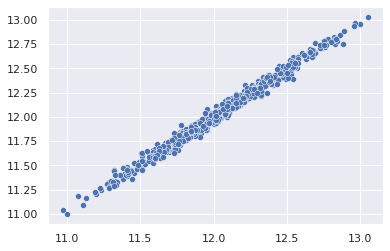

In [69]:
sns.scatterplot(Y_train, predictions)

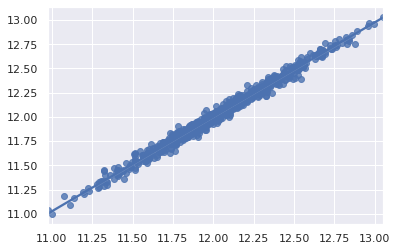

In [70]:
sns.regplot(Y_train, predictions)

In [76]:
#test set
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,**grid_GradientBoostingRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, np.exp(predictions)))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, np.exp(predictions)))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, np.exp(predictions))))
print("----------------------------------")
print("R-square",r2_score(Y_validation, predictions))
print("----------------------------------")

----------------------------------
mean absolute error 178068.3000259526
----------------------------------
mean square error 35306057976.06603
----------------------------------
mean root_mean_squared_error 187899.06326553636
----------------------------------
R-square 0.930095748931242
----------------------------------


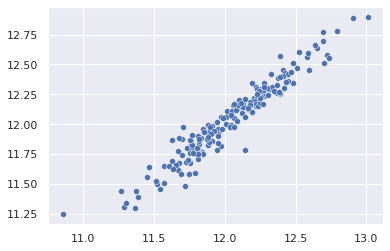

In [77]:
sns.scatterplot(Y_validation, predictions)

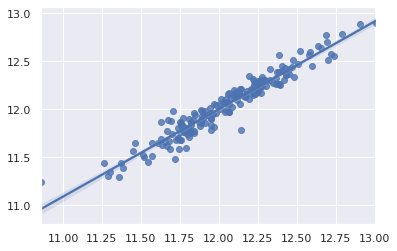

In [78]:
sns.regplot(Y_validation, predictions)

In [79]:
train_data=train.copy()
test_data=test.copy()
train_data.shape,test_data.shape

((918, 46), (1459, 45))

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1459 non-null   int64  
 1   Neighborhood   1459 non-null   int64  
 2   GrLivArea      1459 non-null   int64  
 3   TotalBsmtSF    1459 non-null   float64
 4   GarageArea     1459 non-null   float64
 5   BsmtQual       1459 non-null   int64  
 6   GarageYrBlt    1459 non-null   float64
 7   MSSubClass     1459 non-null   int64  
 8   1stFlrSF       1459 non-null   int64  
 9   GarageFinish   1459 non-null   int64  
 10  YearRemodAdd   1459 non-null   int64  
 11  LotFrontage    1459 non-null   float64
 12  2ndFlrSF       1459 non-null   int64  
 13  GarageType     1459 non-null   int64  
 14  OpenPorchSF    1459 non-null   int64  
 15  TotRmsAbvGrd   1459 non-null   int64  
 16  FireplaceQu    1459 non-null   int64  
 17  BsmtUnfSF      1459 non-null   float64
 18  LotAr

In [100]:
#From overampling/undersampling for unseen dataset
test_validation = test_data.iloc[:,0:45].values #independent columns
#test_validation = test_data.iloc[:,-1].values #target column 

In [101]:
test_validation.shape

(1459, 45)

In [109]:
#predict on test data

model = GradientBoostingRegressor(random_state=seed,**grid_GradientBoostingRegressor.best_params_)
model.fit(X, Y)
test_result=model.predict(test_validation) # predict on test data


In [110]:
#view on test prediction
test_result=np.exp(test_result) # converting log transformation back  
test_result=np.round(test_result,0)
test_submission=pd.DataFrame((test_result),columns={"SalePrice"})
print(test_submission)

      SalePrice
0      134210.0
1      137581.0
2      181491.0
3      178359.0
4      180424.0
...         ...
1454    79619.0
1455    76854.0
1456   129829.0
1457   112215.0
1458   232334.0

[1459 rows x 1 columns]


In [111]:
# export to csv for submission to kaggle.com

test_Id=pd.DataFrame((test_Id))
final_submission=test_Id.join(test_submission)
final_submission.to_csv(('final_submission.csv'),index=False) # export to csv (test_submission)
final_submission 

,Id,SalePrice
0,1461,134210.0
1,1462,137581.0
2,1463,181491.0
3,1464,178359.0
4,1465,180424.0
...,...,...
1454,2915,79619.0
1455,2916,76854.0
1456,2917,129829.0
1457,2918,112215.0


In [112]:
SalePrice=final_submission[["SalePrice"]]
SalePrice.head()

,SalePrice
0,134210.0
1,137581.0
2,181491.0
3,178359.0
4,180424.0
